>>>>>>>>>>> amir mohammad ostadkar #95

In [30]:
#data analise

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC

In [32]:
data=pd.read_csv('train.csv')

In [33]:
df = pd.DataFrame(data)

In [34]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [36]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [37]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [38]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print(f"Feature '{column_name}' has '{unique_values}' unique values")

Feature 'battery_power' has '1094' unique values
Feature 'blue' has '2' unique values
Feature 'clock_speed' has '26' unique values
Feature 'dual_sim' has '2' unique values
Feature 'fc' has '20' unique values
Feature 'four_g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'm_dep' has '10' unique values
Feature 'mobile_wt' has '121' unique values
Feature 'n_cores' has '8' unique values
Feature 'pc' has '21' unique values
Feature 'px_height' has '1137' unique values
Feature 'px_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'sc_h' has '15' unique values
Feature 'sc_w' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature 'three_g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


In [39]:
for i in df.columns:     
    n = len(pd.unique(df[i]))
    print(i)
    print(n)
    print(df[i].unique())
    print('----------------')

battery_power
1094
[ 842 1021  563 ... 1139 1467  858]
----------------
blue
2
[0 1]
----------------
clock_speed
26
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
----------------
dual_sim
2
[0 1]
----------------
fc
20
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
----------------
four_g
2
[0 1]
----------------
int_memory
63
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
----------------
m_dep
10
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
----------------
mobile_wt
121
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 1

In [40]:
cat_features = []
num_features = []

for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values < 5:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

print("Numerical features: ", num_features)
print("Categorical features: ", cat_features)

Numerical features:  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Categorical features:  ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [41]:
print(cat_features)

print('--------------------------------------------------')
print(num_features)


['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
--------------------------------------------------
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


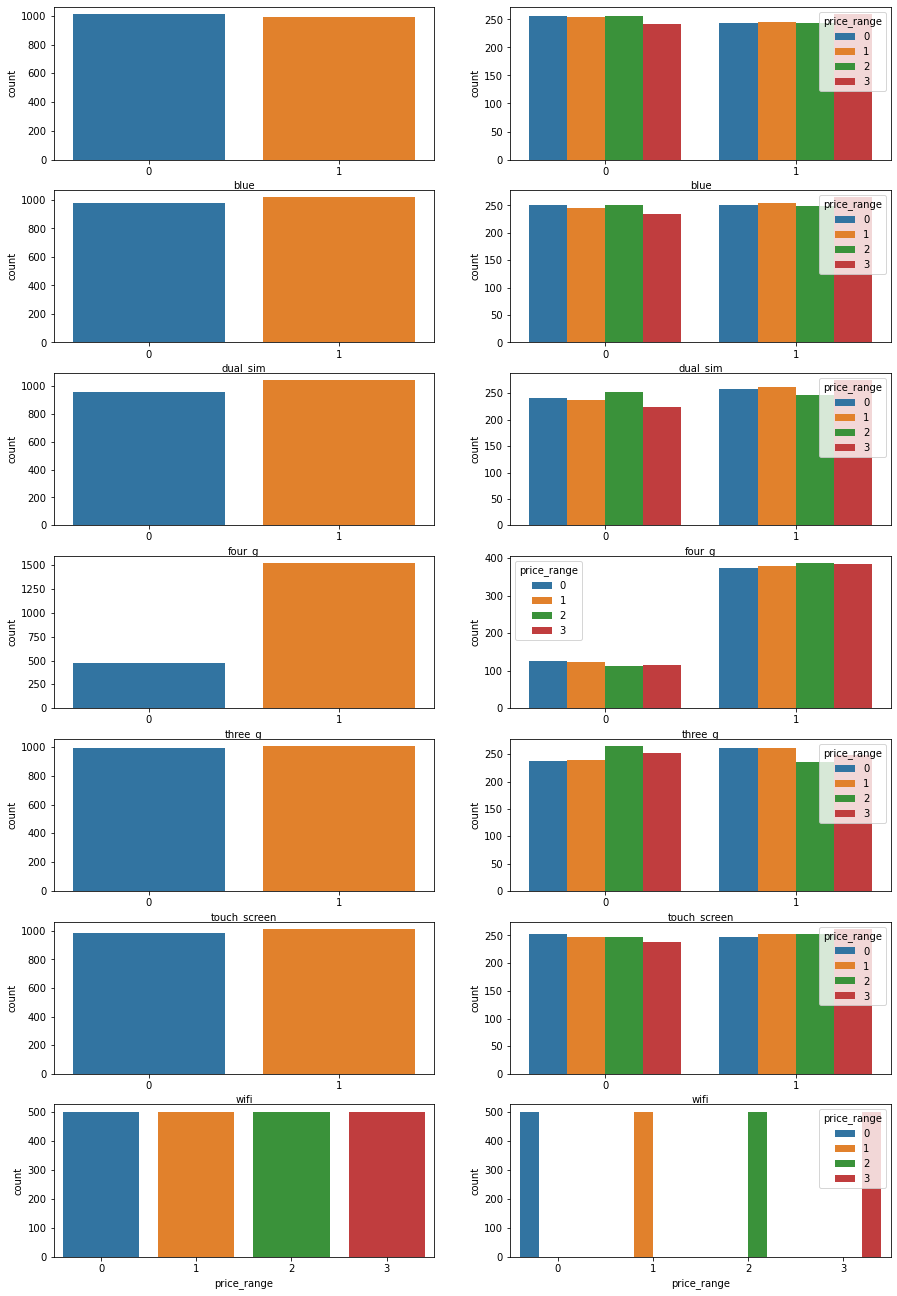

In [42]:
plt.figure(figsize = (15,60))
for idx, feature in enumerate(cat_features):
    plt.subplot(18, 2, idx*2+1)
    sns.countplot(x = feature , data = df)
    plt.subplot(18, 2, idx*2+2)
    sns.countplot(x = feature , data = df,hue='price_range')

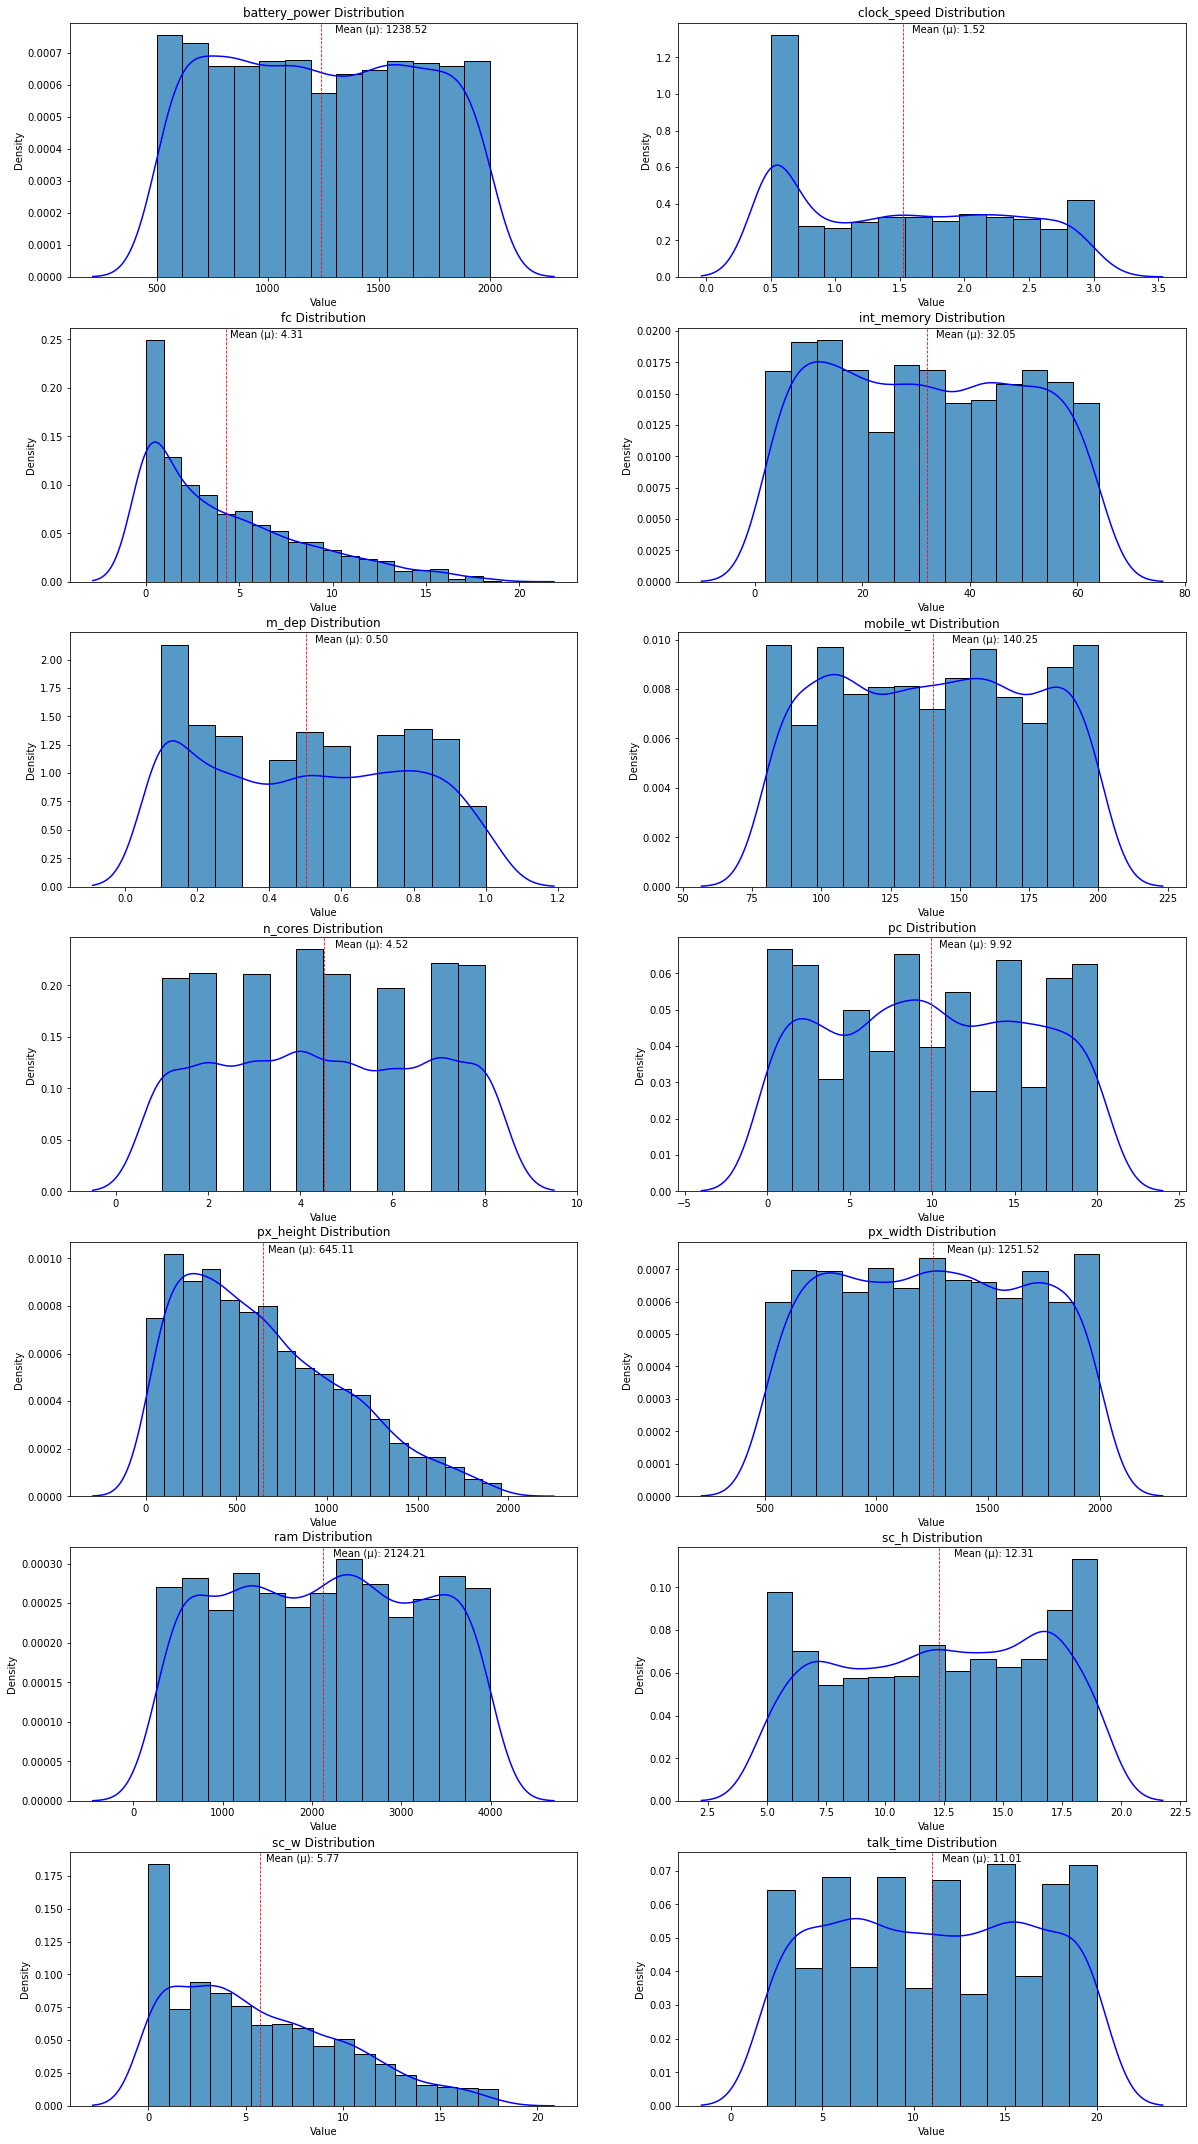

In [43]:
plt.figure(figsize=(20, 100))
for idx, column_name in enumerate(num_features):
  plt.subplot(18, 2, idx+1)
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density')
  sns.kdeplot(df[column_name], color='blue')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Value")
  plt.ylabel("Density")
plt.show()

In [44]:
df.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

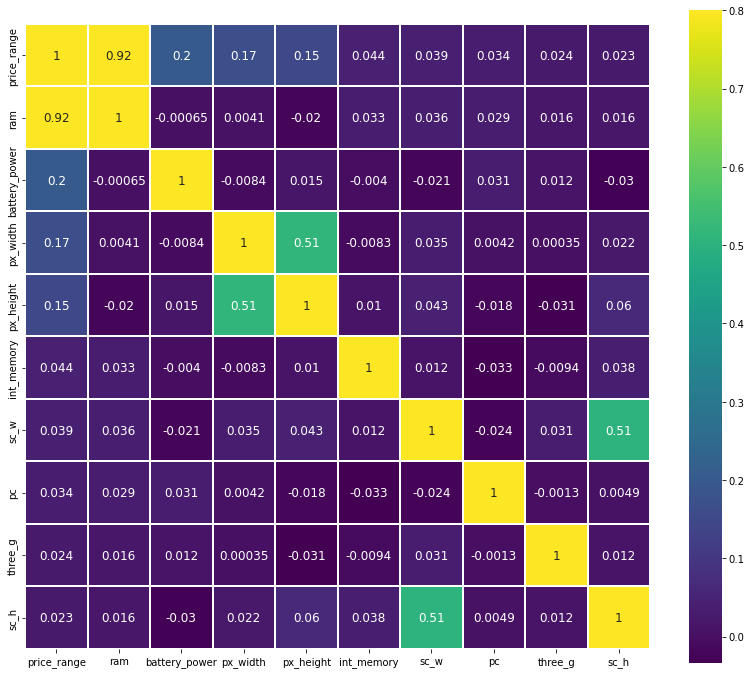

In [45]:
# top 10 largest correlation between features 
cols = df.corr().nlargest(10, 'price_range')['price_range'].index
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

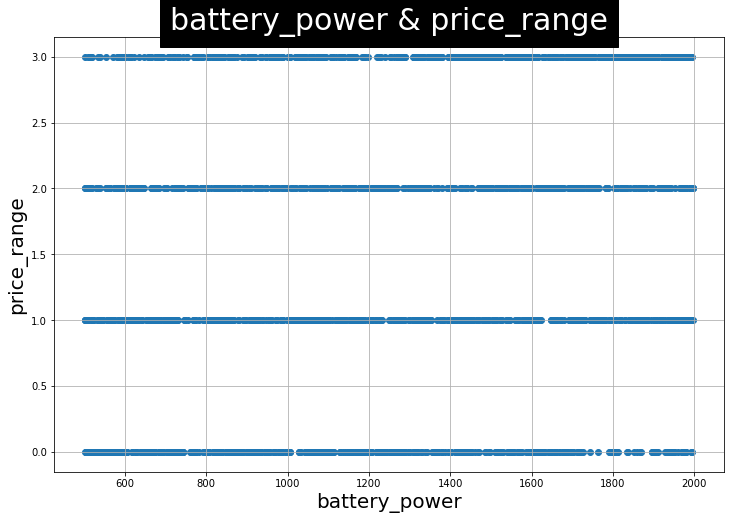

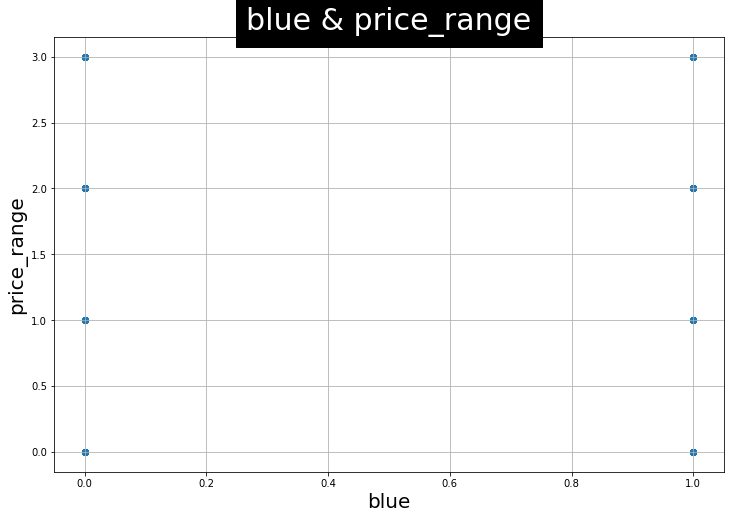

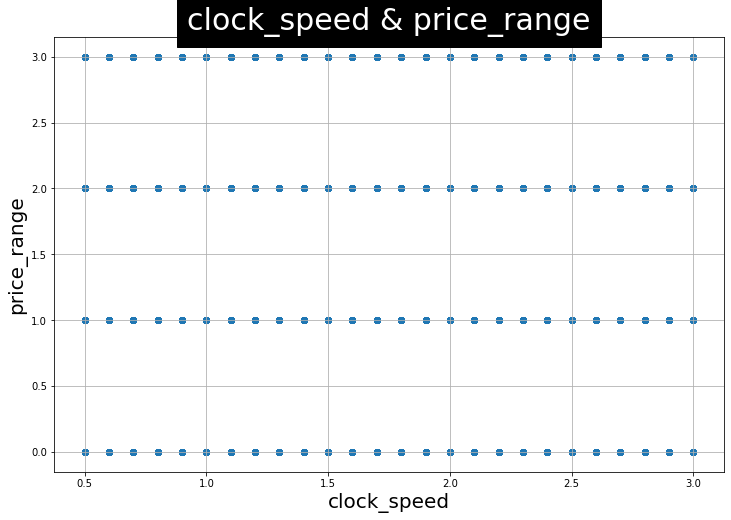

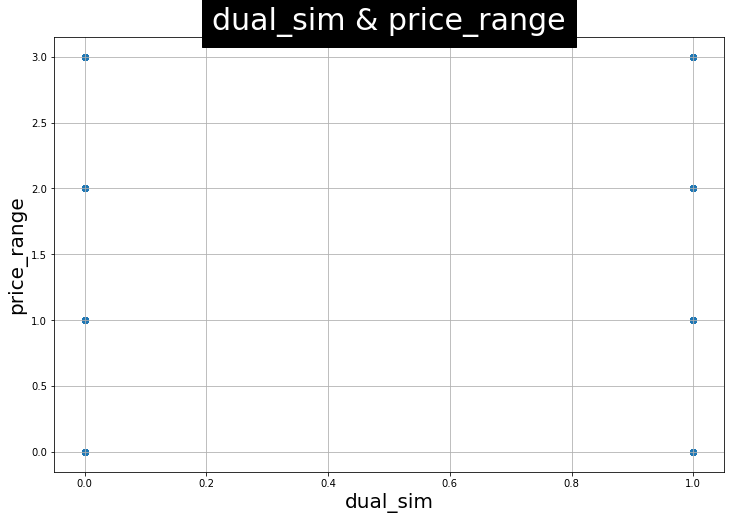

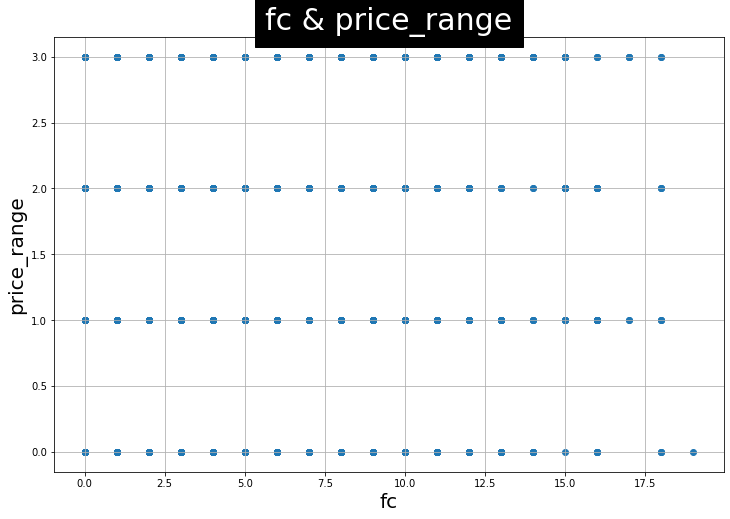

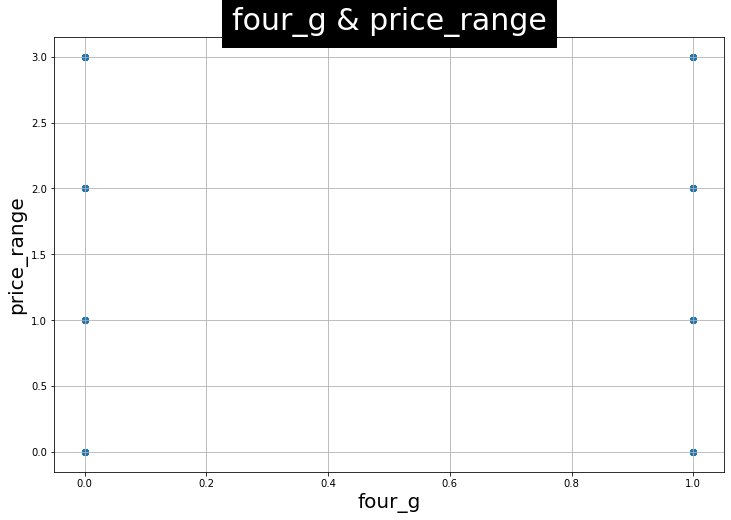

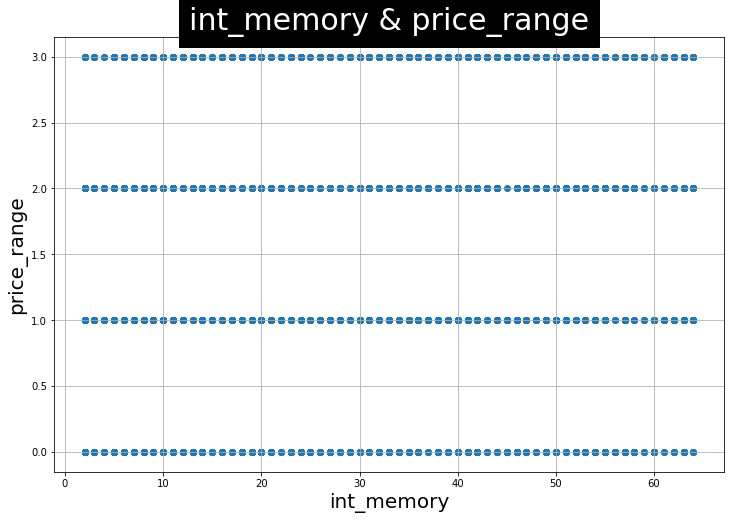

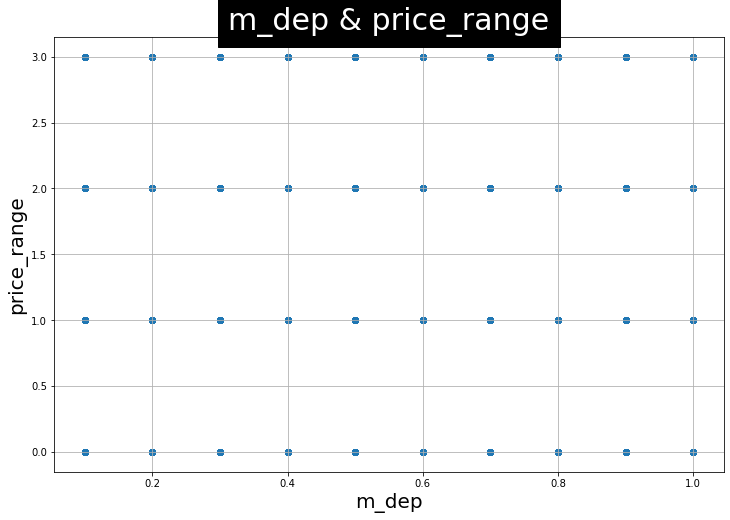

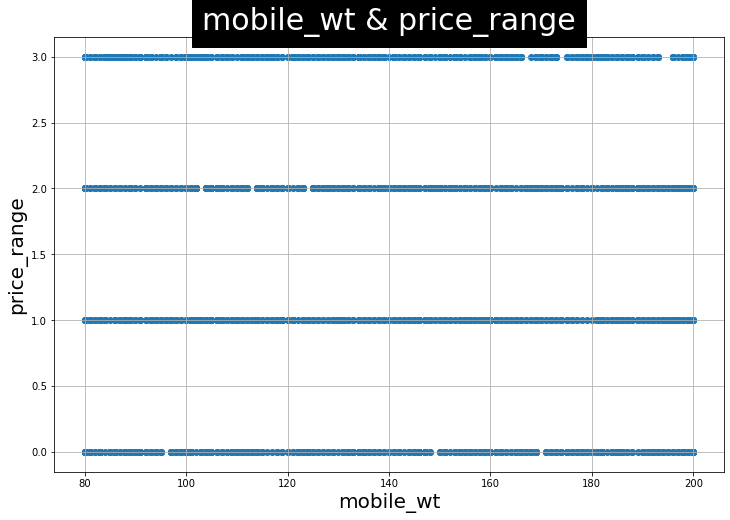

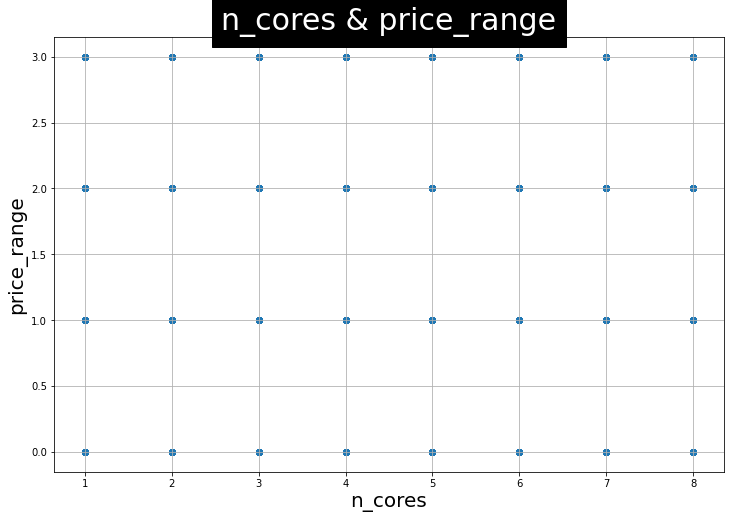

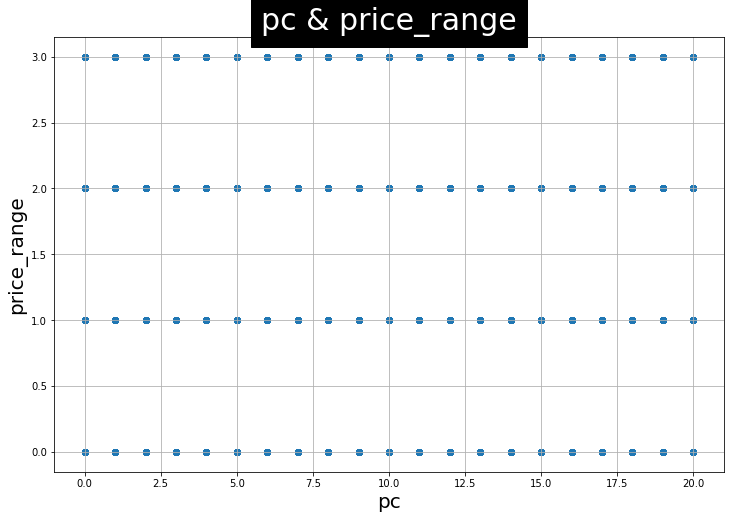

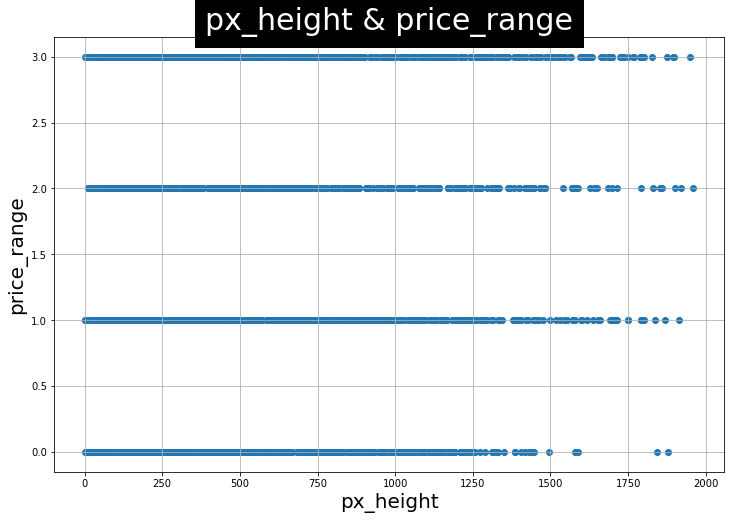

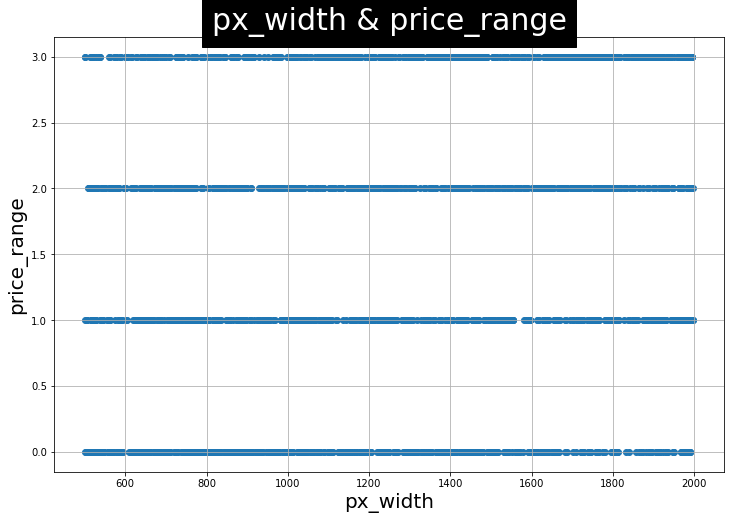

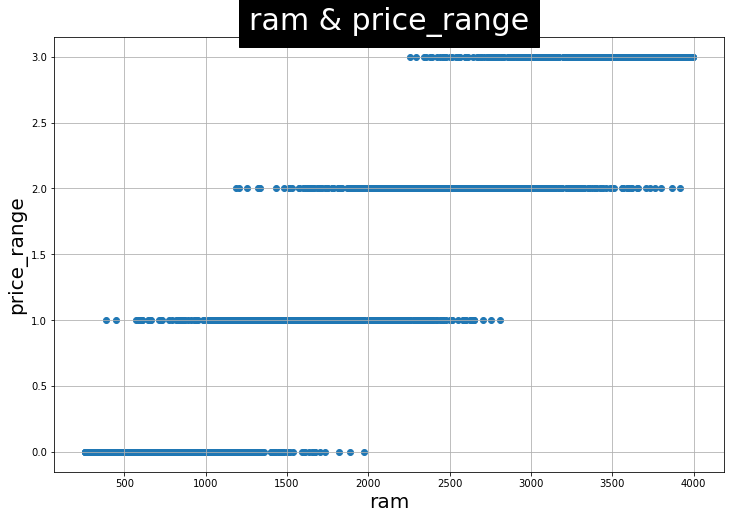

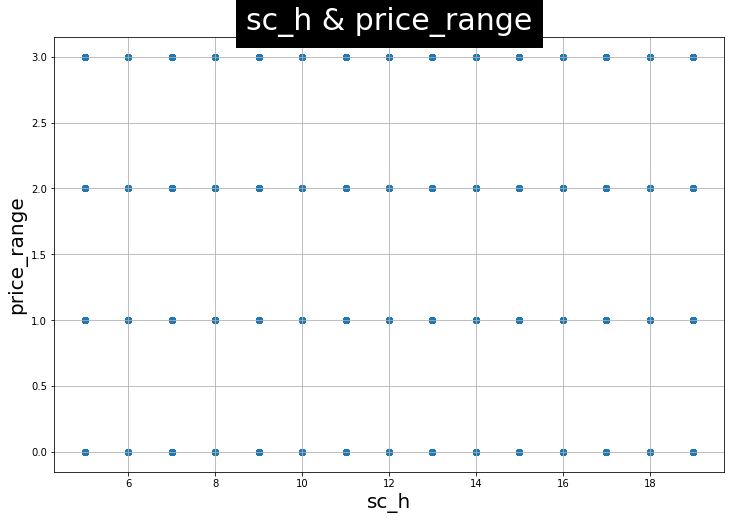

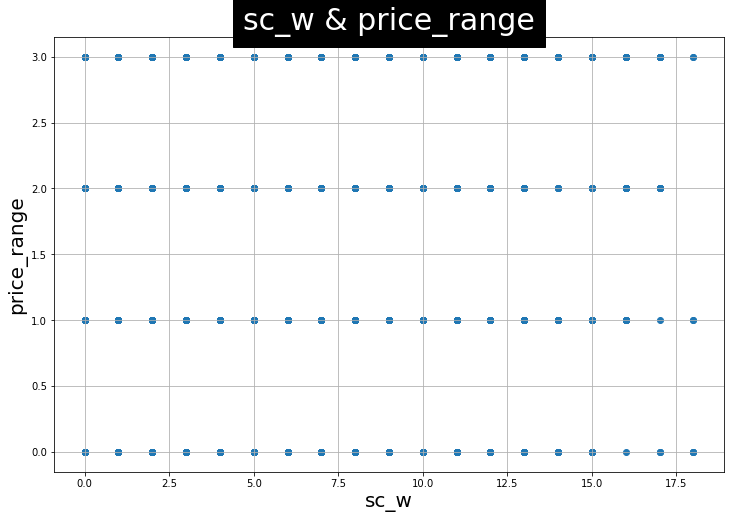

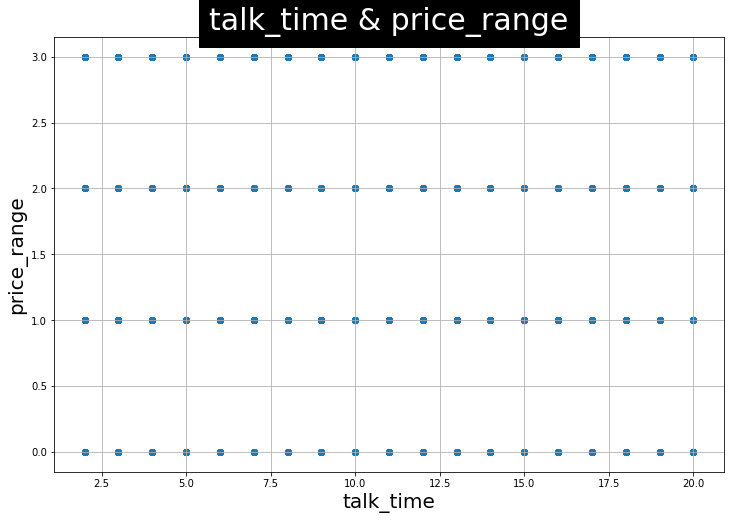

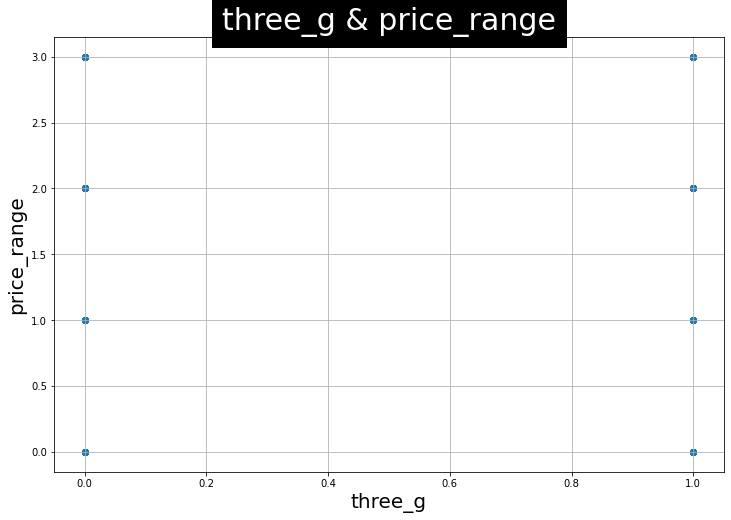

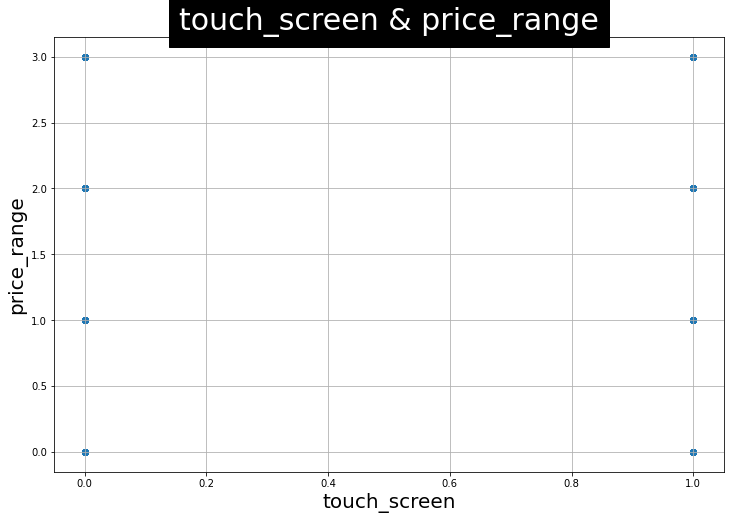

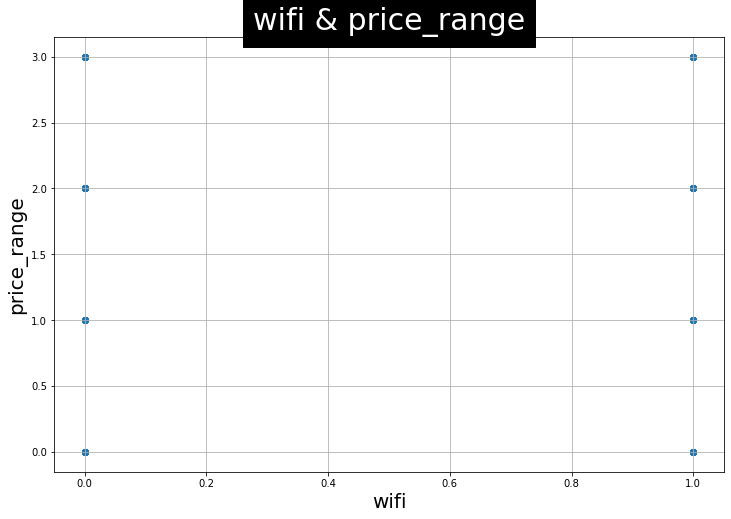

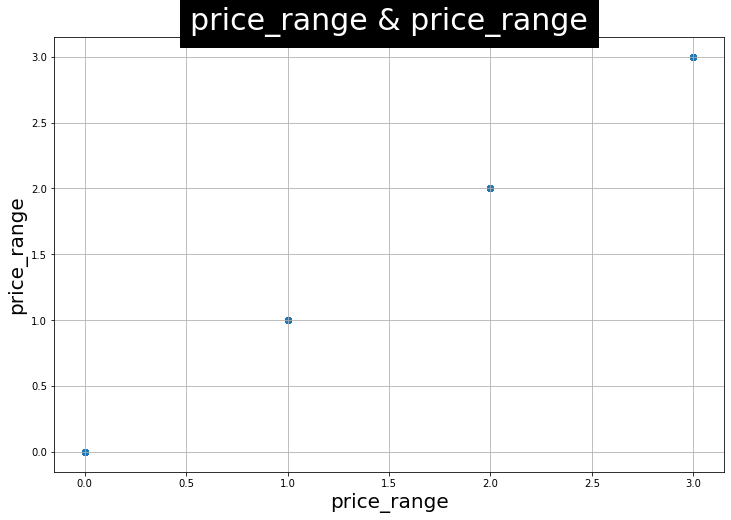

In [46]:
for i in df.columns:
    plt.figure(figsize=(12,8))
    plt.scatter(df[i],df['price_range'])
    plt.title(i+" & price_range",backgroundcolor='black',color='white',fontsize=30)
    plt.xlabel(i,fontsize=20)
    plt.ylabel("price_range",fontsize=20)
    #plt.savefig(i+ ' & Personal Loan.jpg' )
    plt.grid()
    plt.show()

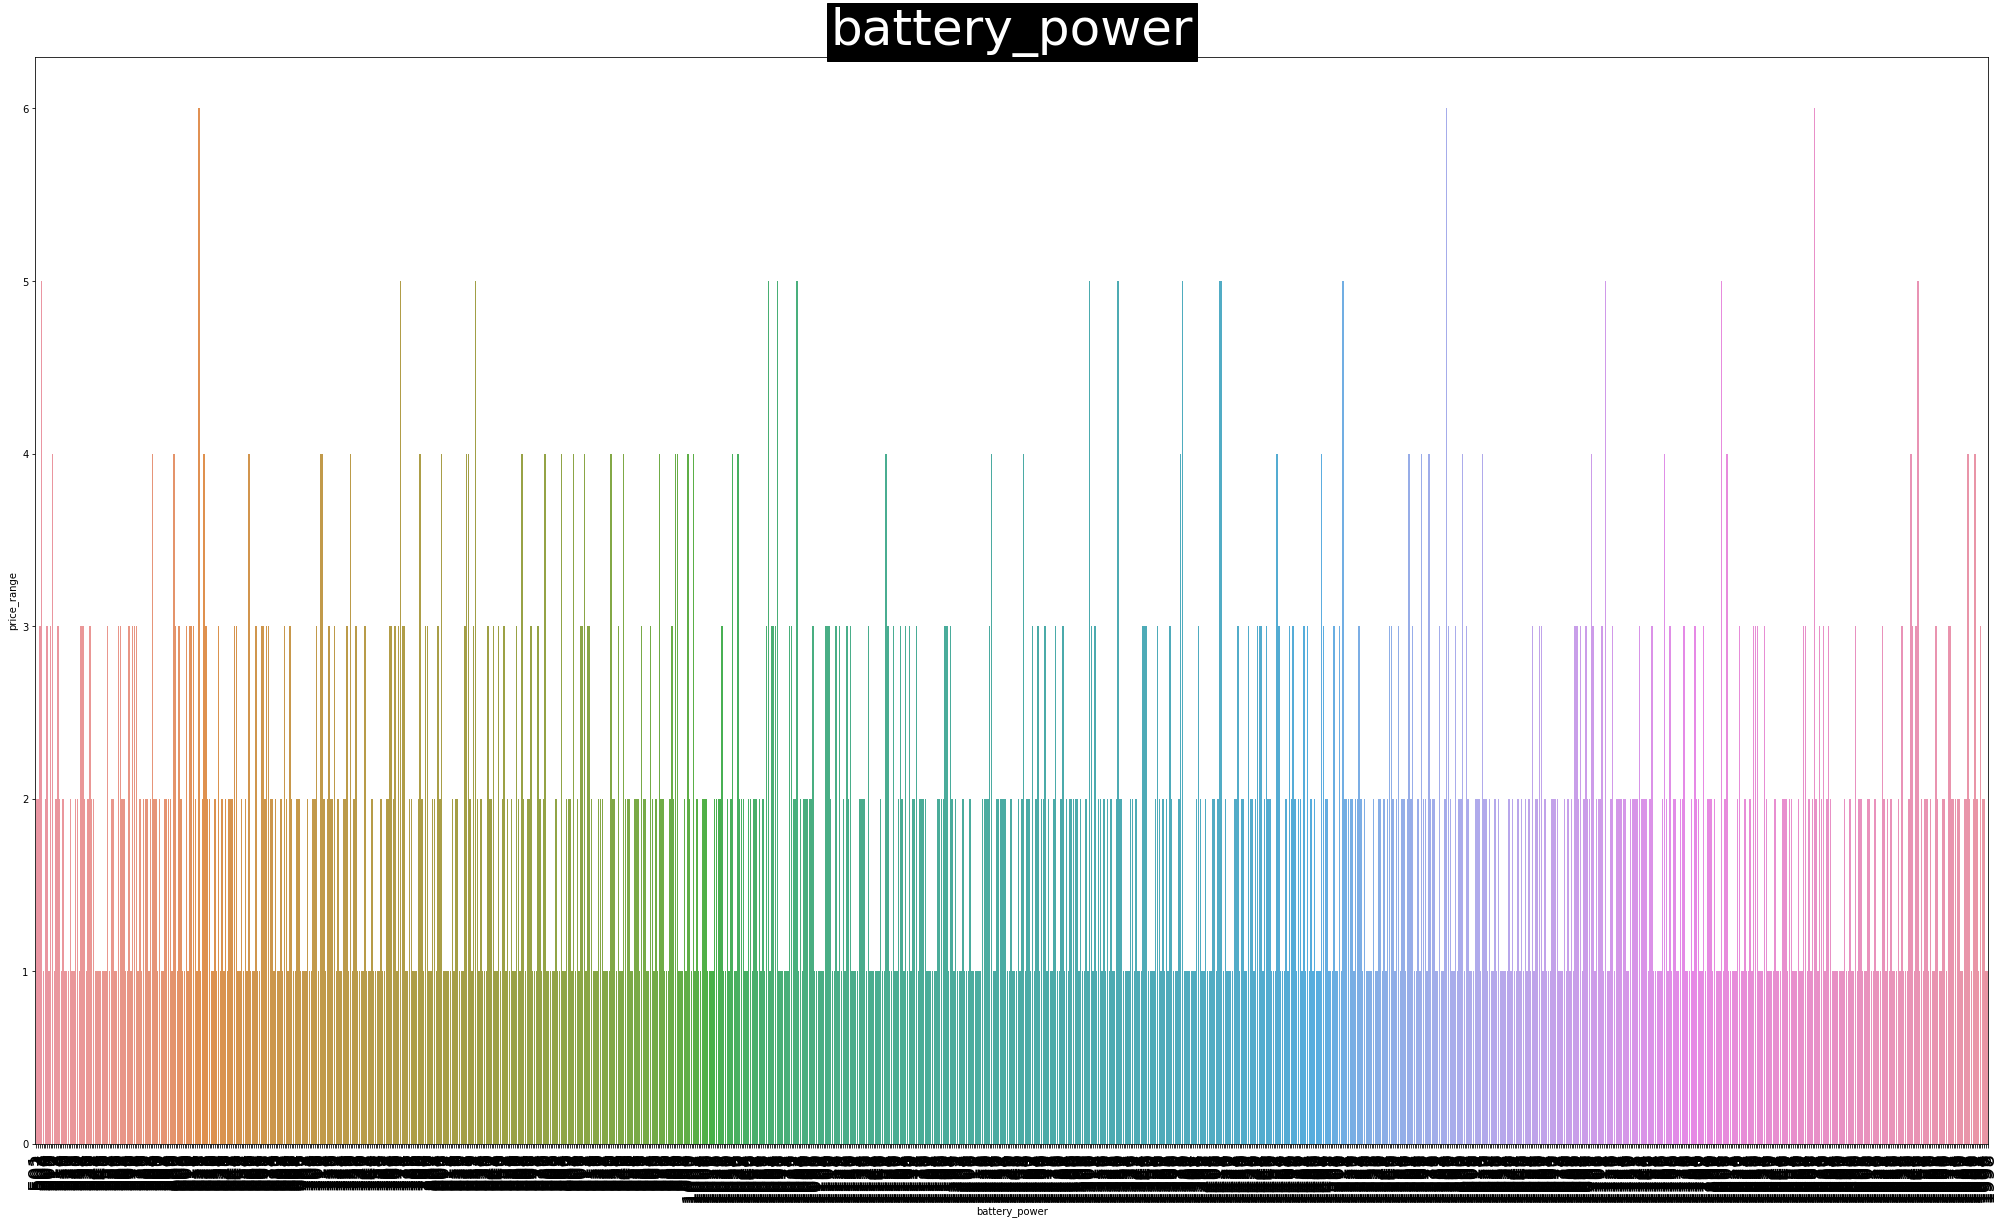

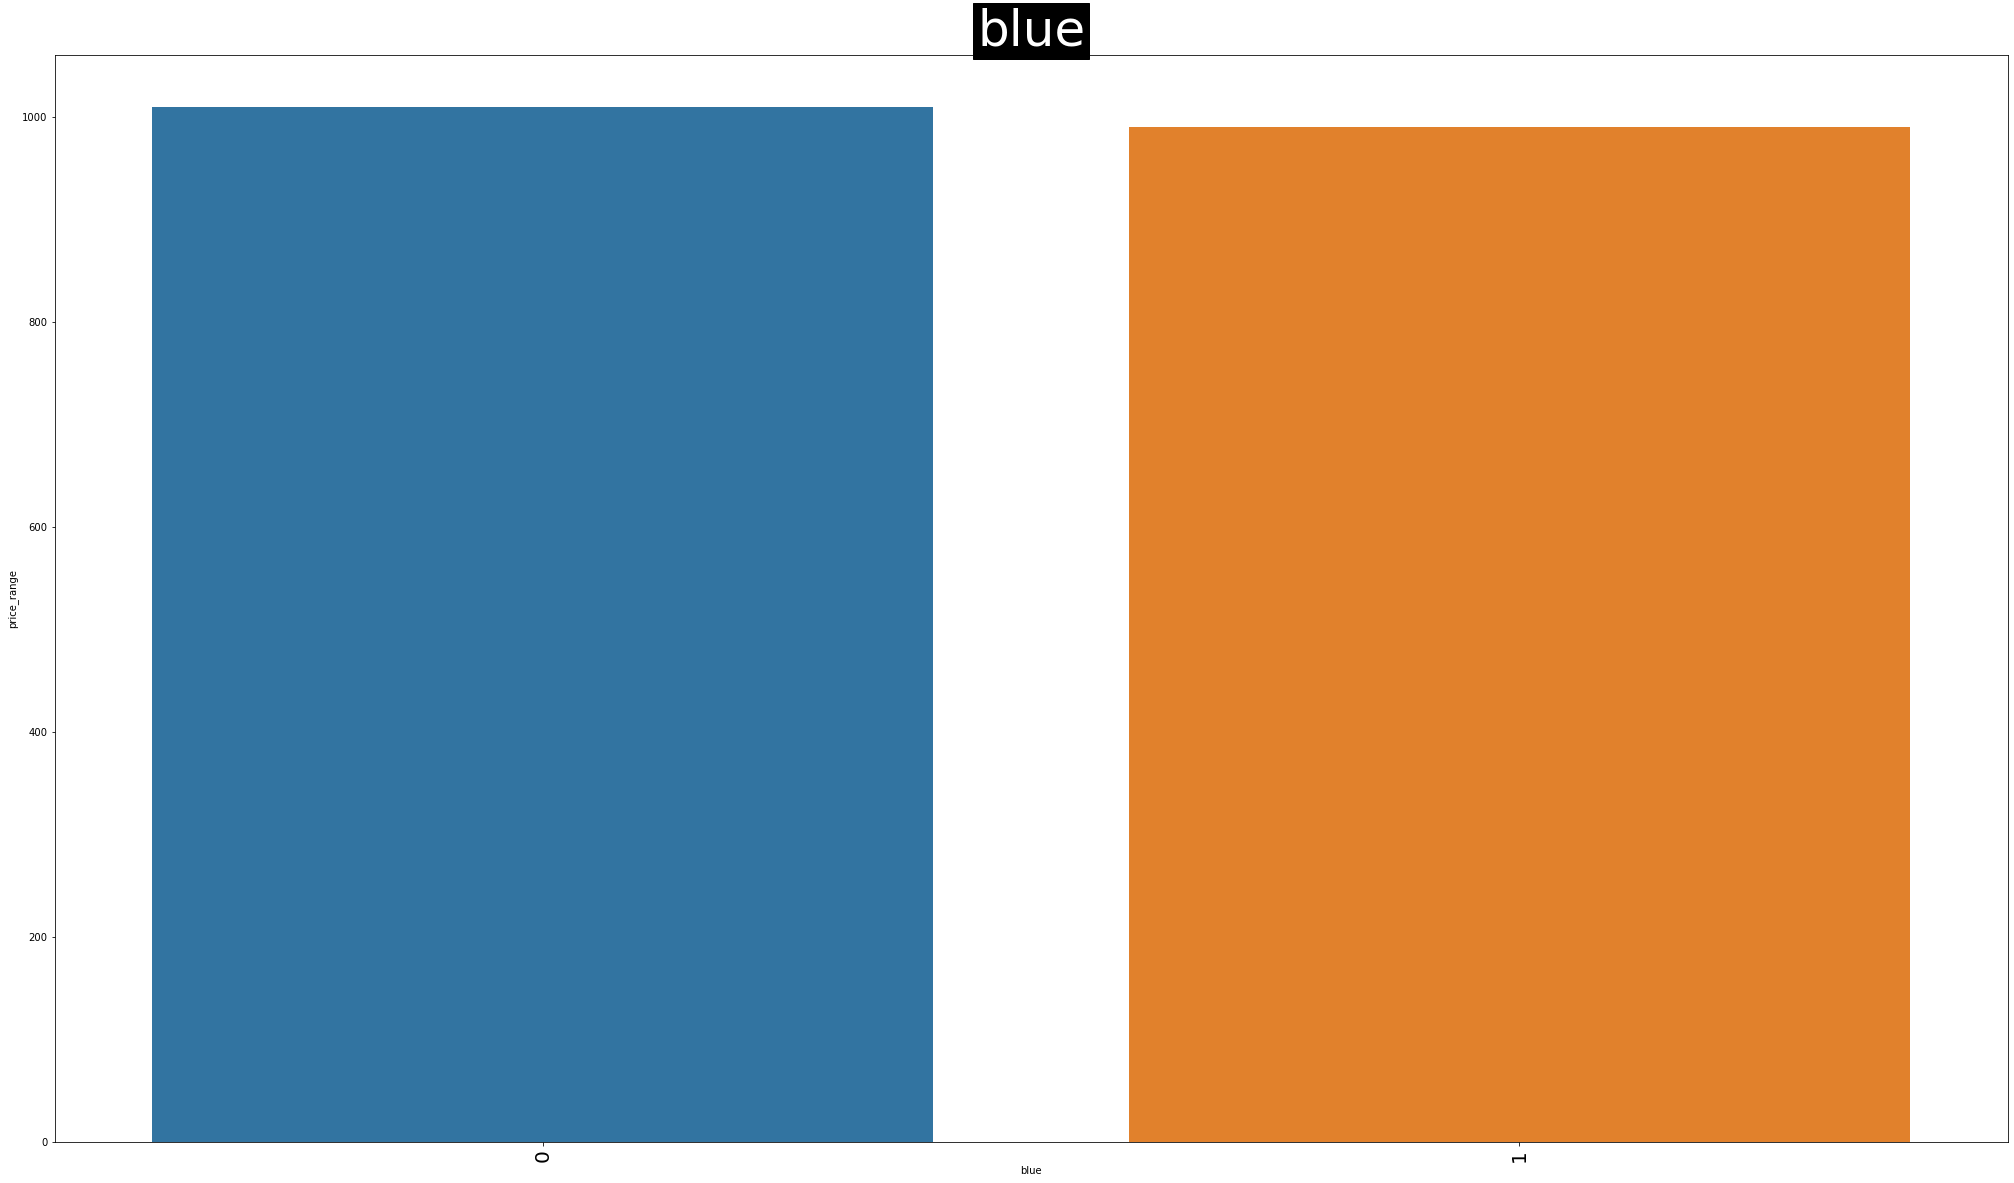

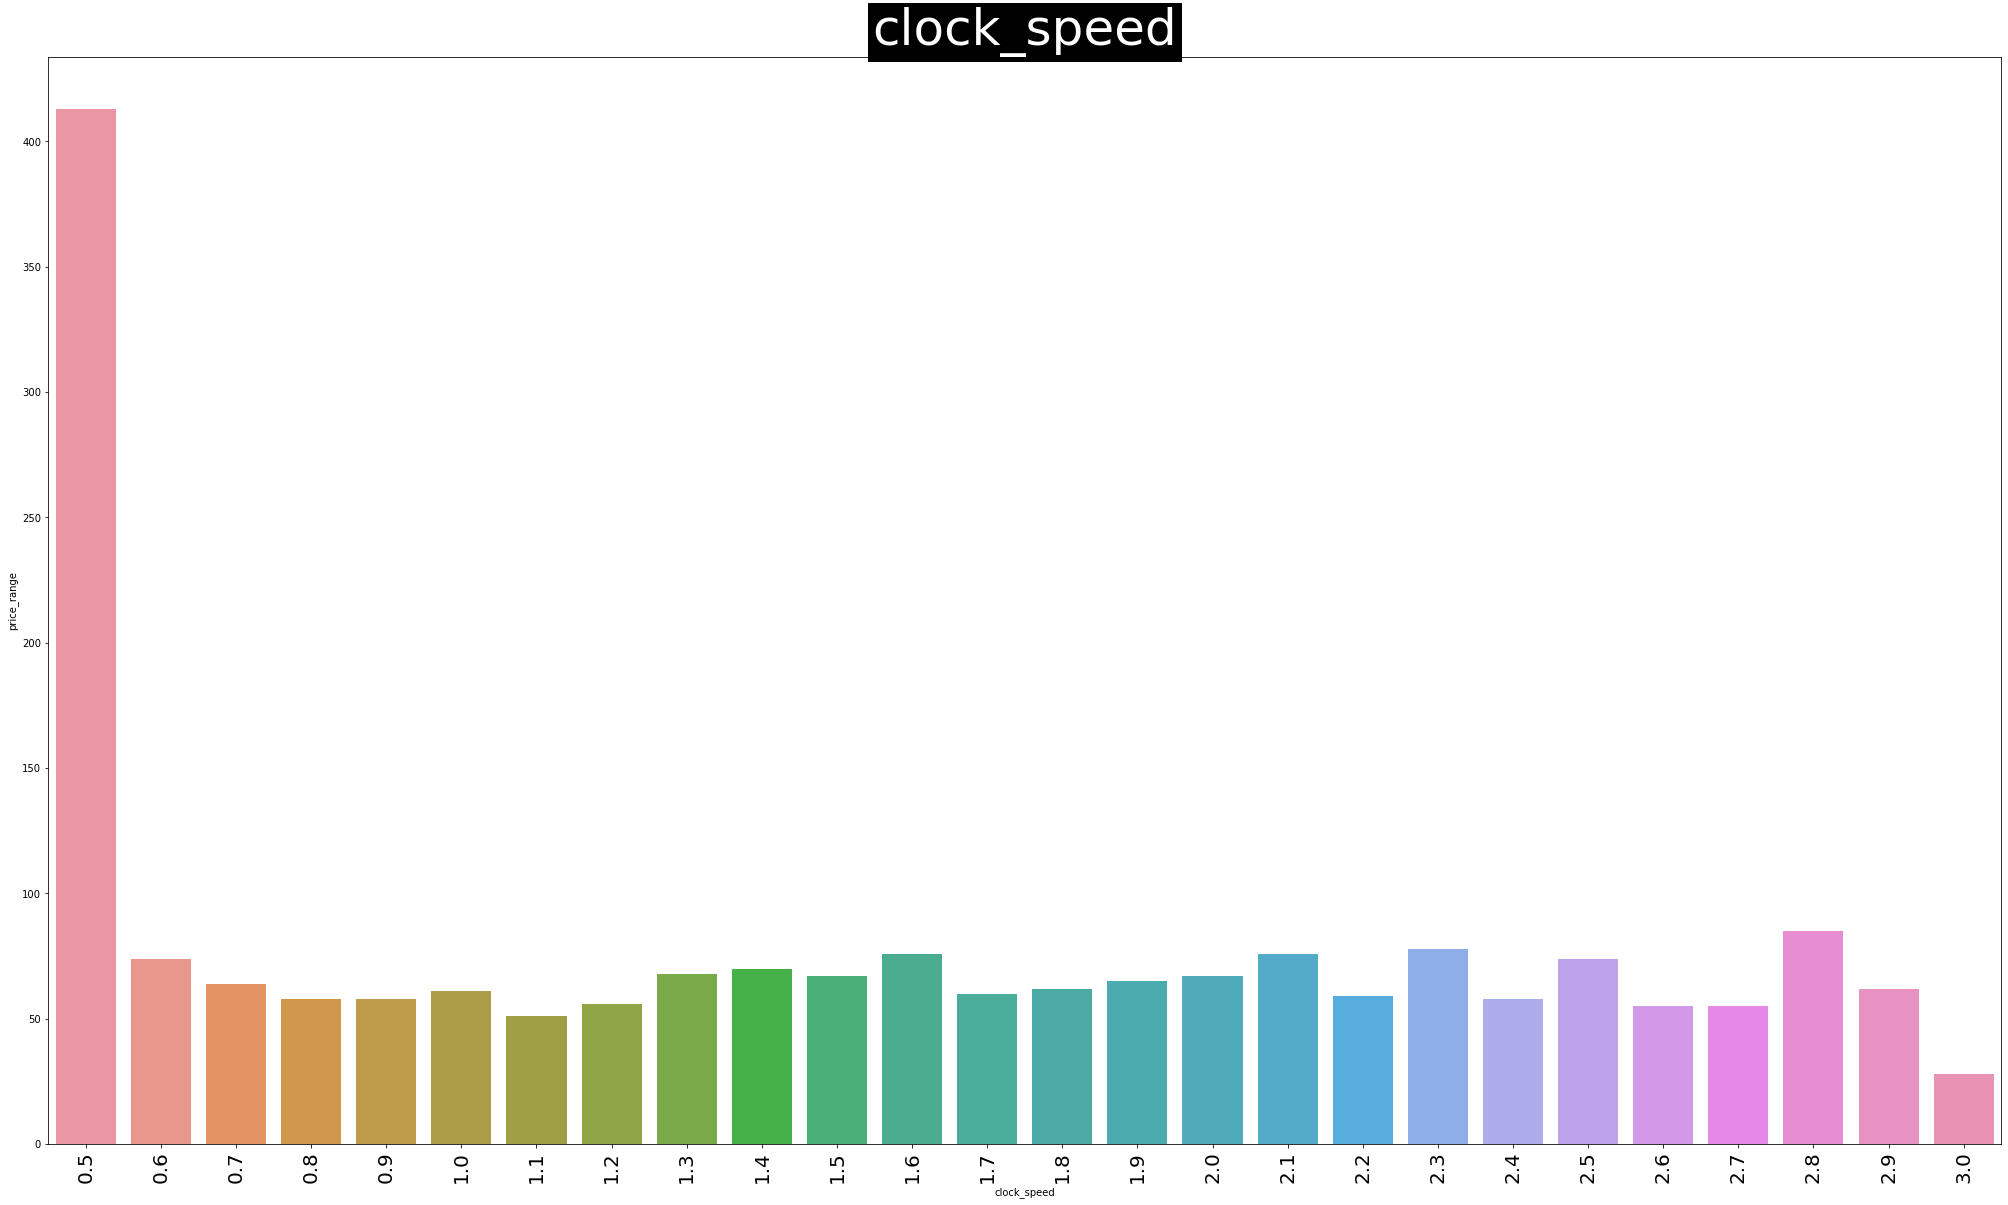

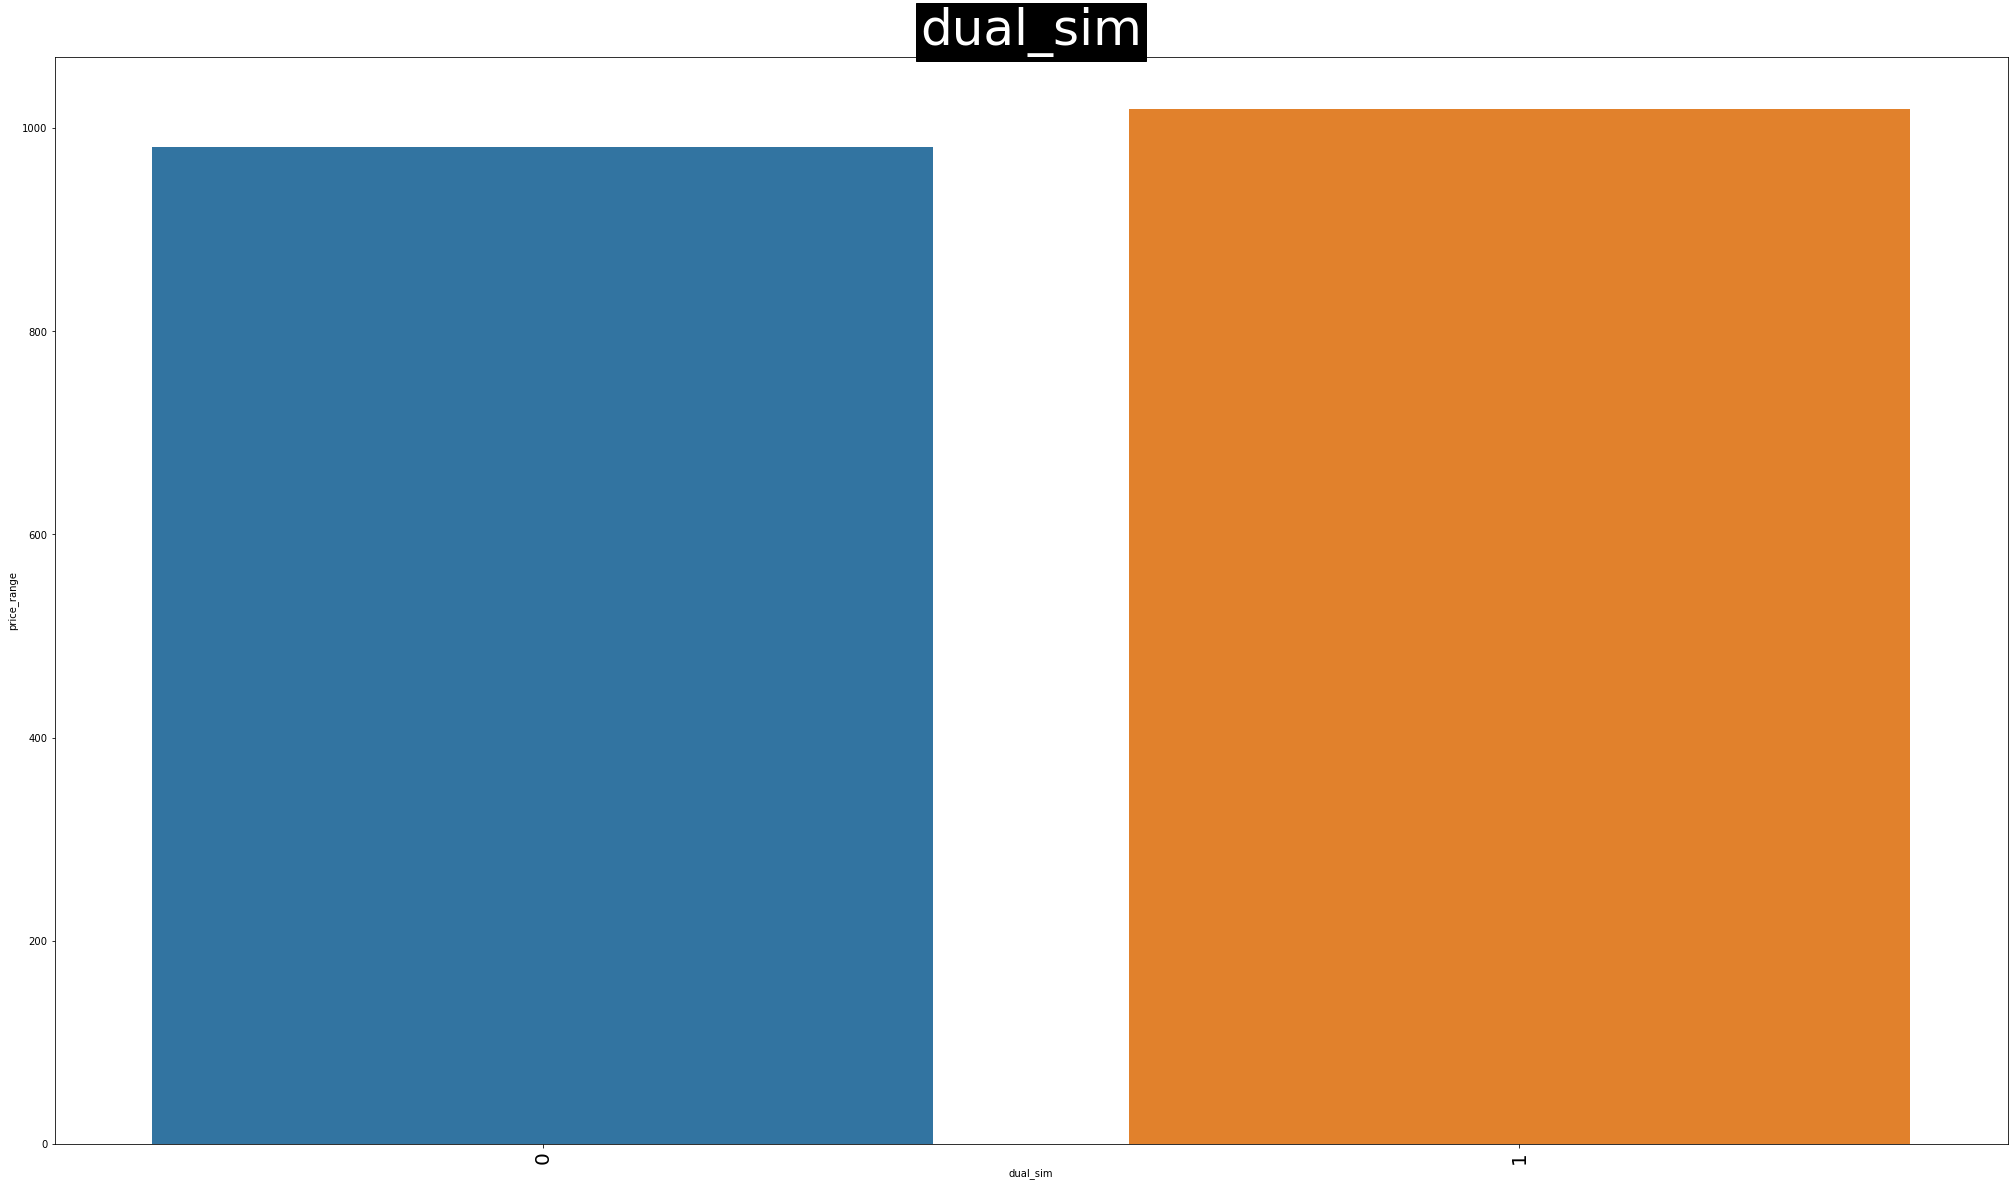

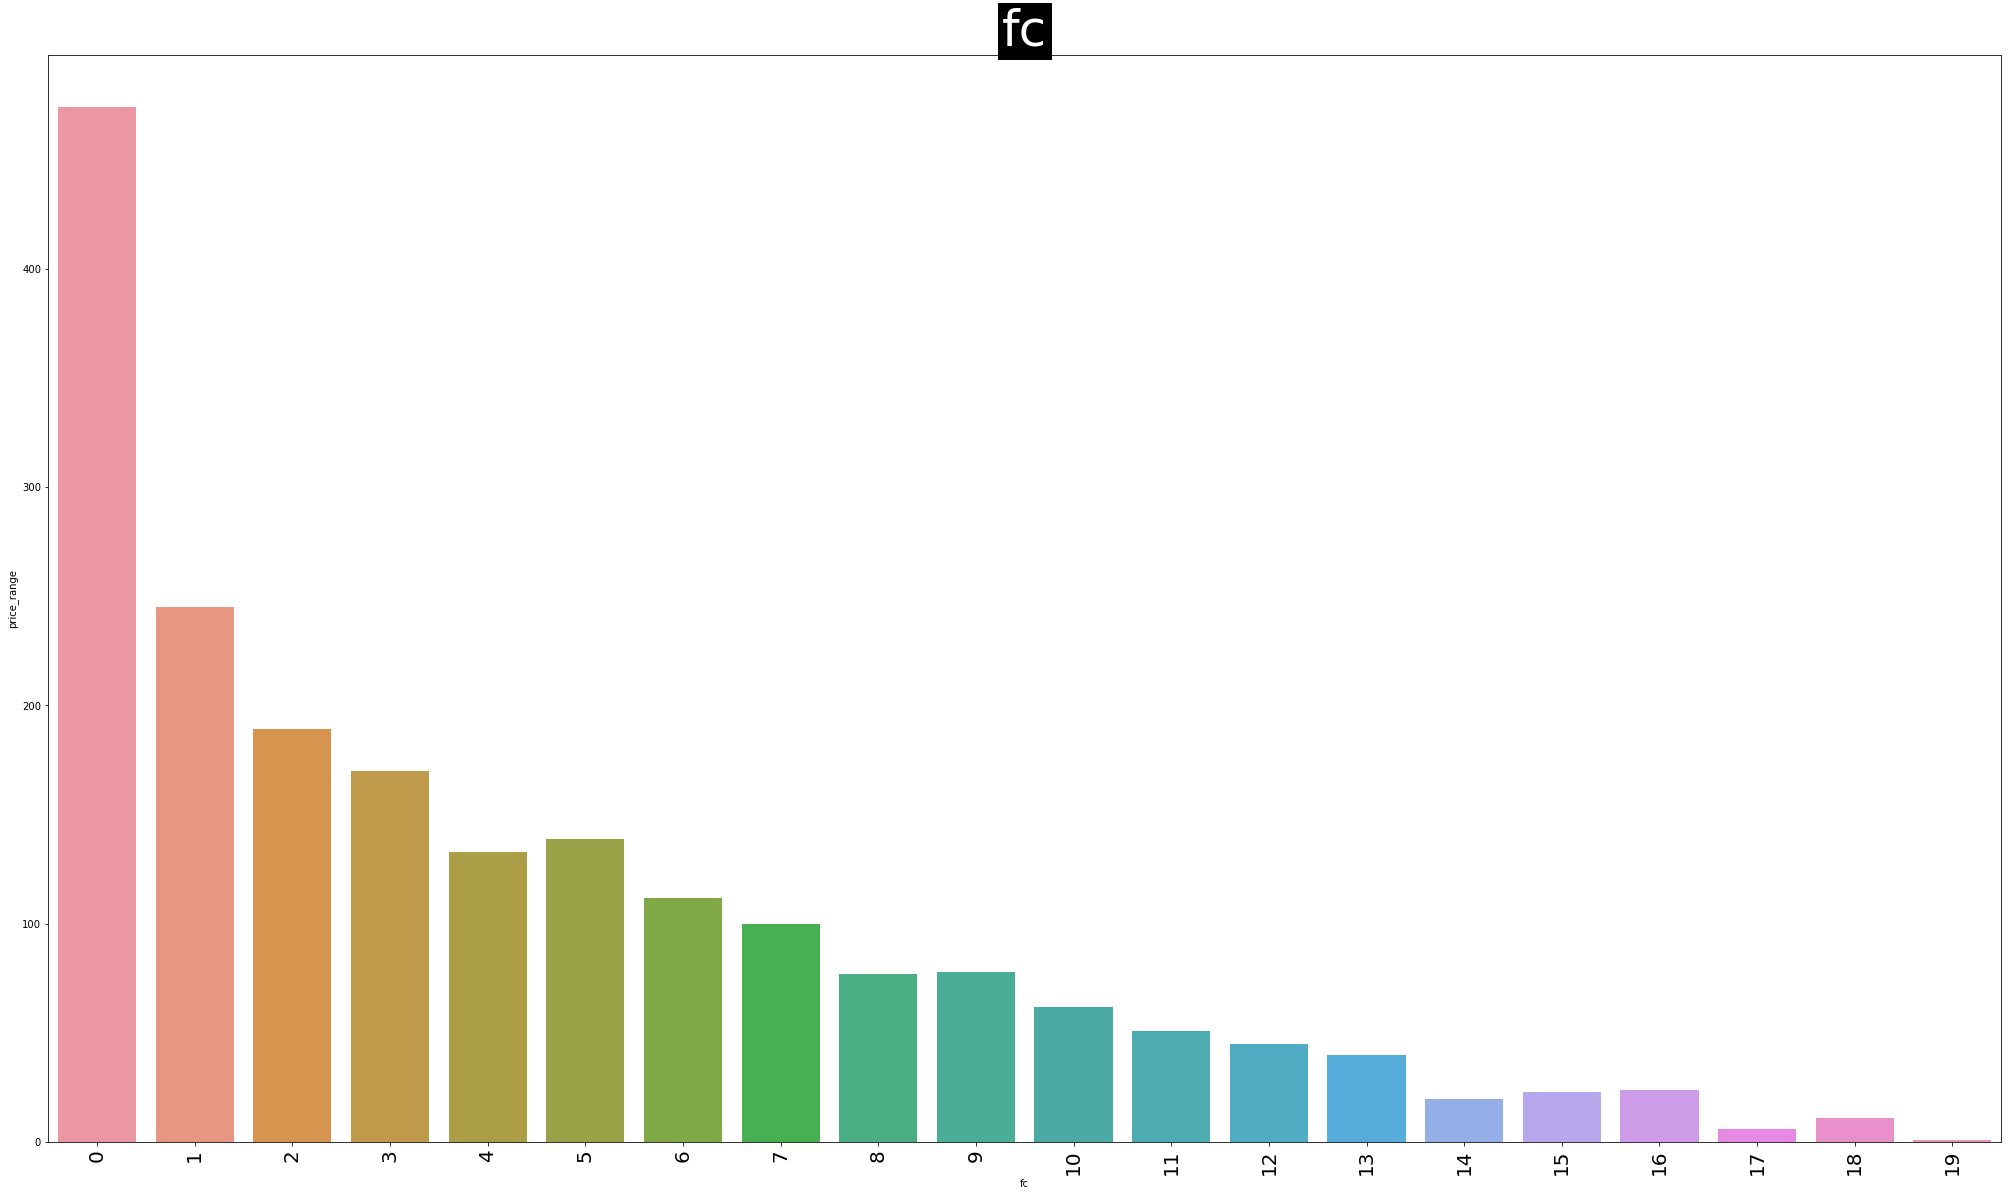

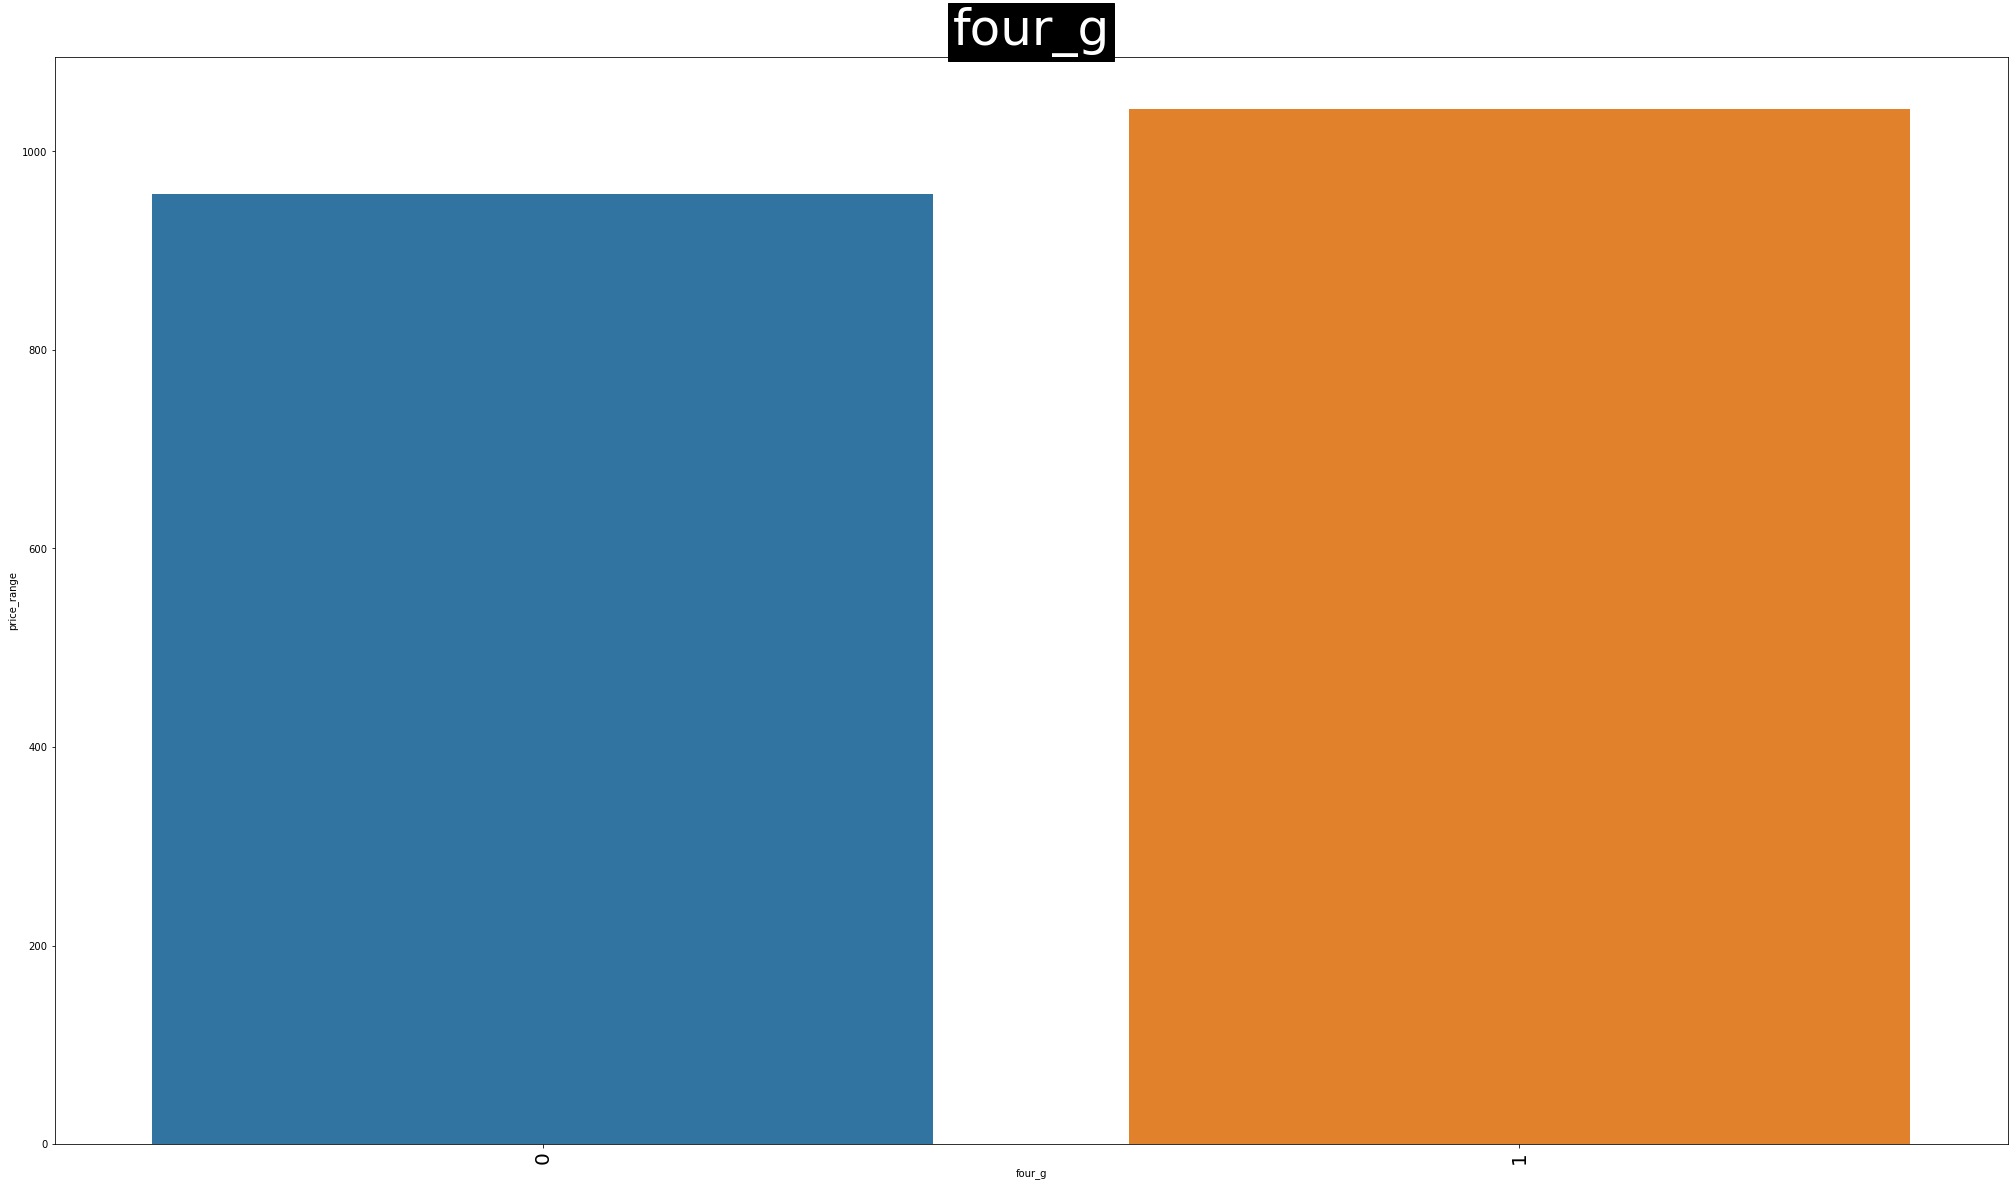

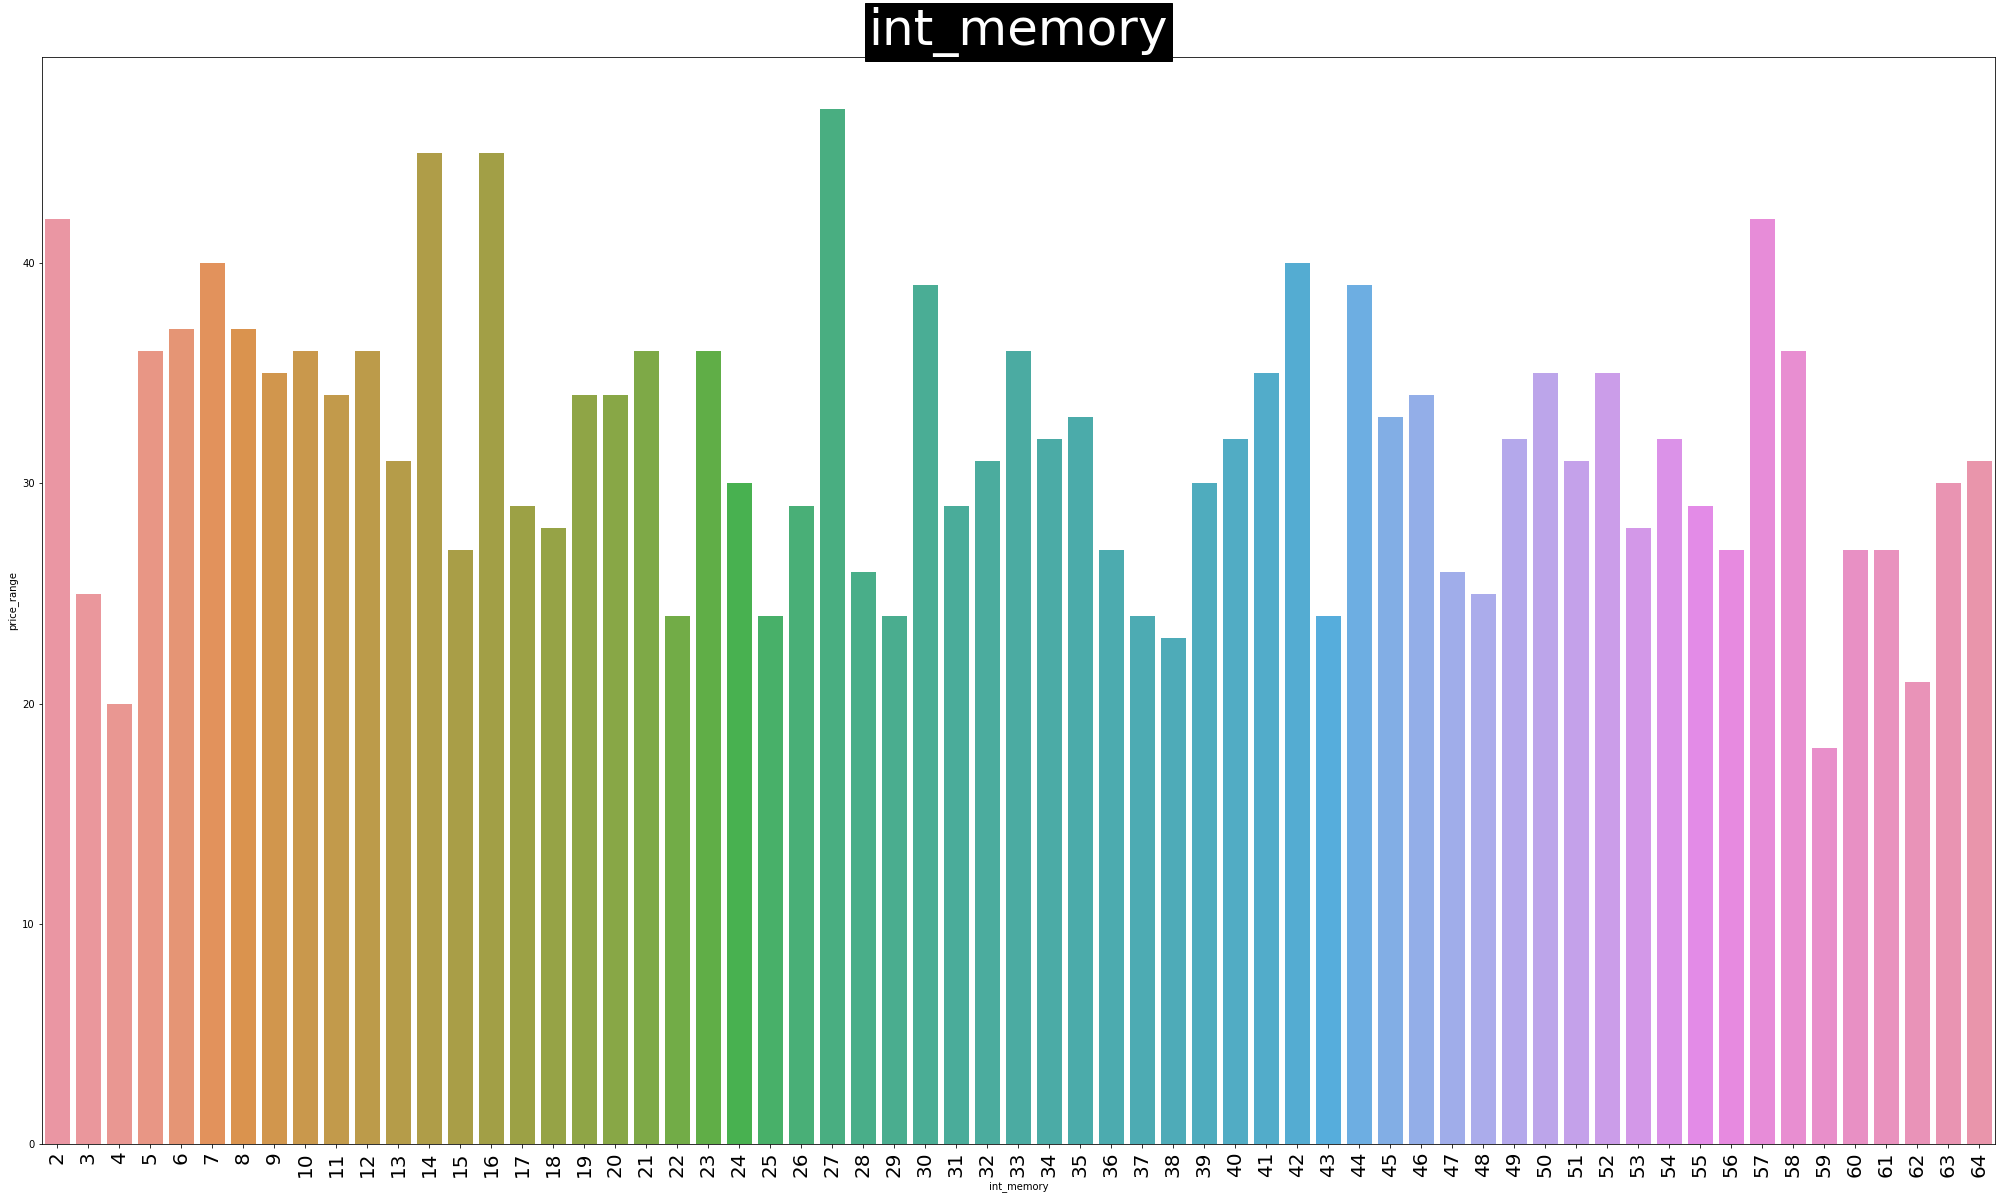

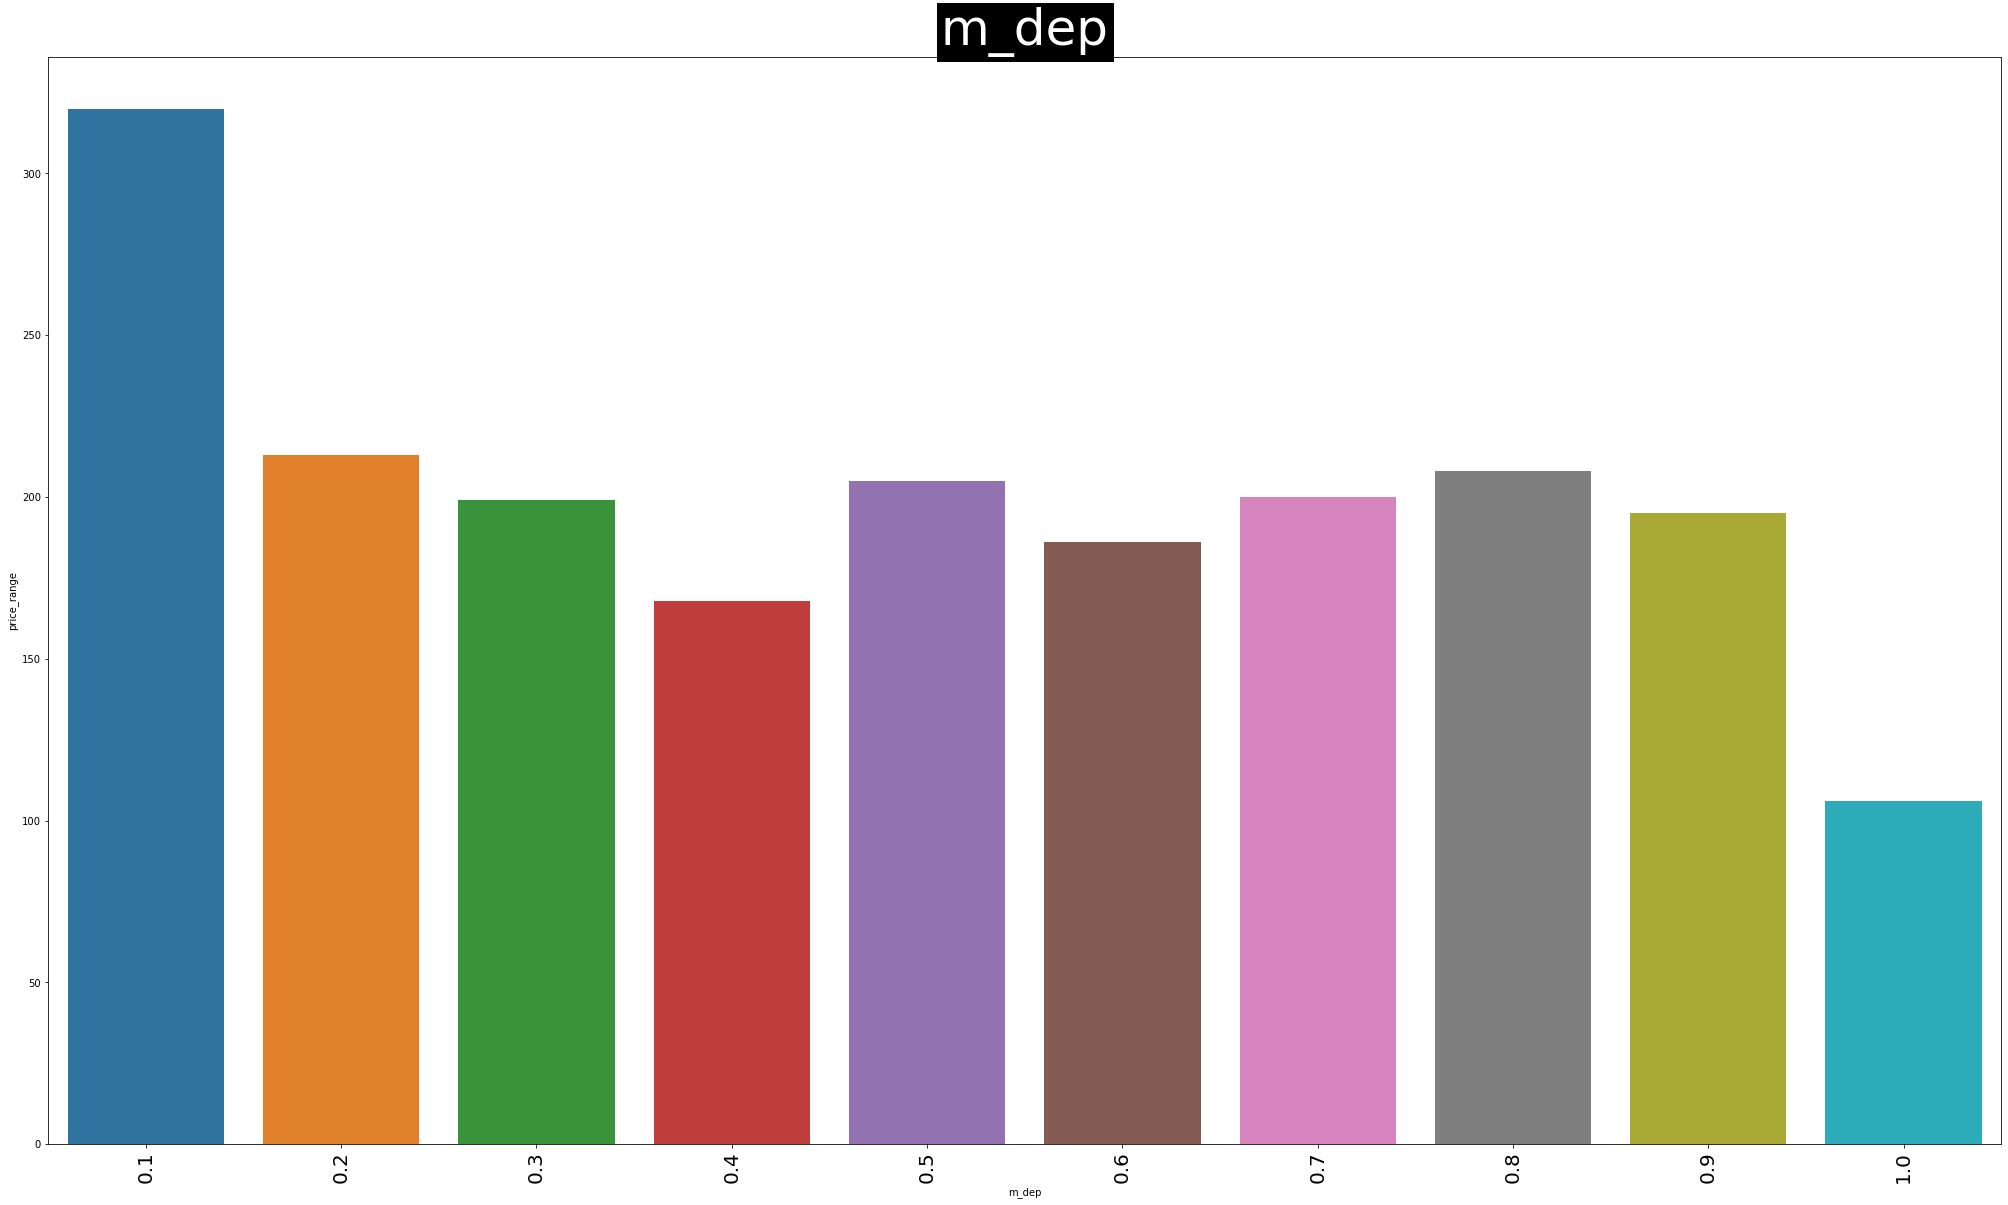

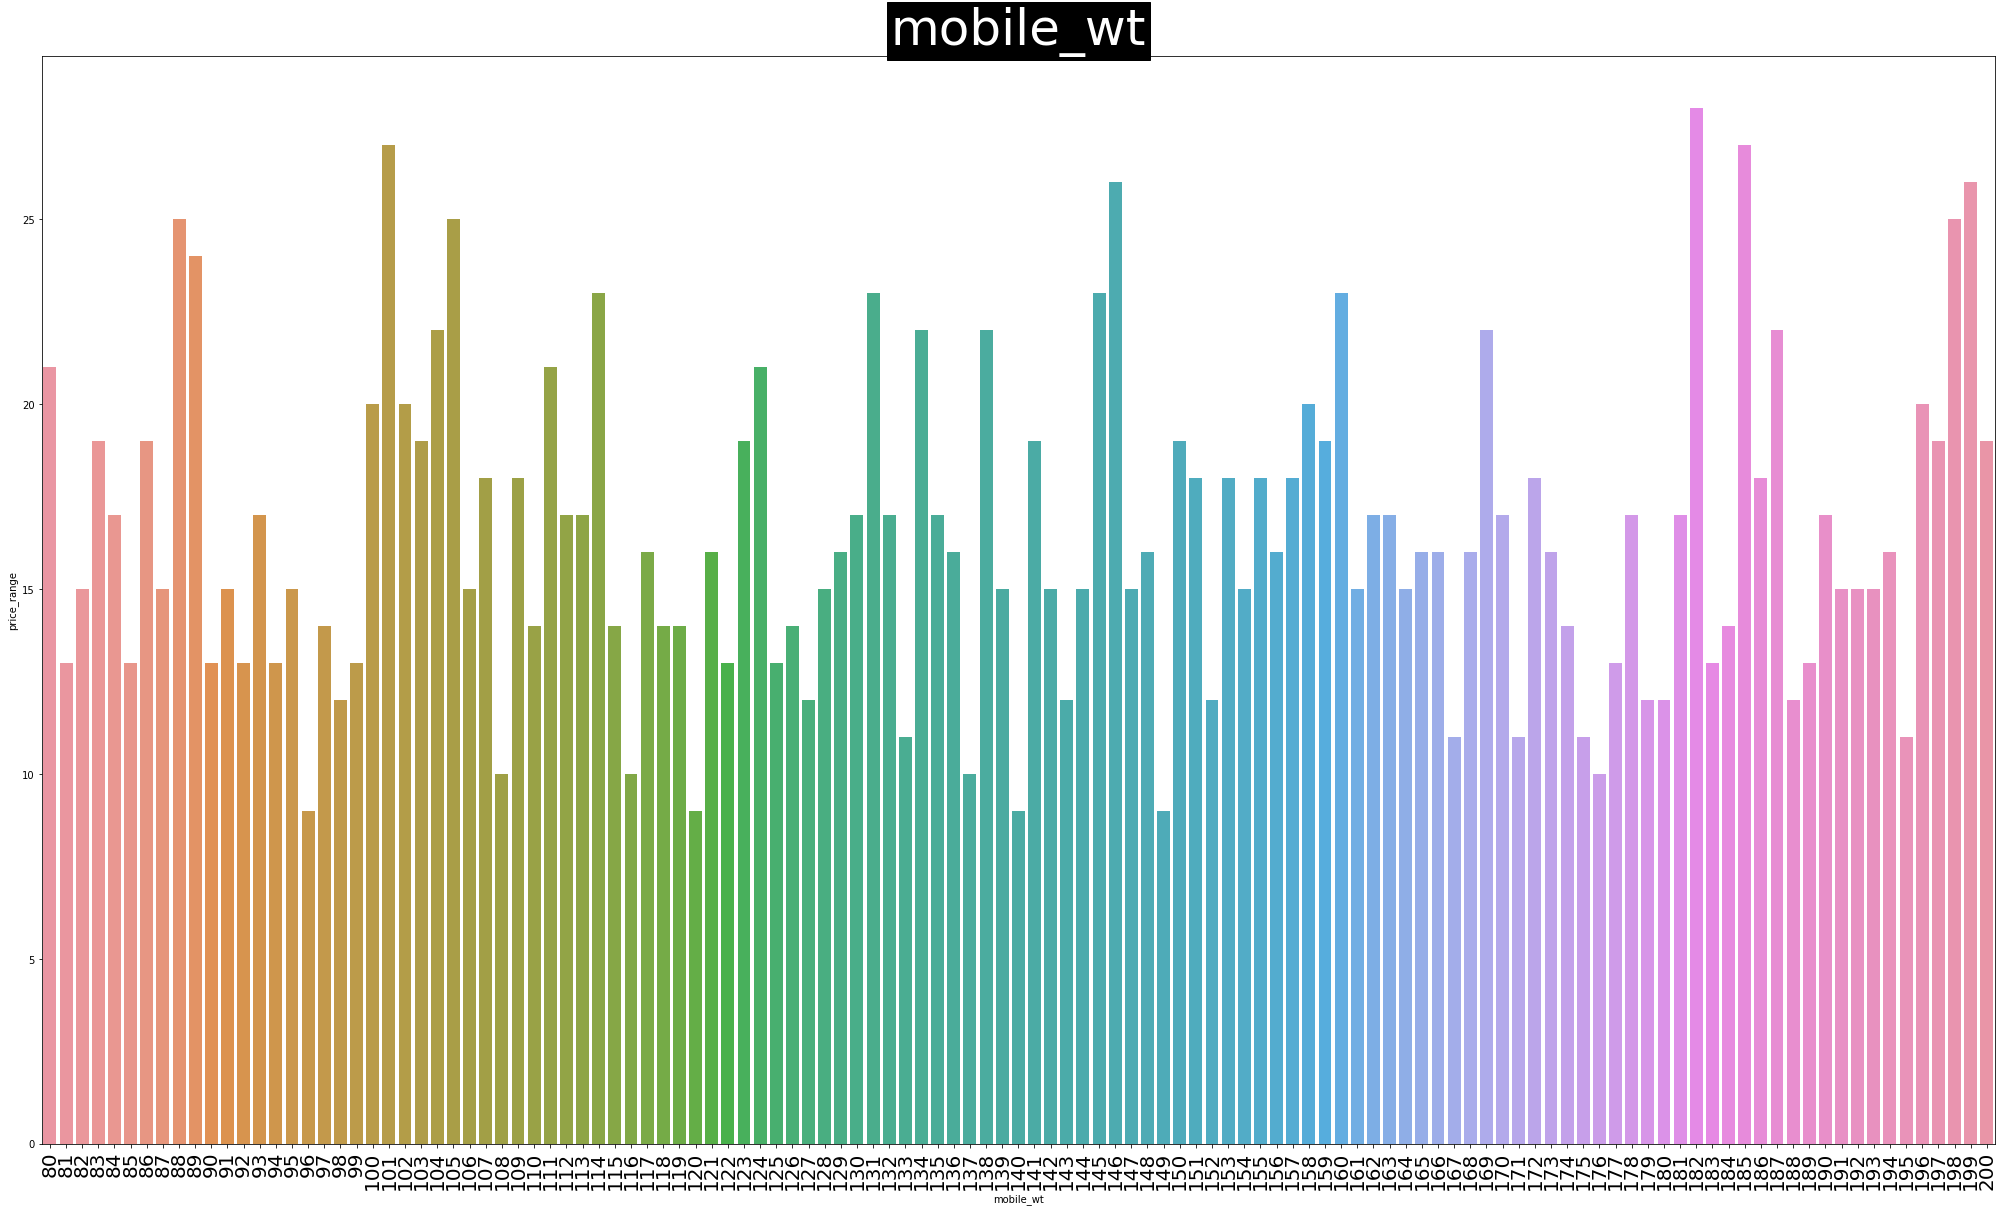

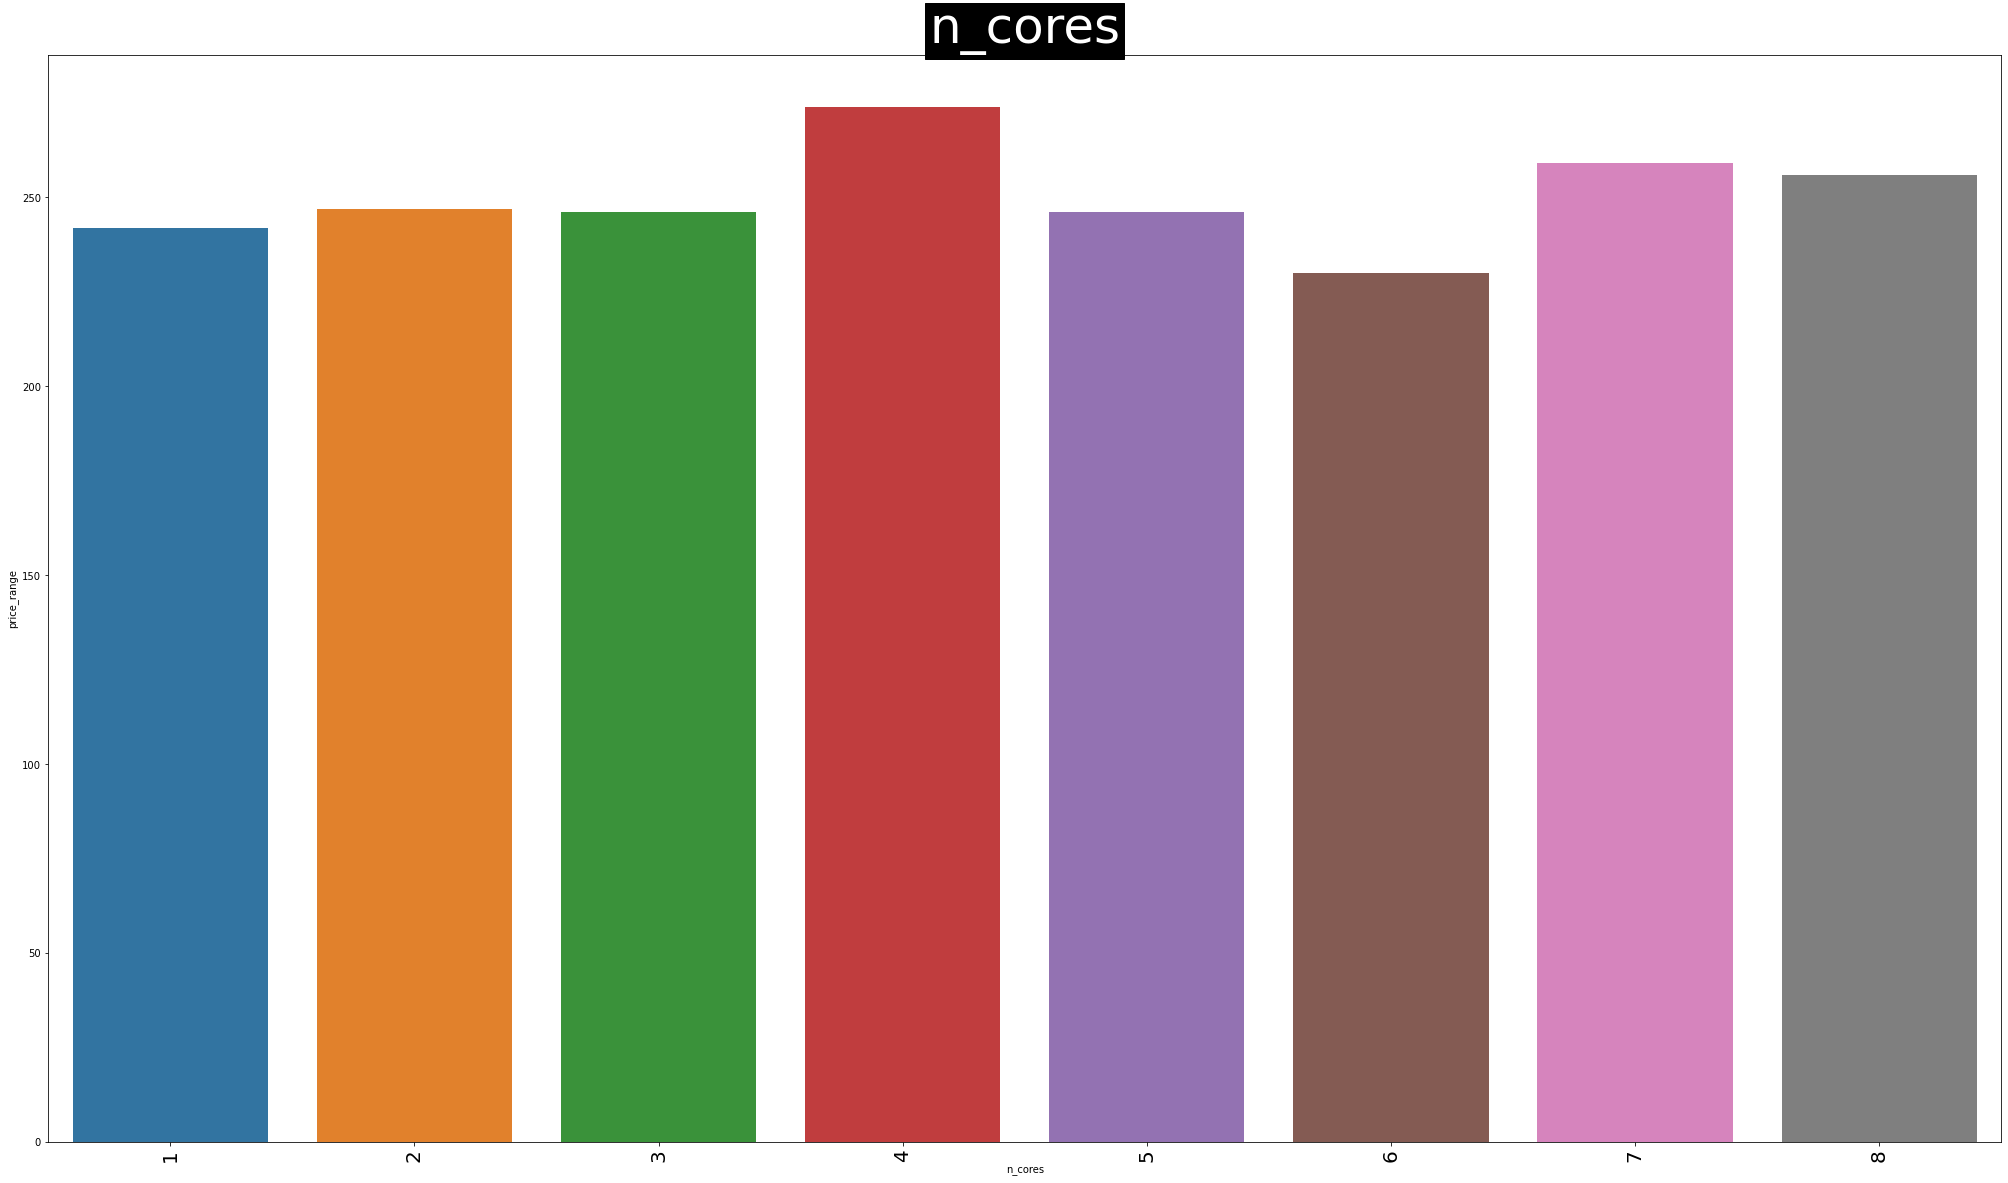

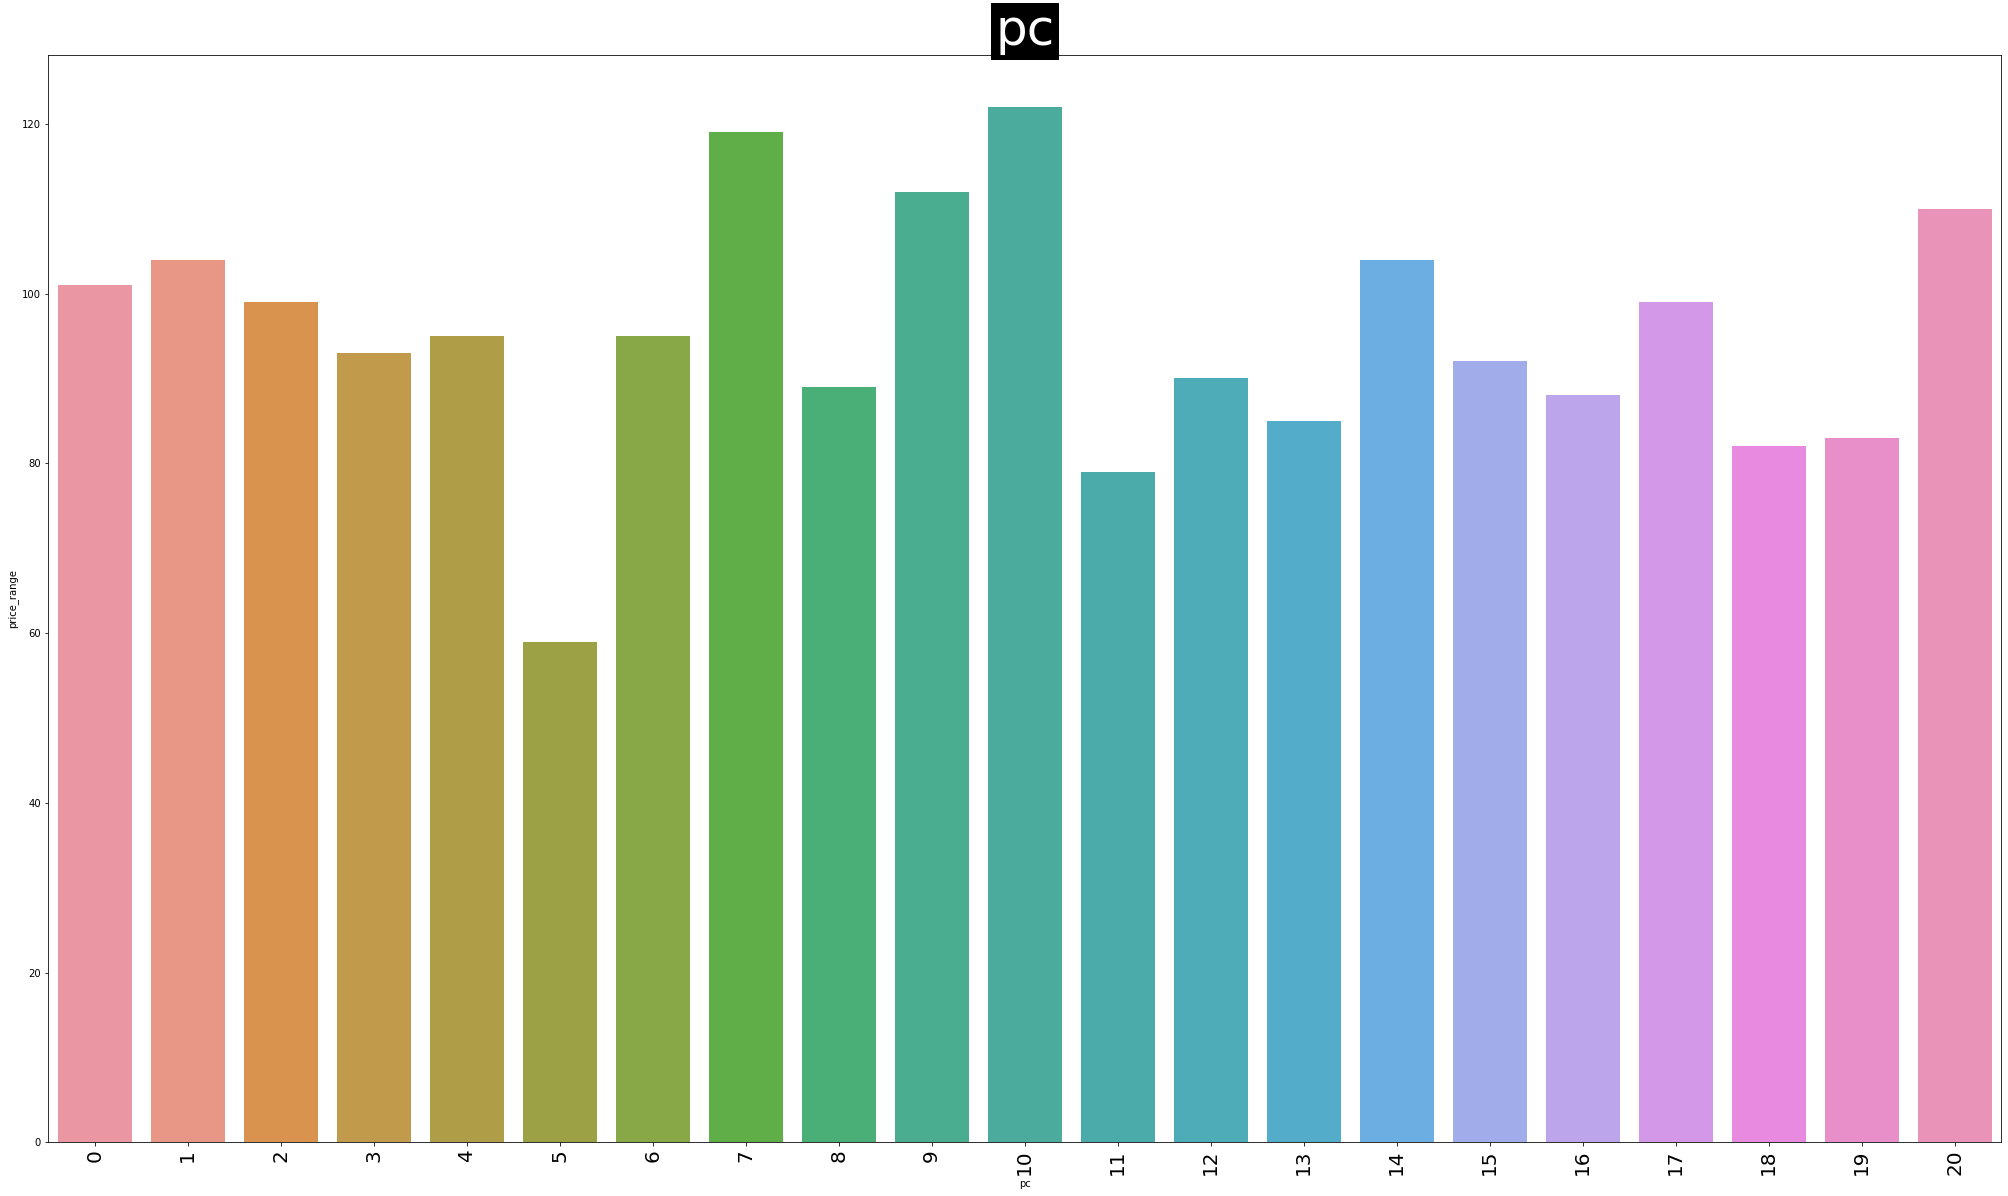

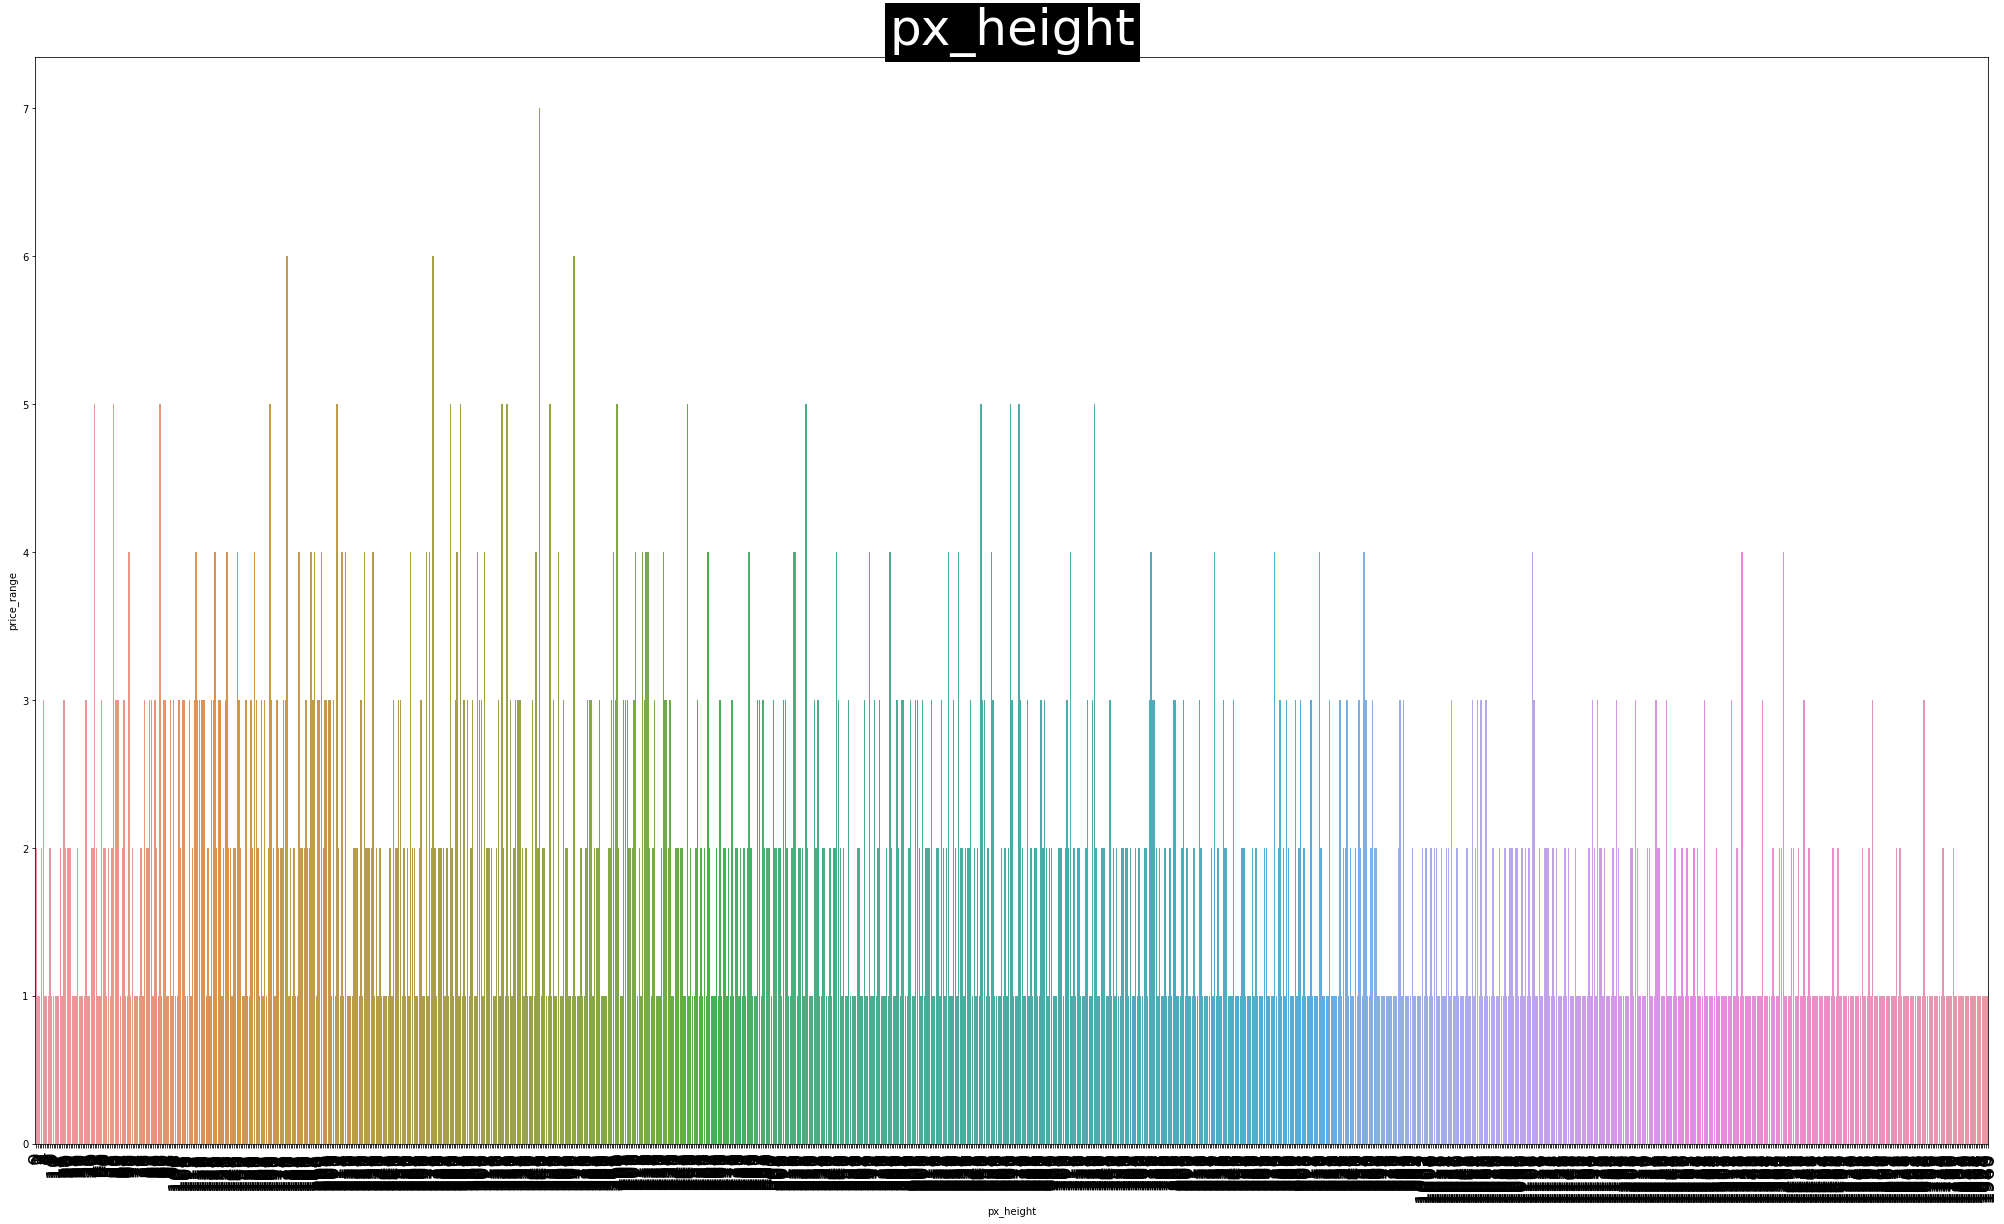

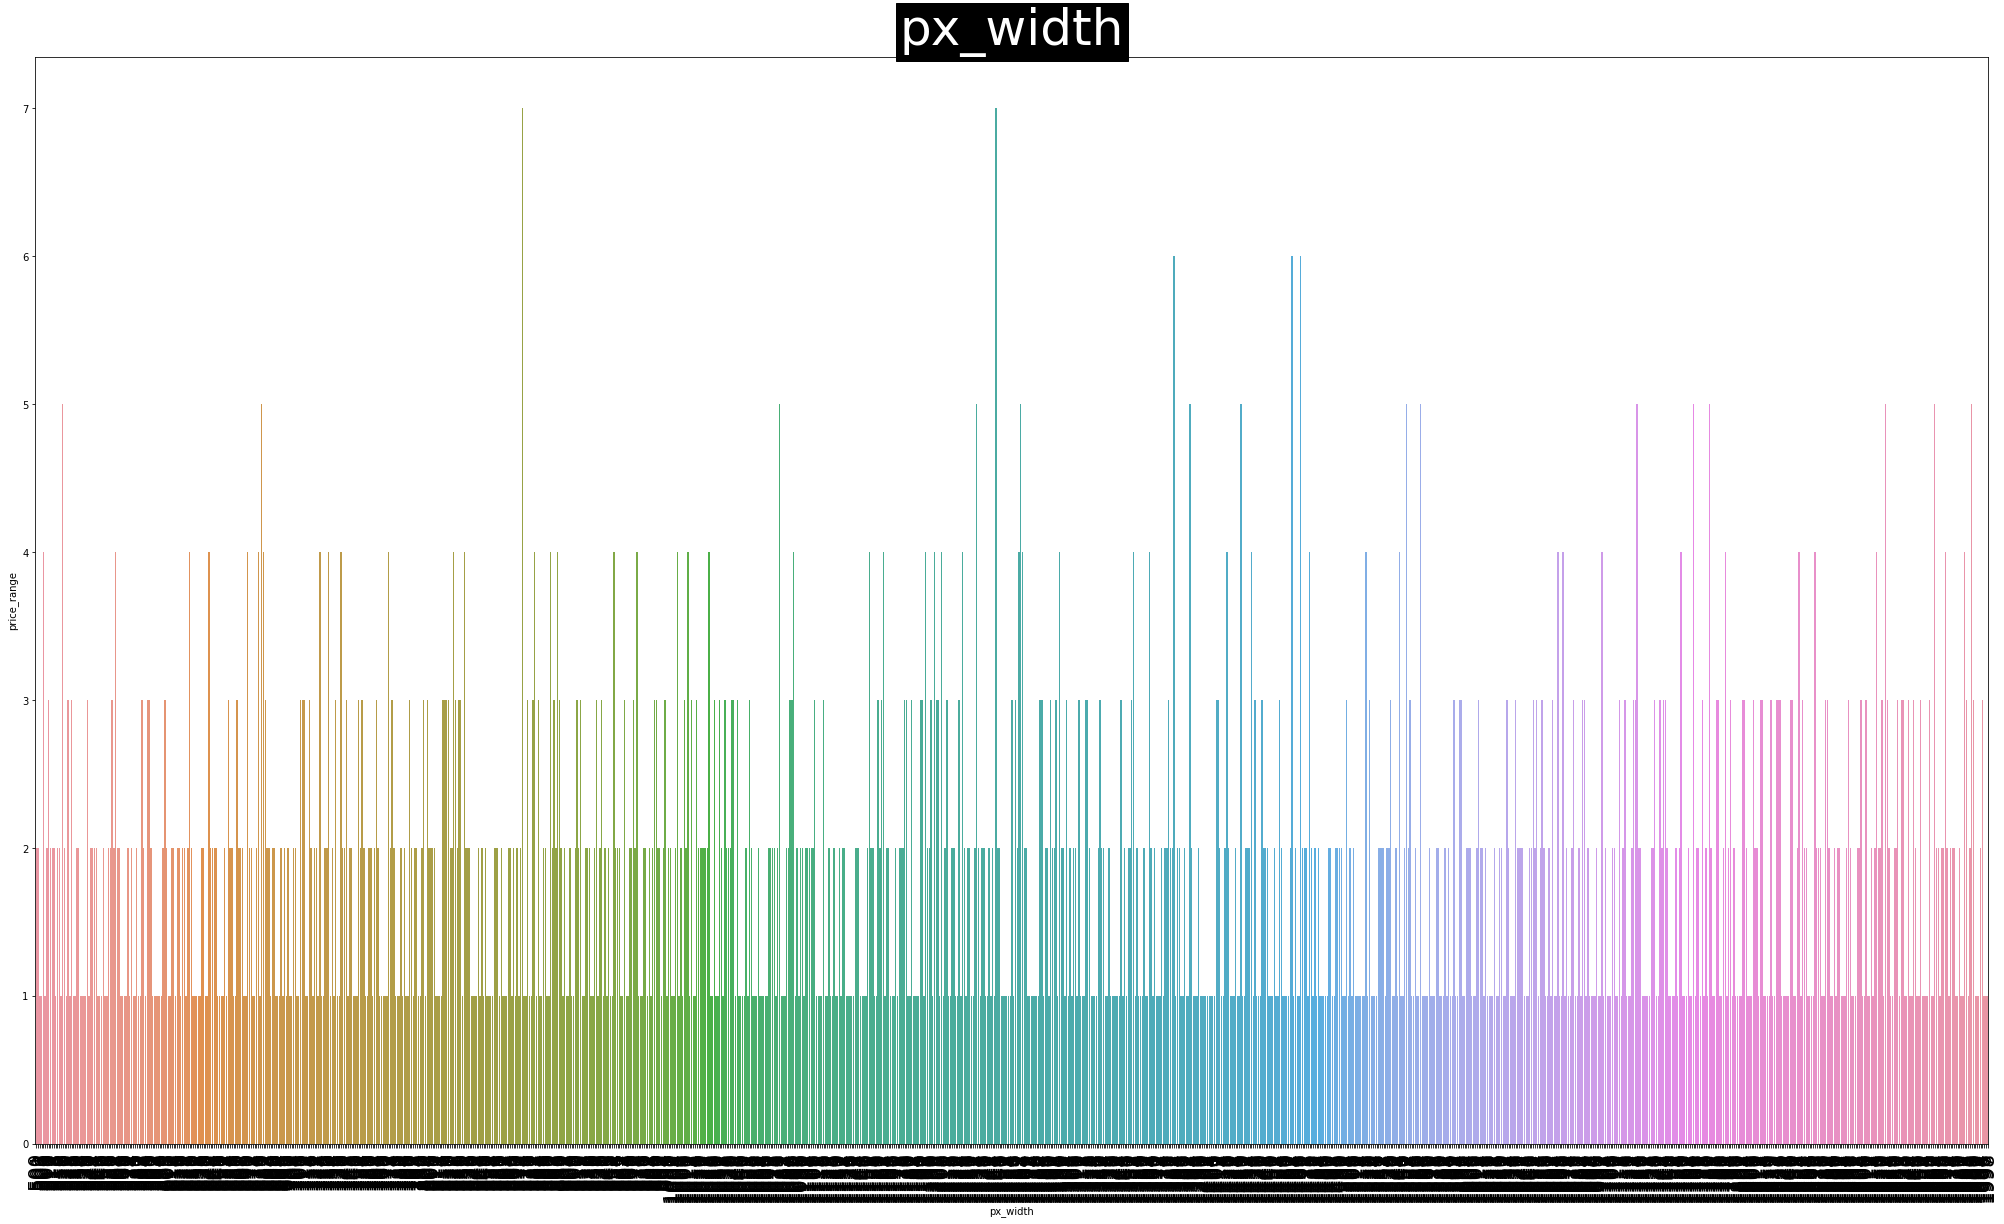

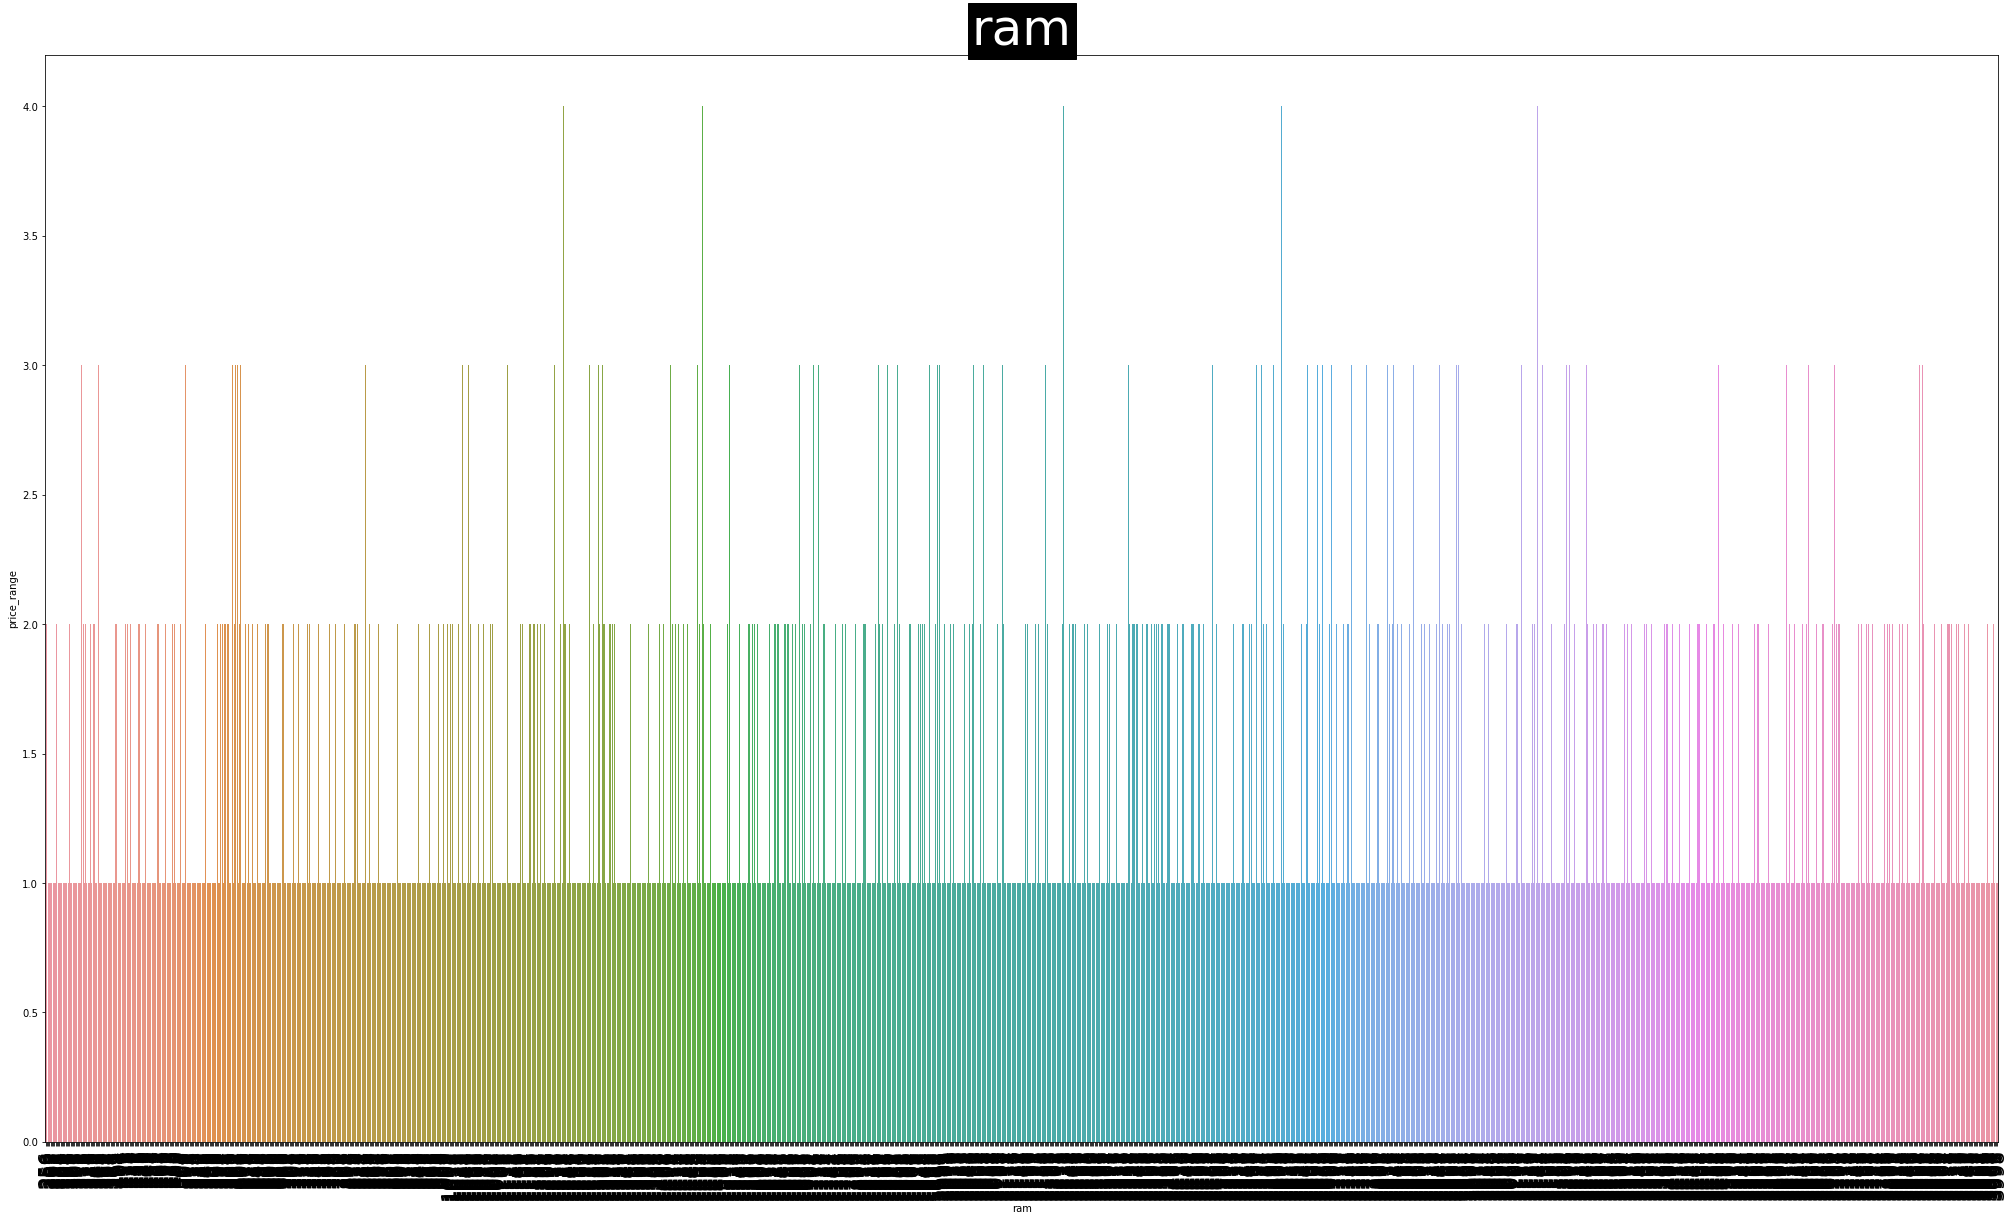

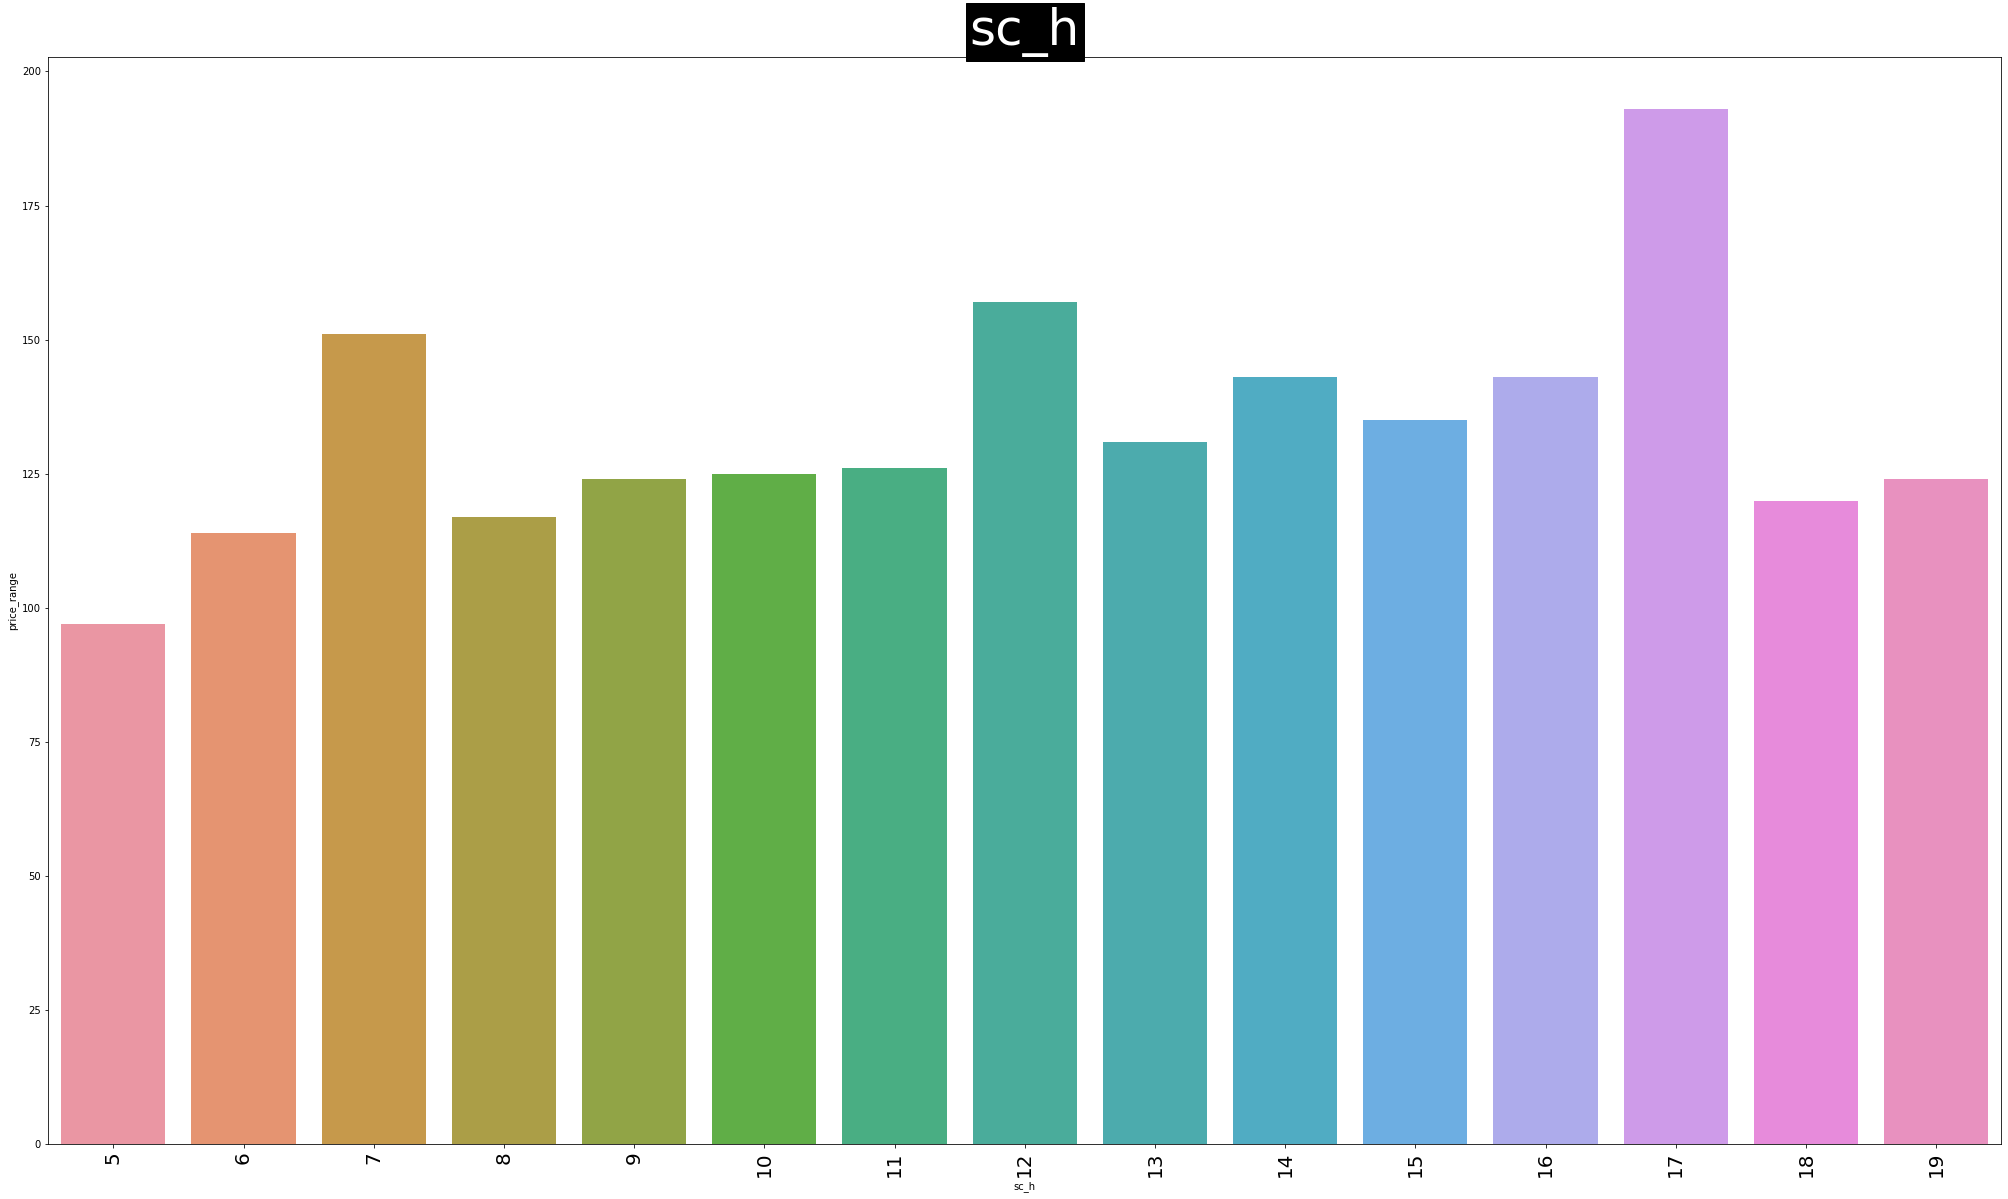

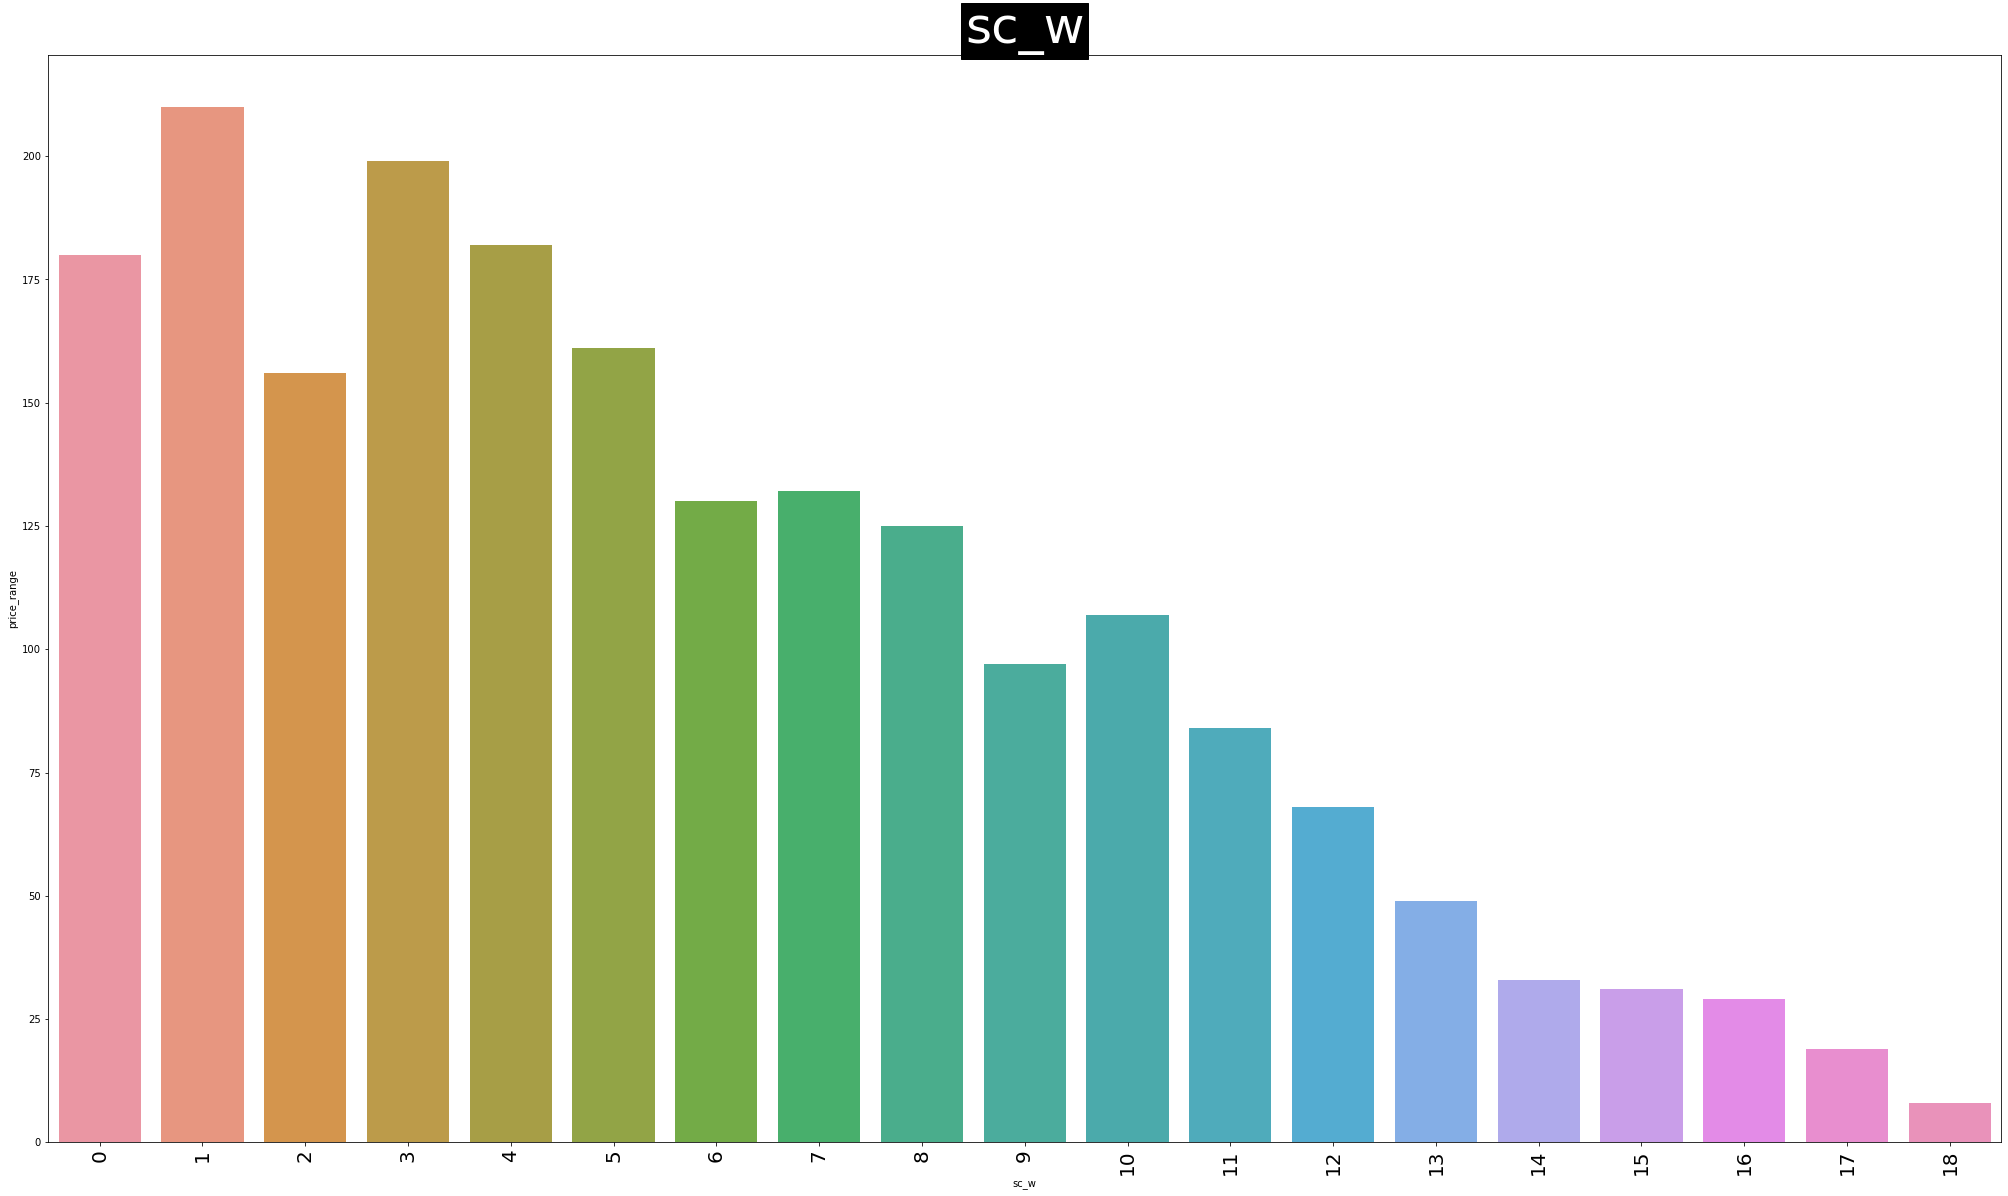

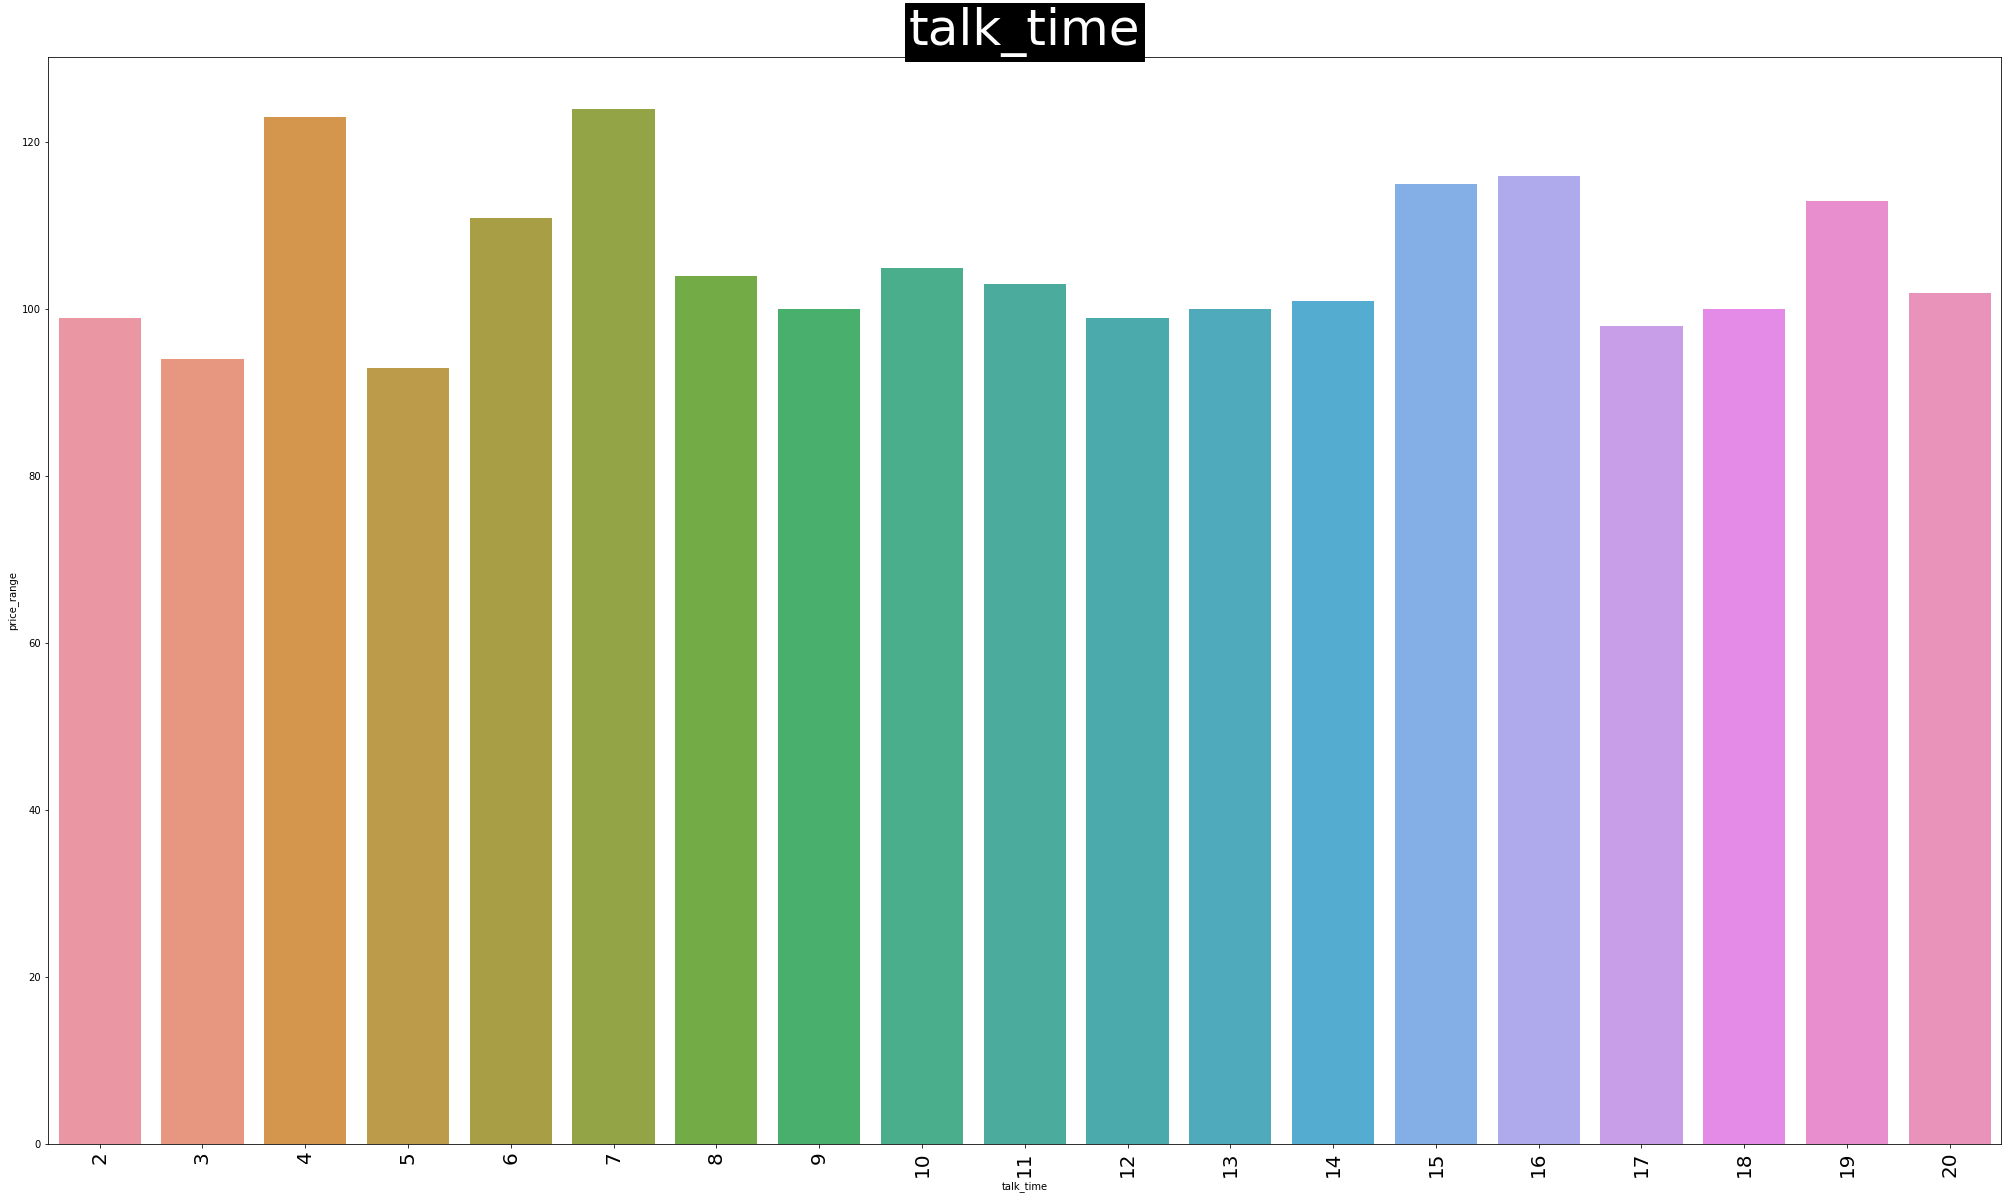

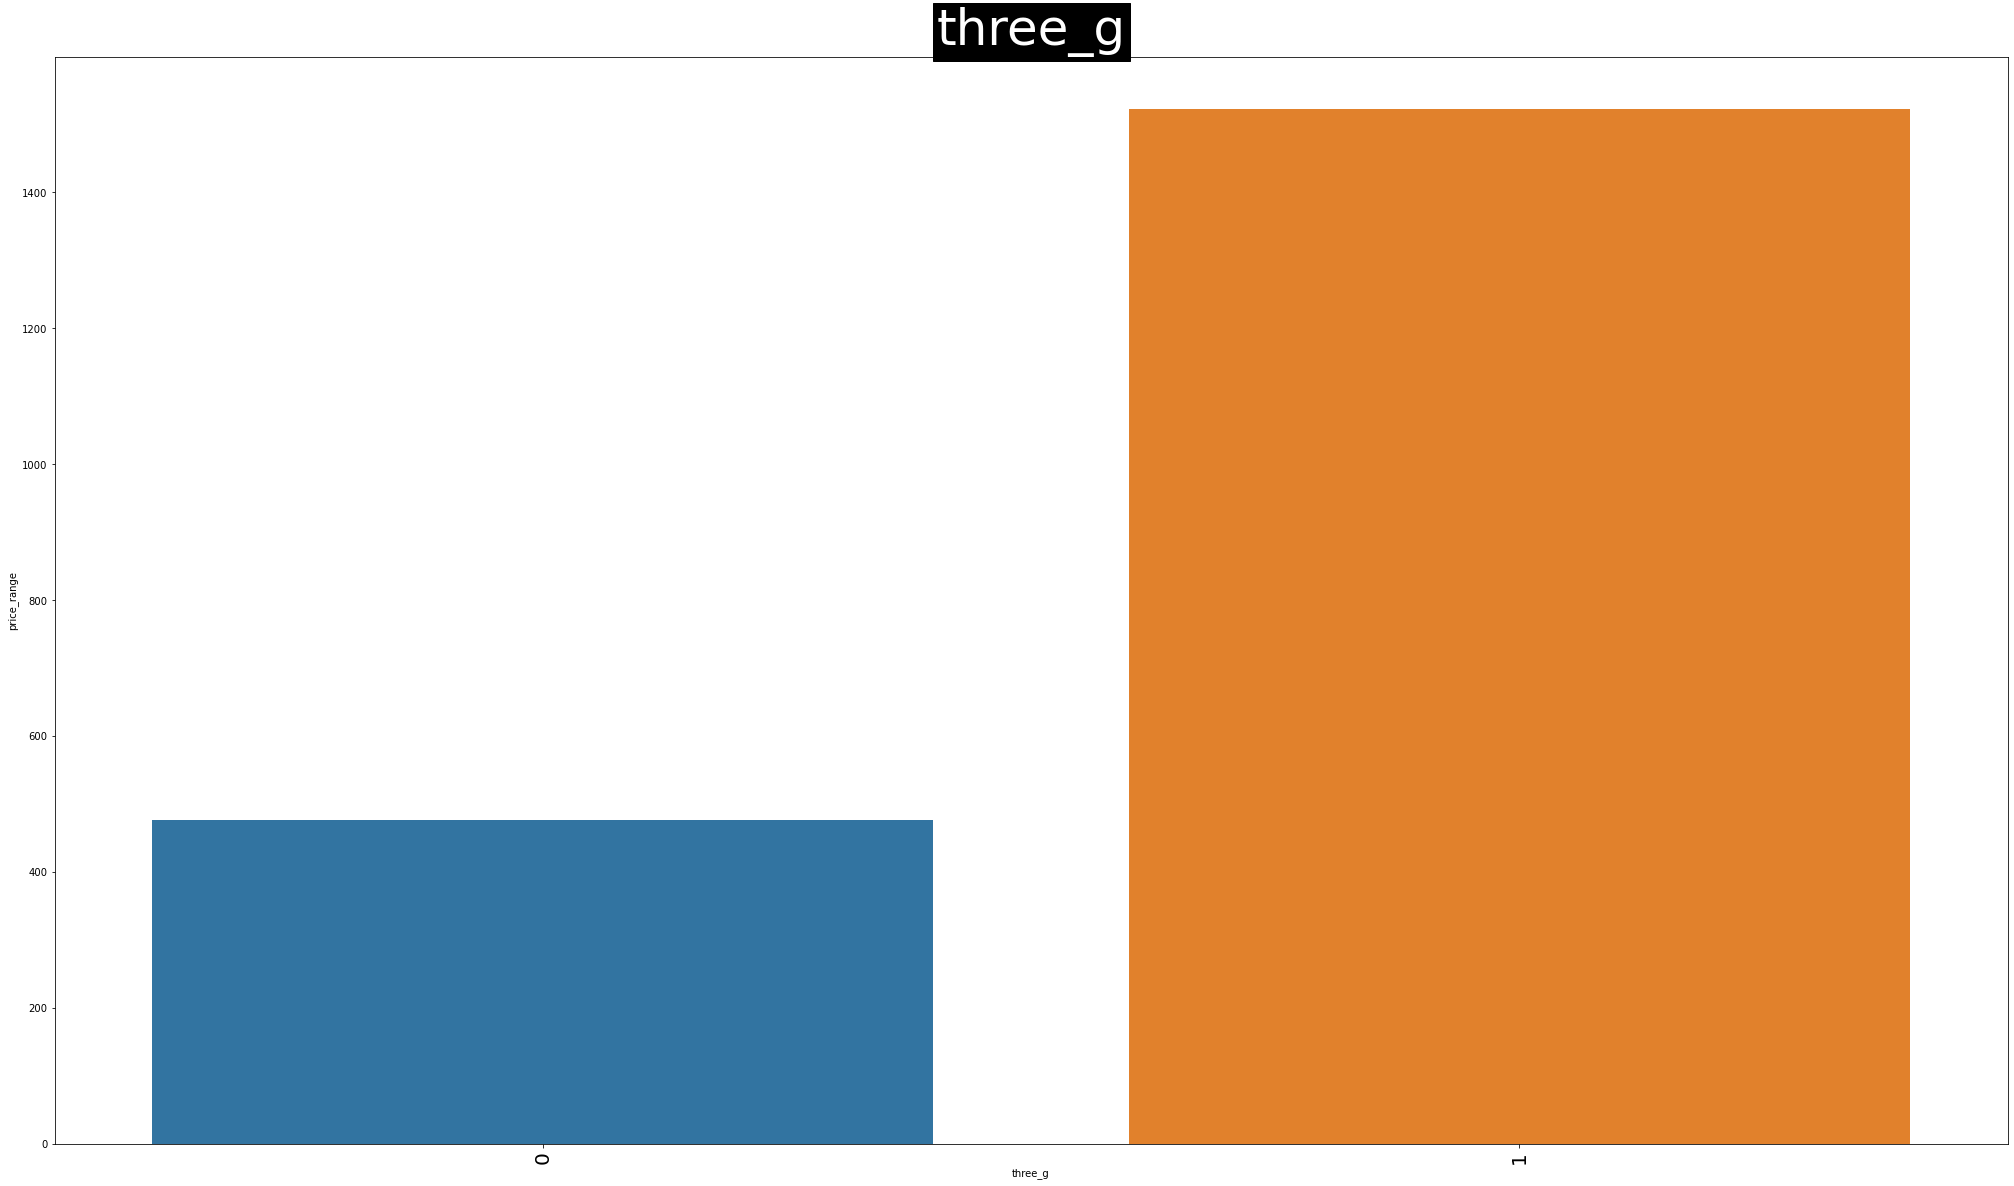

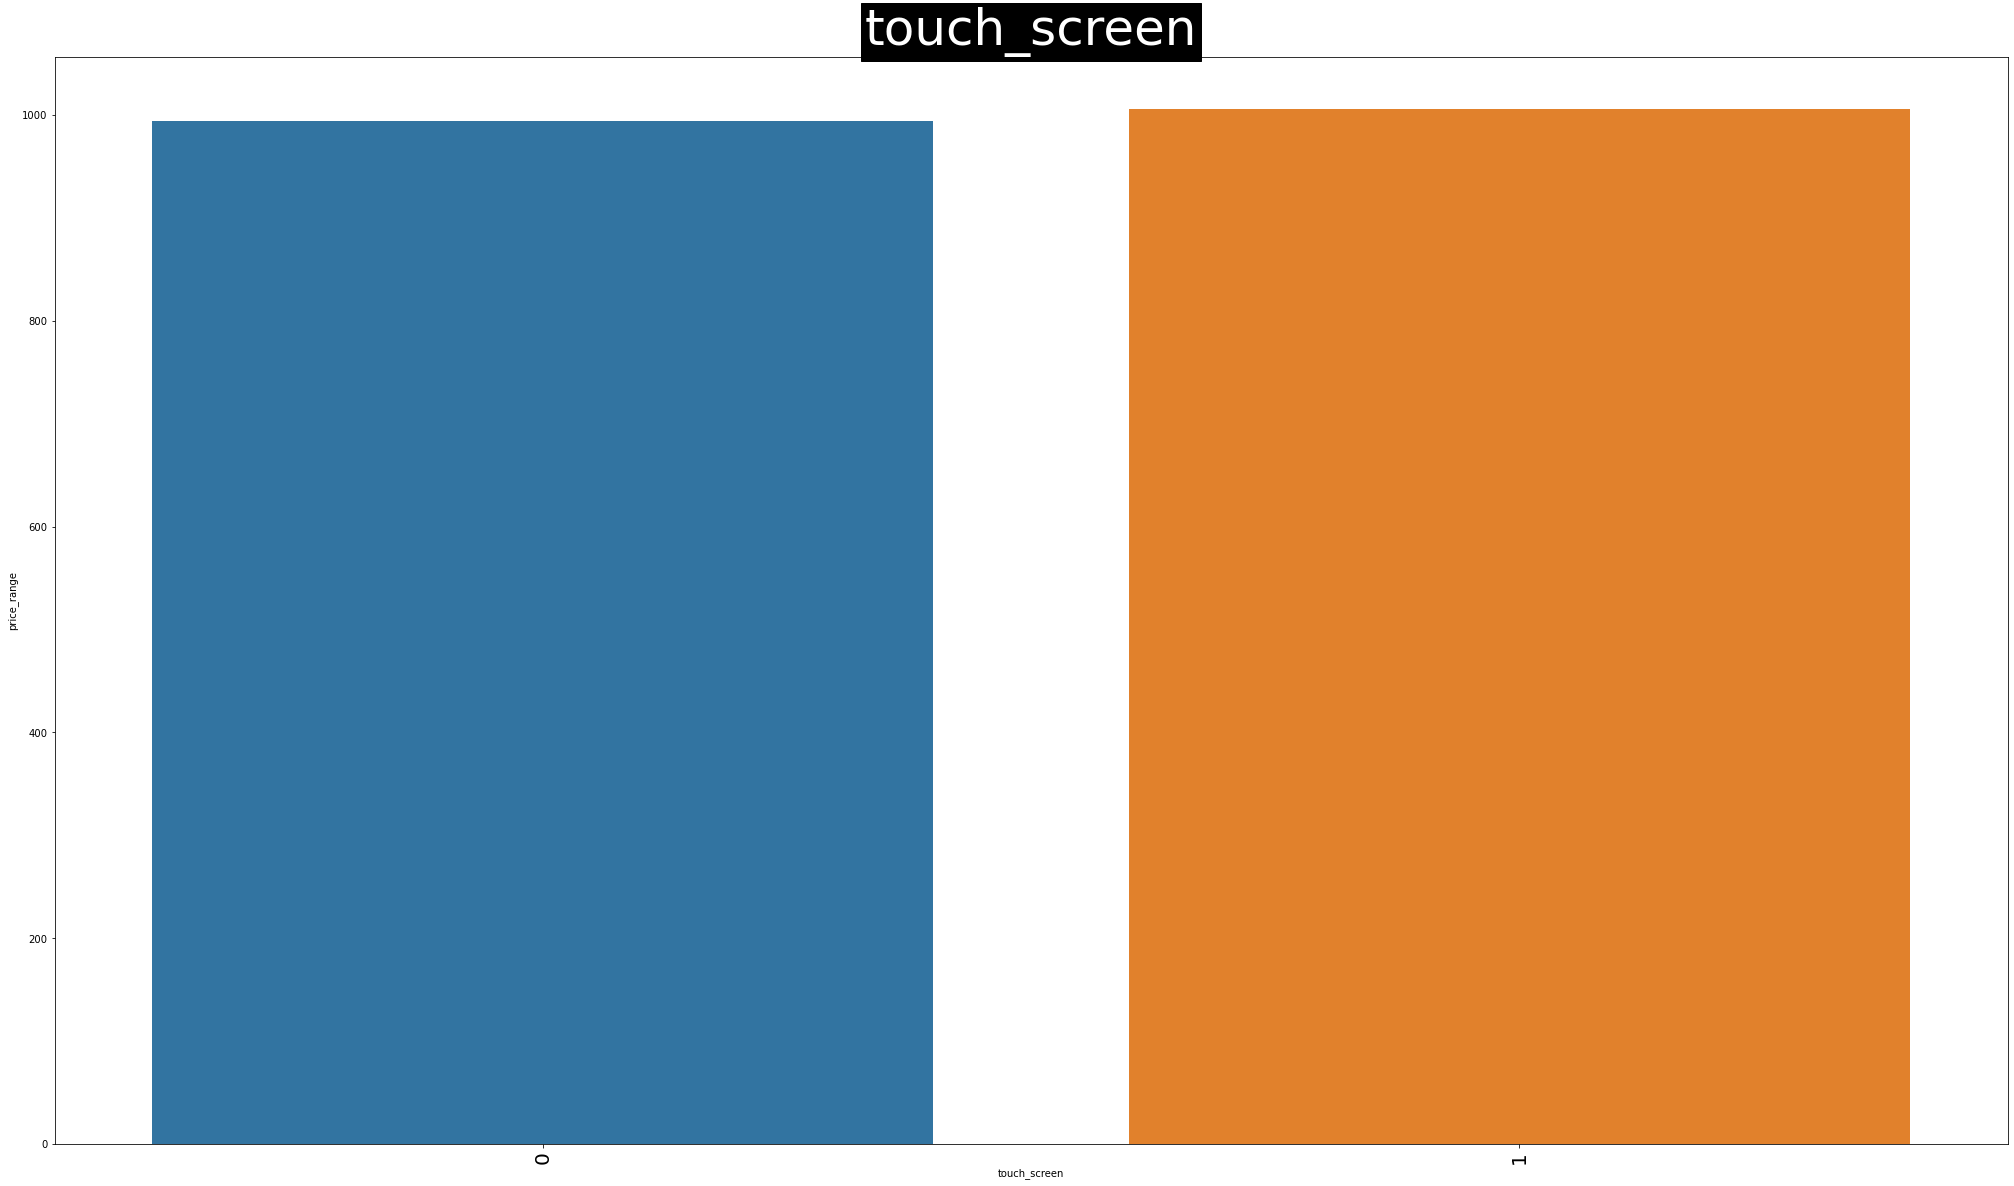

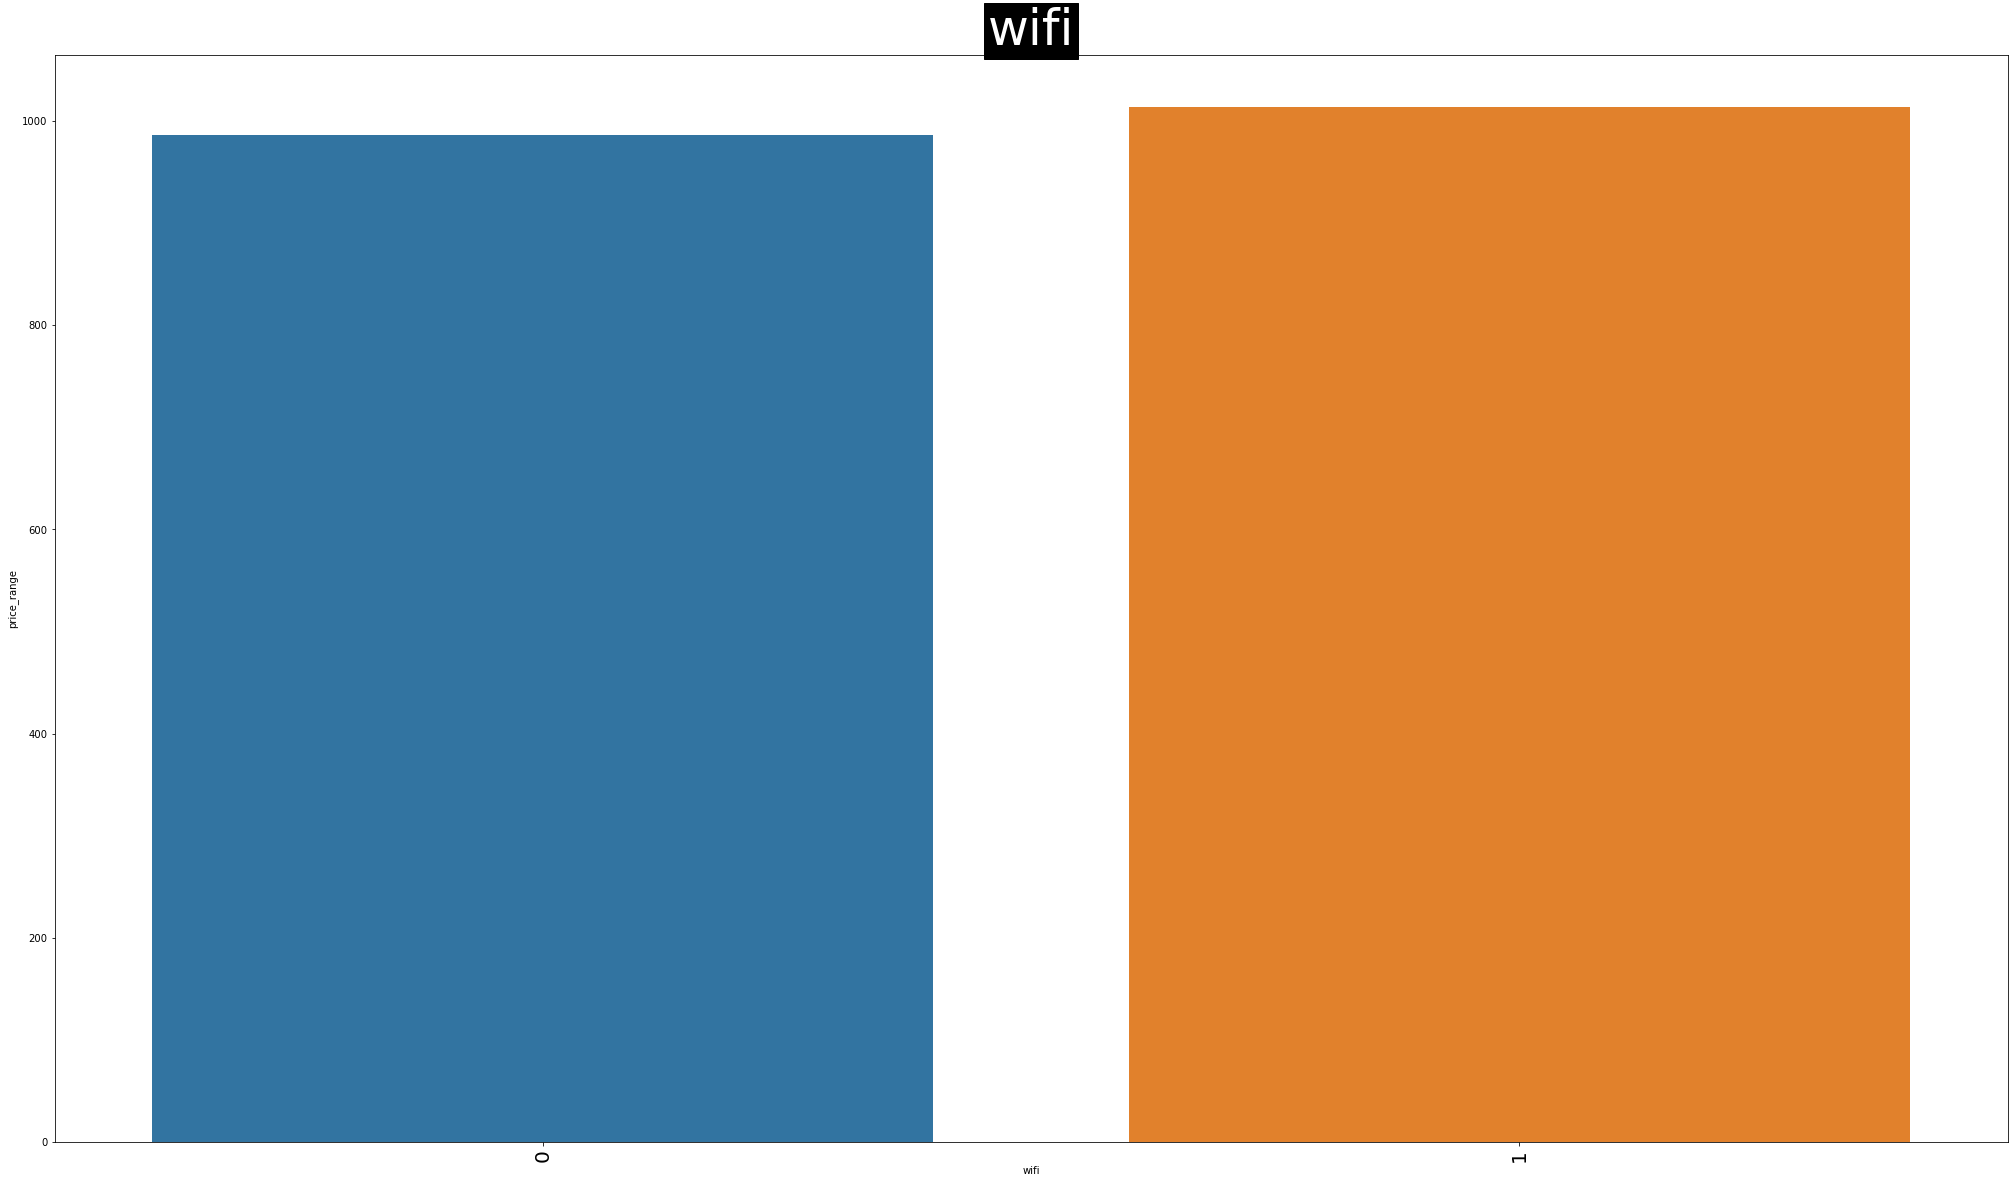

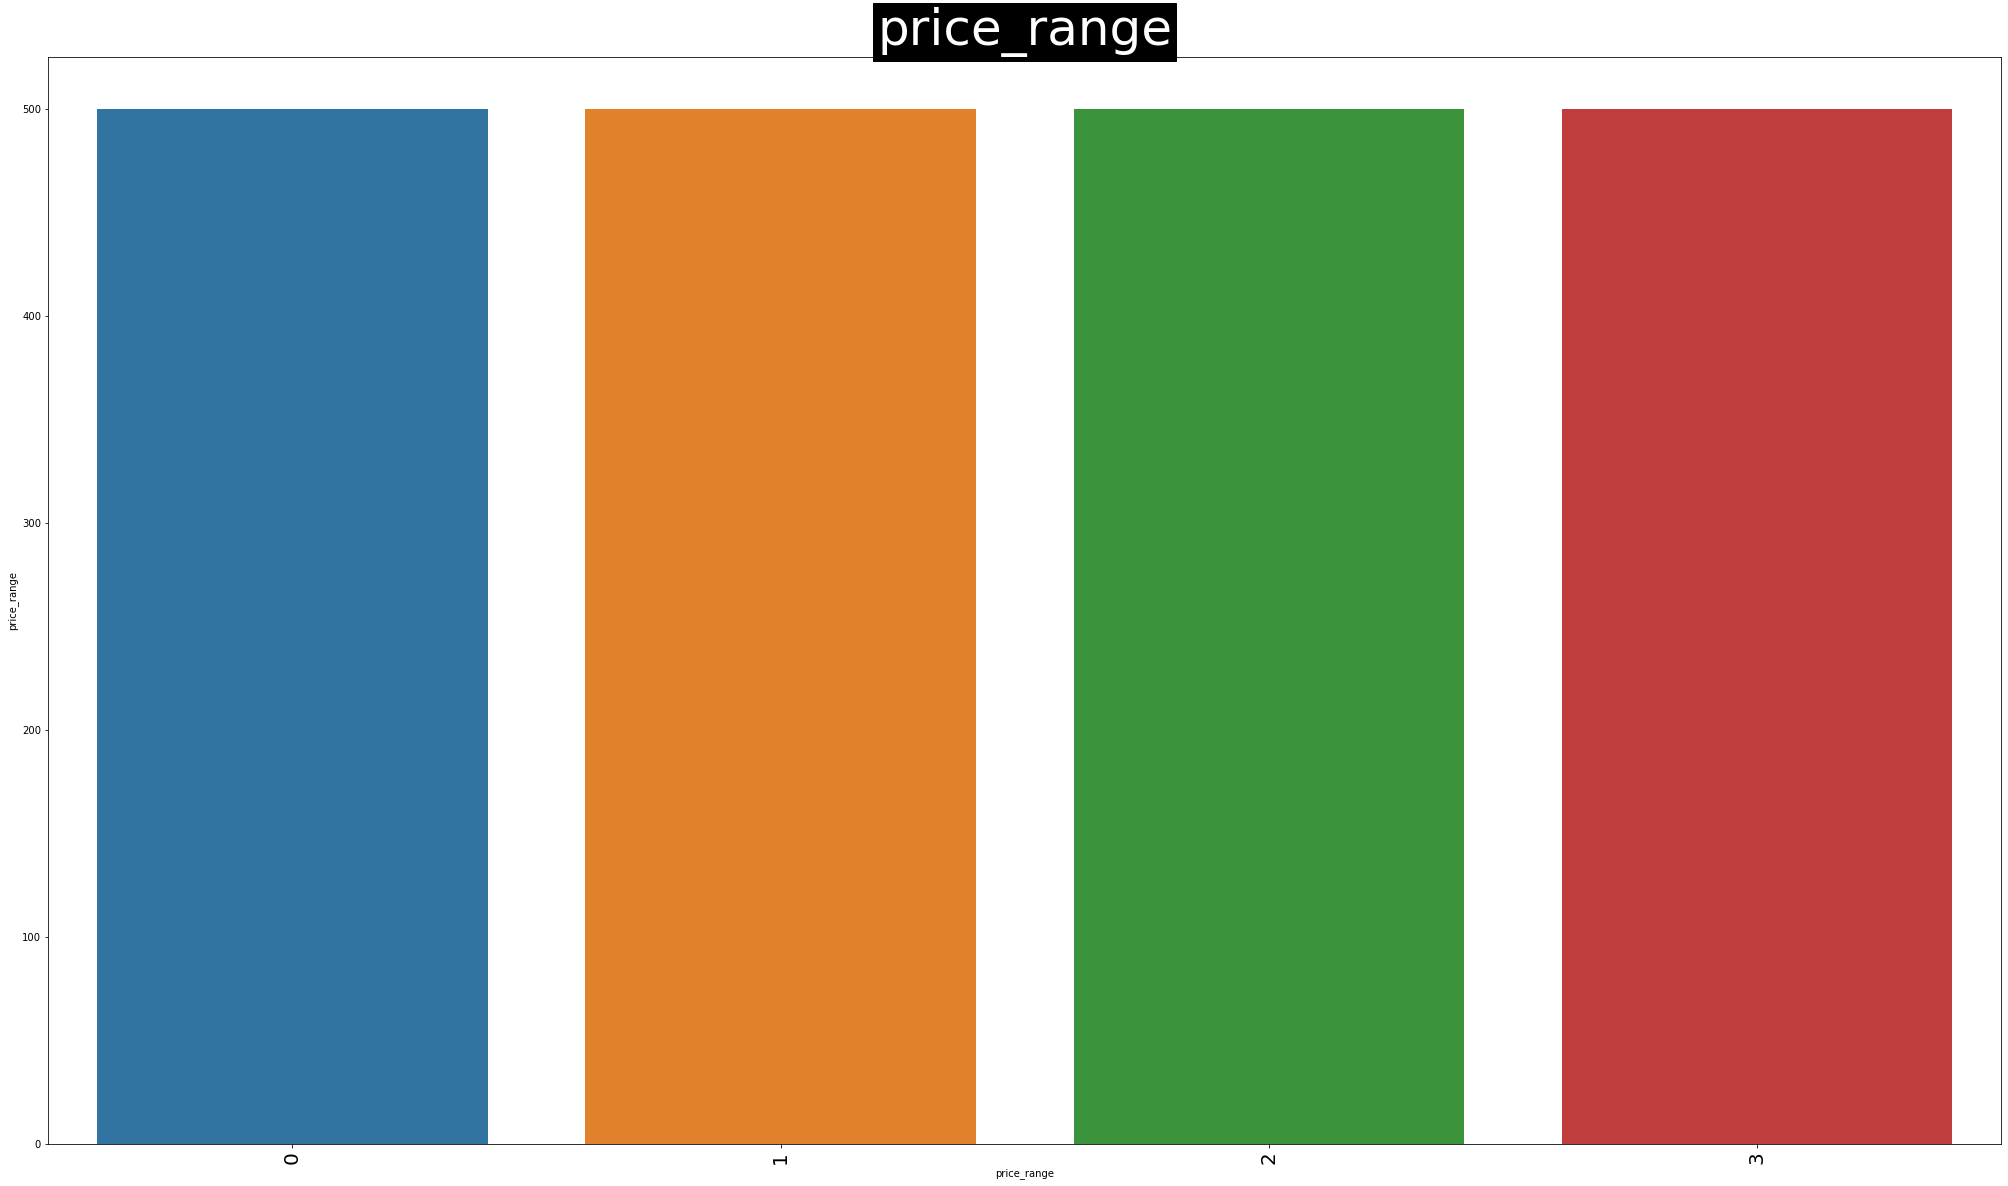

In [47]:
for column in df :     
    plt.figure(figsize=(35,20))
    ax=sns.countplot(x=column,data = df)
    plt.xticks(rotation=90,fontsize=20)
    plt.ylabel('price_range')
    plt.xlabel(column)
    plt.title(column,fontsize=50,backgroundcolor='black',color='white')
    #plt.savefig(column+ ' & Personal Loan.jpg')
    plt.show()

C:\Users\qaem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


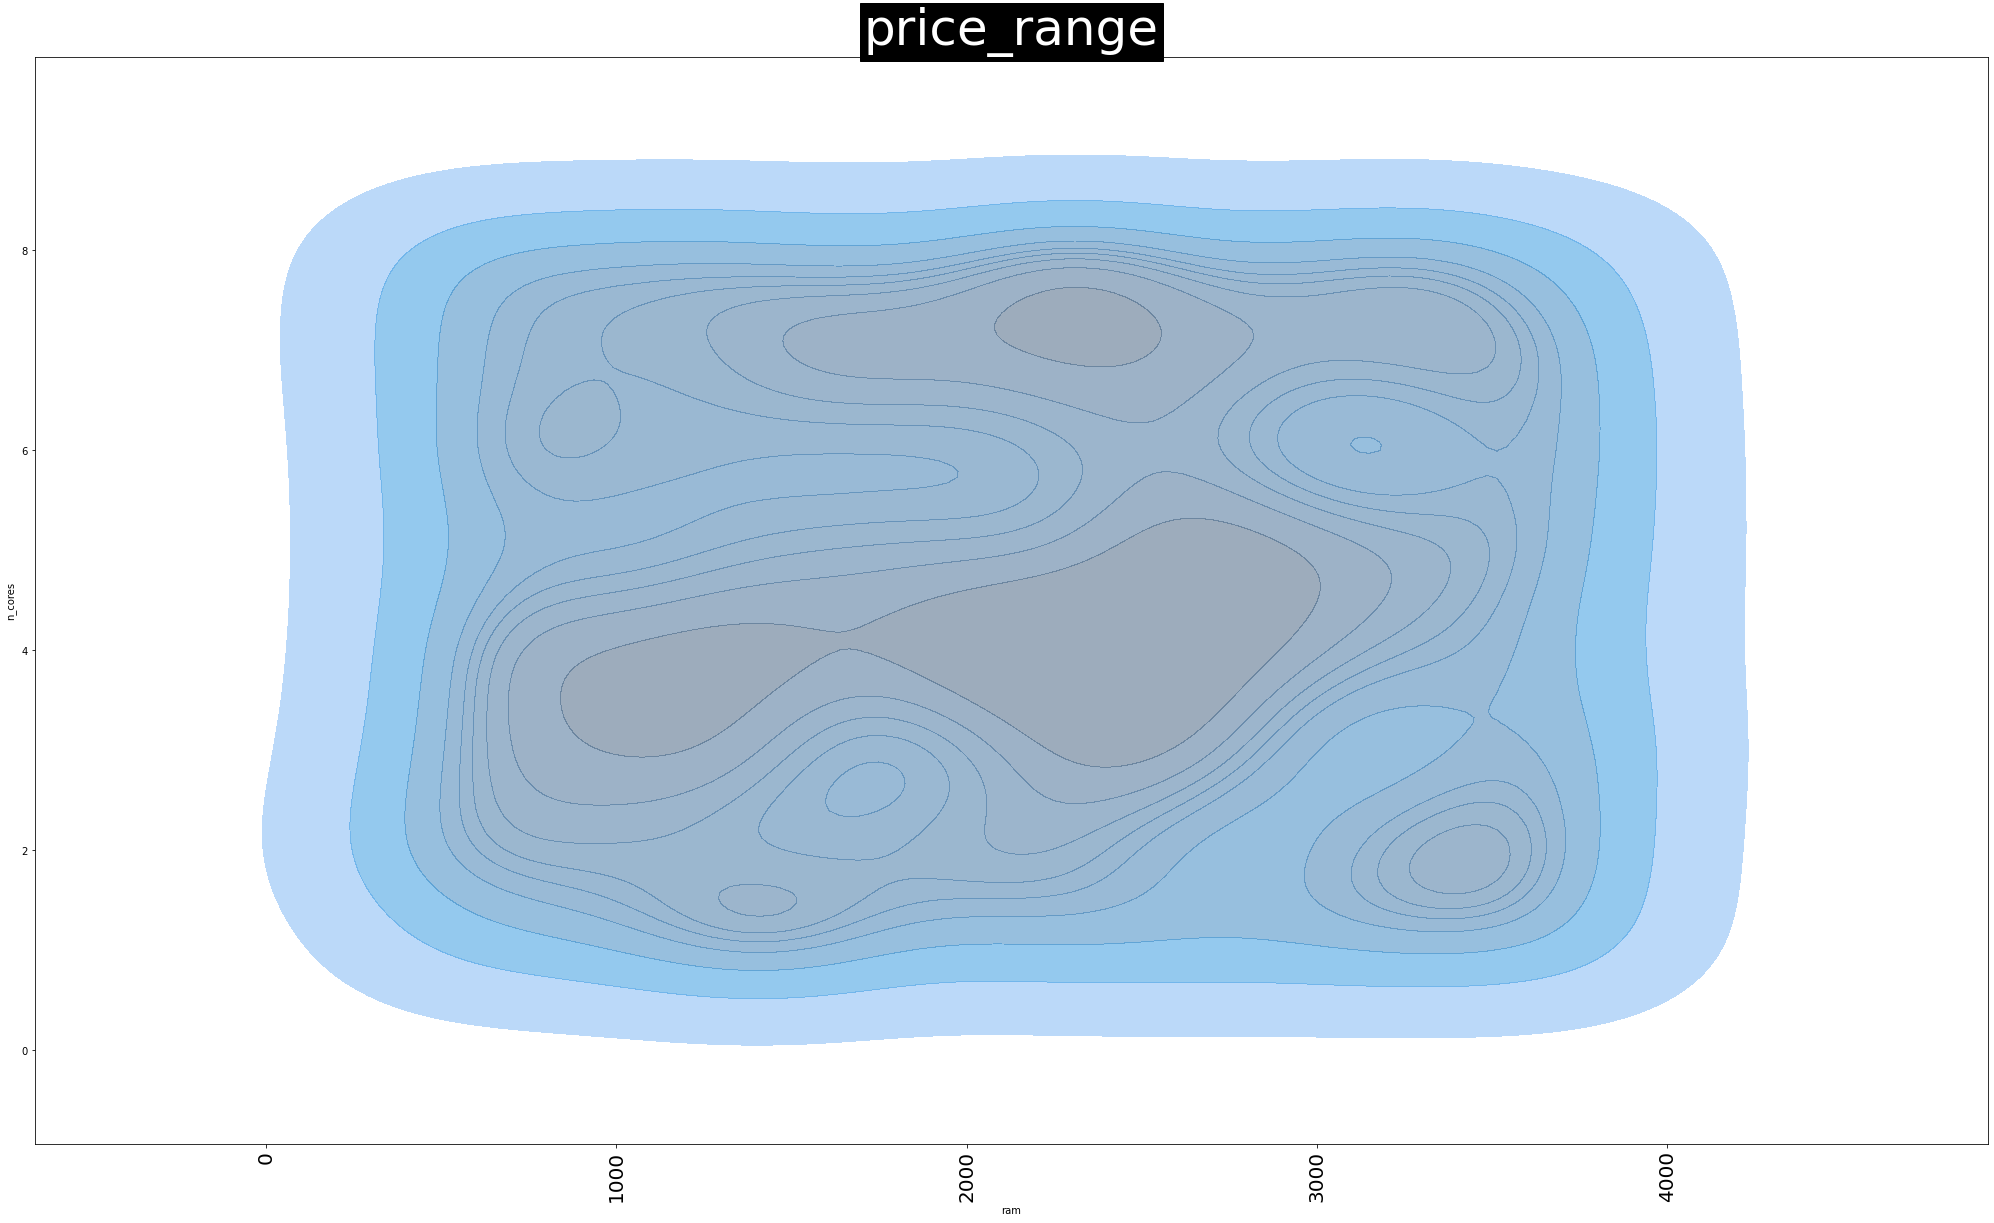

In [48]:
plt.figure(figsize=(35,20))
sns.kdeplot(df['ram'],df['n_cores'],shade=True,fill=True,alpha=0.5)
plt.xticks(rotation=90,fontsize=20)
plt.ylabel('n_cores')
plt.xlabel('ram')
plt.title(column,fontsize=50,backgroundcolor='black',color='white')
#plt.savefig(column+ ' & Personal Loan.jpg')
plt.show()

In [49]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [50]:
df1=df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]

In [51]:
df1.replace([0,1],[2,3],inplace=True)

C:\Users\qaem\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [52]:
df1

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,2,2,2,2,2,3
1,3,3,3,3,3,2
2,3,3,3,3,3,2
3,3,2,2,3,2,2
4,3,2,3,3,3,2
...,...,...,...,...,...,...
1995,3,3,3,3,3,2
1996,3,3,2,3,3,3
1997,2,3,3,3,3,2
1998,2,2,3,3,3,3


In [53]:
df.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi'],axis=1,inplace=True)

In [54]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [55]:
df1

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,2,2,2,2,2,3
1,3,3,3,3,3,2
2,3,3,3,3,3,2
3,3,2,2,3,2,2
4,3,2,3,3,3,2
...,...,...,...,...,...,...
1995,3,3,3,3,3,2
1996,3,3,2,3,3,3
1997,2,3,3,3,3,2
1998,2,2,3,3,3,3


In [56]:
df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]=df1[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]

In [57]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,1,2,2,2,2,2,3
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,2,3,3,3,3,3,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,2,3,3,3,3,3,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,2,3,2,2,3,2,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,3,2,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,...,13,4,19,0,3,3,3,3,3,2
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,...,11,10,16,2,3,3,2,3,3,3
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,...,9,1,5,3,2,3,3,3,3,2
1998,1512,0.9,4,46,0.1,145,5,5,336,670,...,18,10,19,0,2,2,3,3,3,3


>>>>> finish data analyses

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC

In [77]:
from sklearn.metrics import classification_report , confusion_matrix

In [59]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,1,2,2,2,2,2,3
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,2,3,3,3,3,3,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,2,3,3,3,3,3,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,2,3,2,2,3,2,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,3,2,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,...,13,4,19,0,3,3,3,3,3,2
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,...,11,10,16,2,3,3,2,3,3,3
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,...,9,1,5,3,2,3,3,3,3,2
1998,1512,0.9,4,46,0.1,145,5,5,336,670,...,18,10,19,0,2,2,3,3,3,3


In [60]:
x=df.drop('price_range',axis=1)
y=df.price_range.values.reshape(-1,1)

In [61]:
x

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,2,2,2,2,2,3
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,3,3,3,3,3,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,3,3,3,3,3,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,3,2,2,3,2,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,3,2,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,3,3,3,3,3,2
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,3,3,2,3,3,3
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,2,3,3,3,3,2
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,2,2,3,3,3,3


In [62]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=int64)

>>>>>>>>>>>   DecisionTreeClassifier

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.16,random_state=0)

In [65]:
clf = DecisionTreeClassifier(max_depth=7)
clf = clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [66]:
print('acc :',metrics.accuracy_score(y_test,y_pred))

acc : 0.84375


In [67]:
accurasy=pd.DataFrame(columns=['testsize','n','accuracy'])
accurasy

,testsize,n,accuracy


In [69]:
score=[]
score0=0
for i in range(1,40,1):
    I = i/100    
    x=df.drop('price_range',axis=1)
    y=df.price_range
    x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=I,random_state=0)
    for j in range(1,10):
        logreg1 = DecisionTreeClassifier(max_depth=j,criterion='entropy')
        logreg1.fit(x1_train,y1_train.ravel())
        y_pred = logreg1.predict(x_test)
        result1 = metrics.accuracy_score(y_test,y_pred)
        score.append(result1)
        accurasy=accurasy.append({'testsize':i,'n':j,'accuracy':result1},ignore_index=True)
accurasy

,testsize,n,accuracy
0,1.0,1.0,0.534375
1,1.0,2.0,0.768750
2,1.0,3.0,0.775000
3,1.0,4.0,0.821875
4,1.0,5.0,0.859375
...,...,...,...
346,39.0,5.0,0.815625
347,39.0,6.0,0.853125
348,39.0,7.0,0.825000
349,39.0,8.0,0.850000


In [70]:
alg=accurasy.sort_values('accuracy',ascending=False)

In [71]:
alg.head(70)

,testsize,n,accuracy
8,1.0,9.0,0.981250
17,2.0,9.0,0.978125
7,1.0,8.0,0.978125
26,3.0,9.0,0.968750
16,2.0,8.0,0.962500
...,...,...,...
296,33.0,9.0,0.868750
197,22.0,9.0,0.868750
196,22.0,8.0,0.868750
169,19.0,8.0,0.868750


In [73]:
score=[]
score0=0
for i in range(1,40,1):
    I = i/100    
    x=df.drop('price_range',axis=1)
    y=df.price_range.values.reshape(-1,1)
    x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size=I,random_state=0)
    for j in range(1,10):
        logreg1 = DecisionTreeClassifier(max_depth=j,criterion='entropy')
        logreg1.fit(x1_train,y1_train.ravel())
        y_pred = logreg1.predict(x_test)
        result1 = metrics.accuracy_score(y_test,y_pred)
        score.append(result1)
        if result1>score0:
            score0 = result1
            print('max of test_size',i)
print(score)
print(score0)
print(i)
print(j)

max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
max of test_size 1
[0.534375, 0.76875, 0.775, 0.821875, 0.859375, 0.9, 0.95, 0.978125, 0.98125, 0.534375, 0.76875, 0.775, 0.821875, 0.859375, 0.9, 0.95, 0.96875, 0.978125, 0.534375, 0.75625, 0.771875, 0.846875, 0.865625, 0.90625, 0.946875, 0.946875, 0.9625, 0.534375, 0.75625, 0.771875, 0.846875, 0.865625, 0.90625, 0.93125, 0.928125, 0.959375, 0.534375, 0.75625, 0.771875, 0.815625, 0.853125, 0.9, 0.91875, 0.953125, 0.959375, 0.534375, 0.75625, 0.75625, 0.8, 0.853125, 0.90625, 0.93125, 0.928125, 0.95, 0.534375, 0.75625, 0.75625, 0.825, 0.859375, 0.890625, 0.90625, 0.91875, 0.928125, 0.534375, 0.75625, 0.771875, 0.8125, 0.840625, 0.890625, 0.91875, 0.921875, 0.93125, 0.534375, 0.75625, 0.771875, 0.7875, 0.8375, 0.8875, 0.9, 0.93125, 0.9375, 0.534375, 0.75625, 0.771875, 0.8125, 0.83125, 0.8875, 0.9, 0.90625, 0.9, 0.534375, 0.75625, 0.771875

In [74]:
############ nahayi    DecisionTreeClassifier

In [87]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.39,random_state=0)

In [94]:
random = RandomForestClassifier(max_depth=15,n_estimators=30)
random = clf.fit(x1_train,y1_train.ravel())
y1_pred=random.predict(x1_test)

In [95]:
print('acc :',metrics.accuracy_score(y1_test,y1_pred))

acc : 0.84


In [96]:
confusion_matrix(y,random.predict(x))

array([[488,  12,   0,   0],
       [ 23, 455,  22,   0],
       [  0,  43, 424,  33],
       [  0,   0,  23, 477]], dtype=int64)

In [97]:
print(classification_report(y,random.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       500
           1       0.89      0.91      0.90       500
           2       0.90      0.85      0.88       500
           3       0.94      0.95      0.94       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [98]:
####   accuracy     92

>>>>>>>>>>>   RandomForestClassifier

In [99]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'max_depth': [2,3,4,5,6,7,8,10,15,20,30],
            'n_estimators': [2,3,4,5,6,7,8,10,15,20,30]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x1_train, y1_train)


Fitting 5 folds for each of 121 candidates, totalling 605 fits
[CV 1/5] END .......max_depth=2, n_estimators=2;, score=0.493 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=2;, score=0.282 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=2;, score=0.336 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=2;, score=0.325 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=2;, score=0.761 total time=   0.0s
[CV 1/5] END .......max_depth=2, n_estimators=3;, score=0.257 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=3;, score=0.307 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=3;, score=0.532 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=3;, score=0.489 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=3;, score=0.539 total time=   0.0s
[CV 1/5] END .......max_depth=2, n_estimators=4;, score=0.654 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=2, n_estimators=6;, score=0.739 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=6;, score=0.661 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=6;, score=0.554 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=6;, score=0.771 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=6;, score=0.571 total time=   0.0s
[CV 1/5] END .......max_depth=2, n_estimators=7;, score=0.550 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=7;, score=0.693 total time=   0.0s
[CV 3/5] END .......max_depth=2, n_estimators=7;, score=0.636 total time=   0.0s
[CV 4/5] END .......max_depth=2, n_estimators=7;, score=0.636 total time=   0.0s
[CV 5/5] END .......max_depth=2, n_estimators=7;, score=0.696 total time=   0.0s
[CV 1/5] END .......max_depth=2, n_estimators=8;, score=0.614 total time=   0.0s
[CV 2/5] END .......max_depth=2, n_estimators=8;, score=0.632 total time=   0.0s
[CV 3/5] END .......max_dept

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=2, n_estimators=10;, score=0.629 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=10;, score=0.761 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=10;, score=0.689 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=10;, score=0.711 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=15;, score=0.725 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=15;, score=0.729 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=15;, score=0.646 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=15;, score=0.618 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=15;, score=0.611 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=2, n_estimators=20;, score=0.589 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=20;, score=0.768 total time=   0.0s
[CV 3/5] END ......max_depth=2, n_estimators=20;, score=0.729 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=20;, score=0.632 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=20;, score=0.693 total time=   0.0s
[CV 1/5] END ......max_depth=2, n_estimators=30;, score=0.743 total time=   0.0s
[CV 2/5] END ......max_depth=2, n_estimators=30;, score=0.743 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END ......max_depth=2, n_estimators=30;, score=0.757 total time=   0.0s
[CV 4/5] END ......max_depth=2, n_estimators=30;, score=0.671 total time=   0.0s
[CV 5/5] END ......max_depth=2, n_estimators=30;, score=0.693 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=2;, score=0.489 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=2;, score=0.511 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=2;, score=0.554 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=2;, score=0.386 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=2;, score=0.361 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=3;, score=0.621 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=3;, score=0.421 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=3;, score=0.482 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=3;, score=0.496 total time=   0.0s
[CV 5/5] END .......max_dept

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END .......max_depth=3, n_estimators=4;, score=0.746 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=4;, score=0.546 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=4;, score=0.693 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=5;, score=0.414 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=5;, score=0.721 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=5;, score=0.746 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=5;, score=0.771 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=5;, score=0.554 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=6;, score=0.593 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=6;, score=0.754 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=6;, score=0.636 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=6;, score=0.679 total time=   0.0s
[CV 5/5] END .......max_dept

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .......max_depth=3, n_estimators=7;, score=0.754 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=7;, score=0.725 total time=   0.0s
[CV 1/5] END .......max_depth=3, n_estimators=8;, score=0.761 total time=   0.0s
[CV 2/5] END .......max_depth=3, n_estimators=8;, score=0.718 total time=   0.0s
[CV 3/5] END .......max_depth=3, n_estimators=8;, score=0.693 total time=   0.0s
[CV 4/5] END .......max_depth=3, n_estimators=8;, score=0.611 total time=   0.0s
[CV 5/5] END .......max_depth=3, n_estimators=8;, score=0.696 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.679 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.750 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.618 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.736 total time=   0.0s
[CV 1/5] END ......max_depth

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END ......max_depth=3, n_estimators=15;, score=0.757 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=15;, score=0.736 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=15;, score=0.714 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=15;, score=0.700 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=3, n_estimators=20;, score=0.725 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=20;, score=0.843 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=20;, score=0.739 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=20;, score=0.757 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=3, n_estimators=20;, score=0.750 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=30;, score=0.771 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=30;, score=0.818 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=3, n_estimators=30;, score=0.764 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=30;, score=0.754 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=30;, score=0.754 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=4, n_estimators=2;, score=0.661 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=2;, score=0.743 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=2;, score=0.639 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=2;, score=0.614 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=2;, score=0.500 total time=   0.0s
[CV 1/5] END .......max_depth=4, n_estimators=3;, score=0.632 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=3;, score=0.614 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=3;, score=0.557 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=3;, score=0.400 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=3;, score=0.725 total time=   0.0s
[CV 1/5] END .......max_depth=4, n_estimators=4;, score=0.739 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=4;, score=0.650 total time=   0.0s
[CV 3/5] END .......max_dept

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=4, n_estimators=6;, score=0.711 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=6;, score=0.700 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=6;, score=0.757 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=6;, score=0.718 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=6;, score=0.625 total time=   0.0s
[CV 1/5] END .......max_depth=4, n_estimators=7;, score=0.764 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=7;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END .......max_depth=4, n_estimators=7;, score=0.771 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=7;, score=0.732 total time=   0.0s
[CV 5/5] END .......max_depth=4, n_estimators=7;, score=0.729 total time=   0.0s
[CV 1/5] END .......max_depth=4, n_estimators=8;, score=0.704 total time=   0.0s
[CV 2/5] END .......max_depth=4, n_estimators=8;, score=0.732 total time=   0.0s
[CV 3/5] END .......max_depth=4, n_estimators=8;, score=0.757 total time=   0.0s
[CV 4/5] END .......max_depth=4, n_estimators=8;, score=0.718 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END .......max_depth=4, n_estimators=8;, score=0.696 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=10;, score=0.729 total time=   0.0s
[CV 2/5] END ......max_depth=4, n_estimators=10;, score=0.761 total time=   0.0s
[CV 3/5] END ......max_depth=4, n_estimators=10;, score=0.739 total time=   0.0s
[CV 4/5] END ......max_depth=4, n_estimators=10;, score=0.675 total time=   0.0s
[CV 5/5] END ......max_depth=4, n_estimators=10;, score=0.743 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=4, n_estimators=15;, score=0.725 total time=   0.0s
[CV 2/5] END ......max_depth=4, n_estimators=15;, score=0.771 total time=   0.0s
[CV 3/5] END ......max_depth=4, n_estimators=15;, score=0.796 total time=   0.0s
[CV 4/5] END ......max_depth=4, n_estimators=15;, score=0.771 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=4, n_estimators=15;, score=0.679 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=20;, score=0.771 total time=   0.0s
[CV 2/5] END ......max_depth=4, n_estimators=20;, score=0.800 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=4, n_estimators=20;, score=0.811 total time=   0.0s
[CV 4/5] END ......max_depth=4, n_estimators=20;, score=0.814 total time=   0.0s
[CV 5/5] END ......max_depth=4, n_estimators=20;, score=0.782 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=4, n_estimators=30;, score=0.811 total time=   0.0s
[CV 2/5] END ......max_depth=4, n_estimators=30;, score=0.811 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=4, n_estimators=30;, score=0.800 total time=   0.0s
[CV 4/5] END ......max_depth=4, n_estimators=30;, score=0.807 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=4, n_estimators=30;, score=0.779 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=2;, score=0.707 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=2;, score=0.696 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=2;, score=0.671 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=2;, score=0.761 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=2;, score=0.743 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=3;, score=0.668 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=3;, score=0.714 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=3;, score=0.721 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=3;, score=0.579 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=3;, score=0.657 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=5, n_estimators=4;, score=0.600 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=4;, score=0.779 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=4;, score=0.689 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=4;, score=0.718 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=4;, score=0.596 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=5;, score=0.682 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=5;, score=0.800 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=5;, score=0.775 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .......max_depth=5, n_estimators=5;, score=0.682 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=5;, score=0.768 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=6;, score=0.786 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=6;, score=0.764 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=6;, score=0.750 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=6;, score=0.732 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=6;, score=0.682 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=7;, score=0.725 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END .......max_depth=5, n_estimators=7;, score=0.693 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=7;, score=0.739 total time=   0.0s
[CV 4/5] END .......max_depth=5, n_estimators=7;, score=0.711 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=7;, score=0.729 total time=   0.0s
[CV 1/5] END .......max_depth=5, n_estimators=8;, score=0.646 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=8;, score=0.700 total time=   0.0s
[CV 3/5] END .......max_depth=5, n_estimators=8;, score=0.746 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .......max_depth=5, n_estimators=8;, score=0.779 total time=   0.0s
[CV 5/5] END .......max_depth=5, n_estimators=8;, score=0.721 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=10;, score=0.782 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=10;, score=0.761 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=10;, score=0.754 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END ......max_depth=5, n_estimators=10;, score=0.757 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=10;, score=0.800 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=15;, score=0.804 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=15;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END ......max_depth=5, n_estimators=15;, score=0.839 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=15;, score=0.800 total time=   0.0s
[CV 5/5] END ......max_depth=5, n_estimators=15;, score=0.764 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=20;, score=0.771 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=5, n_estimators=20;, score=0.793 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=20;, score=0.807 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=20;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=5, n_estimators=20;, score=0.782 total time=   0.0s
[CV 1/5] END ......max_depth=5, n_estimators=30;, score=0.811 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=5, n_estimators=30;, score=0.829 total time=   0.0s
[CV 3/5] END ......max_depth=5, n_estimators=30;, score=0.818 total time=   0.0s
[CV 4/5] END ......max_depth=5, n_estimators=30;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=5, n_estimators=30;, score=0.796 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=2;, score=0.550 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=2;, score=0.671 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=2;, score=0.618 total time=   0.0s
[CV 4/5] END .......max_depth=6, n_estimators=2;, score=0.668 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=2;, score=0.704 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=3;, score=0.693 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=3;, score=0.639 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=3;, score=0.682 total time=   0.0s
[CV 4/5] END .......max_depth=6, n_estimators=3;, score=0.600 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=3;, score=0.554 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=6, n_estimators=4;, score=0.689 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=4;, score=0.679 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=4;, score=0.593 total time=   0.0s
[CV 4/5] END .......max_depth=6, n_estimators=4;, score=0.600 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=4;, score=0.625 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=5;, score=0.593 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=5;, score=0.621 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=5;, score=0.689 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .......max_depth=6, n_estimators=5;, score=0.736 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=5;, score=0.718 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=6;, score=0.775 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=6;, score=0.661 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=6;, score=0.779 total time=   0.0s
[CV 4/5] END .......max_depth=6, n_estimators=6;, score=0.732 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=6;, score=0.668 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=7;, score=0.750 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END .......max_depth=6, n_estimators=7;, score=0.789 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=7;, score=0.736 total time=   0.0s
[CV 4/5] END .......max_depth=6, n_estimators=7;, score=0.804 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=7;, score=0.625 total time=   0.0s
[CV 1/5] END .......max_depth=6, n_estimators=8;, score=0.800 total time=   0.0s
[CV 2/5] END .......max_depth=6, n_estimators=8;, score=0.807 total time=   0.0s
[CV 3/5] END .......max_depth=6, n_estimators=8;, score=0.707 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .......max_depth=6, n_estimators=8;, score=0.782 total time=   0.0s
[CV 5/5] END .......max_depth=6, n_estimators=8;, score=0.736 total time=   0.0s
[CV 1/5] END ......max_depth=6, n_estimators=10;, score=0.729 total time=   0.0s
[CV 2/5] END ......max_depth=6, n_estimators=10;, score=0.793 total time=   0.0s
[CV 3/5] END ......max_depth=6, n_estimators=10;, score=0.739 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END ......max_depth=6, n_estimators=10;, score=0.743 total time=   0.0s
[CV 5/5] END ......max_depth=6, n_estimators=10;, score=0.796 total time=   0.0s
[CV 1/5] END ......max_depth=6, n_estimators=15;, score=0.814 total time=   0.0s
[CV 2/5] END ......max_depth=6, n_estimators=15;, score=0.829 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=6, n_estimators=15;, score=0.775 total time=   0.0s
[CV 4/5] END ......max_depth=6, n_estimators=15;, score=0.818 total time=   0.0s
[CV 5/5] END ......max_depth=6, n_estimators=15;, score=0.807 total time=   0.0s
[CV 1/5] END ......max_depth=6, n_estimators=20;, score=0.789 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=6, n_estimators=20;, score=0.818 total time=   0.0s
[CV 3/5] END ......max_depth=6, n_estimators=20;, score=0.807 total time=   0.0s
[CV 4/5] END ......max_depth=6, n_estimators=20;, score=0.771 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=6, n_estimators=20;, score=0.829 total time=   0.0s
[CV 1/5] END ......max_depth=6, n_estimators=30;, score=0.796 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END ......max_depth=6, n_estimators=30;, score=0.850 total time=   0.0s
[CV 3/5] END ......max_depth=6, n_estimators=30;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=6, n_estimators=30;, score=0.839 total time=   0.0s
[CV 5/5] END ......max_depth=6, n_estimators=30;, score=0.807 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=2;, score=0.514 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=2;, score=0.575 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=2;, score=0.611 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=2;, score=0.568 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END .......max_depth=7, n_estimators=2;, score=0.600 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=3;, score=0.693 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=3;, score=0.761 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=3;, score=0.589 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=3;, score=0.775 total time=   0.0s
[CV 5/5] END .......max_depth=7, n_estimators=3;, score=0.600 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=4;, score=0.729 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=4;, score=0.632 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END .......max_depth=7, n_estimators=4;, score=0.689 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=4;, score=0.657 total time=   0.0s
[CV 5/5] END .......max_depth=7, n_estimators=4;, score=0.646 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=5;, score=0.757 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=5;, score=0.786 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=5;, score=0.743 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=5;, score=0.761 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END .......max_depth=7, n_estimators=5;, score=0.732 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=6;, score=0.721 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=6;, score=0.714 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=6;, score=0.704 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=6;, score=0.721 total time=   0.0s
[CV 5/5] END .......max_depth=7, n_estimators=6;, score=0.671 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=7, n_estimators=7;, score=0.750 total time=   0.0s
[CV 2/5] END .......max_depth=7, n_estimators=7;, score=0.789 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=7;, score=0.750 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=7;, score=0.775 total time=   0.0s
[CV 5/5] END .......max_depth=7, n_estimators=7;, score=0.696 total time=   0.0s
[CV 1/5] END .......max_depth=7, n_estimators=8;, score=0.746 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END .......max_depth=7, n_estimators=8;, score=0.782 total time=   0.0s
[CV 3/5] END .......max_depth=7, n_estimators=8;, score=0.754 total time=   0.0s
[CV 4/5] END .......max_depth=7, n_estimators=8;, score=0.775 total time=   0.0s
[CV 5/5] END .......max_depth=7, n_estimators=8;, score=0.754 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=7, n_estimators=10;, score=0.732 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=10;, score=0.854 total time=   0.0s
[CV 3/5] END ......max_depth=7, n_estimators=10;, score=0.804 total time=   0.0s
[CV 4/5] END ......max_depth=7, n_estimators=10;, score=0.704 total time=   0.0s
[CV 5/5] END ......max_depth=7, n_estimators=10;, score=0.775 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=7, n_estimators=15;, score=0.832 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=15;, score=0.825 total time=   0.0s
[CV 3/5] END ......max_depth=7, n_estimators=15;, score=0.771 total time=   0.0s
[CV 4/5] END ......max_depth=7, n_estimators=15;, score=0.818 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=7, n_estimators=15;, score=0.782 total time=   0.0s
[CV 1/5] END ......max_depth=7, n_estimators=20;, score=0.800 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=20;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=7, n_estimators=20;, score=0.811 total time=   0.0s
[CV 4/5] END ......max_depth=7, n_estimators=20;, score=0.789 total time=   0.0s
[CV 5/5] END ......max_depth=7, n_estimators=20;, score=0.789 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=7, n_estimators=30;, score=0.825 total time=   0.0s
[CV 2/5] END ......max_depth=7, n_estimators=30;, score=0.886 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=7, n_estimators=30;, score=0.818 total time=   0.1s
[CV 4/5] END ......max_depth=7, n_estimators=30;, score=0.832 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=7, n_estimators=30;, score=0.836 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=2;, score=0.736 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=2;, score=0.600 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=2;, score=0.686 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=2;, score=0.650 total time=   0.0s
[CV 5/5] END .......max_depth=8, n_estimators=2;, score=0.664 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=3;, score=0.646 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=3;, score=0.632 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=3;, score=0.646 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=3;, score=0.789 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END .......max_depth=8, n_estimators=3;, score=0.671 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=4;, score=0.614 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=4;, score=0.639 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=4;, score=0.714 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=4;, score=0.725 total time=   0.0s
[CV 5/5] END .......max_depth=8, n_estimators=4;, score=0.721 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=5;, score=0.746 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=5;, score=0.614 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END .......max_depth=8, n_estimators=5;, score=0.700 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=5;, score=0.786 total time=   0.0s
[CV 5/5] END .......max_depth=8, n_estimators=5;, score=0.750 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=6;, score=0.736 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=6;, score=0.821 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=6;, score=0.746 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=6;, score=0.725 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END .......max_depth=8, n_estimators=6;, score=0.682 total time=   0.0s
[CV 1/5] END .......max_depth=8, n_estimators=7;, score=0.721 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=7;, score=0.714 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=7;, score=0.761 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=7;, score=0.779 total time=   0.0s
[CV 5/5] END .......max_depth=8, n_estimators=7;, score=0.743 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .......max_depth=8, n_estimators=8;, score=0.732 total time=   0.0s
[CV 2/5] END .......max_depth=8, n_estimators=8;, score=0.739 total time=   0.0s
[CV 3/5] END .......max_depth=8, n_estimators=8;, score=0.746 total time=   0.0s
[CV 4/5] END .......max_depth=8, n_estimators=8;, score=0.761 total time=   0.0s
[CV 5/5] END .......max_depth=8, n_estimators=8;, score=0.768 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=8, n_estimators=10;, score=0.811 total time=   0.0s
[CV 2/5] END ......max_depth=8, n_estimators=10;, score=0.789 total time=   0.0s
[CV 3/5] END ......max_depth=8, n_estimators=10;, score=0.743 total time=   0.0s
[CV 4/5] END ......max_depth=8, n_estimators=10;, score=0.779 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=8, n_estimators=10;, score=0.814 total time=   0.0s
[CV 1/5] END ......max_depth=8, n_estimators=15;, score=0.804 total time=   0.0s
[CV 2/5] END ......max_depth=8, n_estimators=15;, score=0.839 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=8, n_estimators=15;, score=0.839 total time=   0.0s
[CV 4/5] END ......max_depth=8, n_estimators=15;, score=0.814 total time=   0.0s
[CV 5/5] END ......max_depth=8, n_estimators=15;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=8, n_estimators=20;, score=0.832 total time=   0.0s
[CV 2/5] END ......max_depth=8, n_estimators=20;, score=0.836 total time=   0.0s
[CV 3/5] END ......max_depth=8, n_estimators=20;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END ......max_depth=8, n_estimators=20;, score=0.825 total time=   0.0s
[CV 5/5] END ......max_depth=8, n_estimators=20;, score=0.793 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END ......max_depth=8, n_estimators=30;, score=0.829 total time=   0.0s
[CV 2/5] END ......max_depth=8, n_estimators=30;, score=0.871 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END ......max_depth=8, n_estimators=30;, score=0.821 total time=   0.0s
[CV 4/5] END ......max_depth=8, n_estimators=30;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=8, n_estimators=30;, score=0.821 total time=   0.0s
[CV 1/5] END ......max_depth=10, n_estimators=2;, score=0.607 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=2;, score=0.679 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=2;, score=0.529 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=2;, score=0.511 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=2;, score=0.604 total time=   0.0s
[CV 1/5] END ......max_depth=10, n_estimators=3;, score=0.700 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=3;, score=0.607 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=3;, score=0.682 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=3;, score=0.707 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=3;, score=0.693 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=10, n_estimators=4;, score=0.711 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=4;, score=0.771 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=4;, score=0.664 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=4;, score=0.729 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=4;, score=0.704 total time=   0.0s
[CV 1/5] END ......max_depth=10, n_estimators=5;, score=0.696 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=5;, score=0.793 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END ......max_depth=10, n_estimators=5;, score=0.704 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=5;, score=0.736 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=5;, score=0.750 total time=   0.0s
[CV 1/5] END ......max_depth=10, n_estimators=6;, score=0.775 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=6;, score=0.732 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=6;, score=0.714 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=6;, score=0.721 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=10, n_estimators=6;, score=0.686 total time=   0.0s
[CV 1/5] END ......max_depth=10, n_estimators=7;, score=0.757 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=7;, score=0.811 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=7;, score=0.743 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=7;, score=0.671 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=7;, score=0.739 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END ......max_depth=10, n_estimators=8;, score=0.725 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=8;, score=0.789 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=8;, score=0.786 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=8;, score=0.671 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=8;, score=0.746 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 1/5] END .....max_depth=10, n_estimators=10;, score=0.754 total time=   0.0s
[CV 2/5] END .....max_depth=10, n_estimators=10;, score=0.839 total time=   0.0s
[CV 3/5] END .....max_depth=10, n_estimators=10;, score=0.796 total time=   0.0s
[CV 4/5] END .....max_depth=10, n_estimators=10;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=10;, score=0.782 total time=   0.0s
[CV 1/5] END .....max_depth=10, n_estimators=15;, score=0.825 total time=   0.0s
[CV 2/5] END .....max_depth=10, n_estimators=15;, score=0.825 total time=   0.0s
[CV 3/5] END .....max_depth=10, n_estimators=15;, score=0.846 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=15;, score=0.779 total time=   0.0s
[CV 5/5] END .....max_depth=10, n_estimators=15;, score=0.807 total time=   0.0s
[CV 1/5] END .....max_depth=10, n_estimators=20;, score=0.829 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END .....max_depth=10, n_estimators=20;, score=0.825 total time=   0.0s
[CV 3/5] END .....max_depth=10, n_estimators=20;, score=0.843 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=10, n_estimators=20;, score=0.825 total time=   0.0s
[CV 5/5] END .....max_depth=10, n_estimators=20;, score=0.829 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=10, n_estimators=30;, score=0.811 total time=   0.0s
[CV 2/5] END .....max_depth=10, n_estimators=30;, score=0.814 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=10, n_estimators=30;, score=0.843 total time=   0.0s
[CV 4/5] END .....max_depth=10, n_estimators=30;, score=0.875 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=10, n_estimators=30;, score=0.857 total time=   0.1s
[CV 1/5] END ......max_depth=15, n_estimators=2;, score=0.618 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=2;, score=0.657 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=2;, score=0.614 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=2;, score=0.546 total time=   0.0s
[CV 5/5] END ......max_depth=15, n_estimators=2;, score=0.554 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=3;, score=0.643 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=3;, score=0.586 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=3;, score=0.571 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=3;, score=0.629 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=15, n_estimators=3;, score=0.664 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=4;, score=0.679 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=4;, score=0.696 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=4;, score=0.607 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=4;, score=0.689 total time=   0.0s
[CV 5/5] END ......max_depth=15, n_estimators=4;, score=0.779 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=5;, score=0.686 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=5;, score=0.757 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END ......max_depth=15, n_estimators=5;, score=0.704 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=5;, score=0.732 total time=   0.0s
[CV 5/5] END ......max_depth=15, n_estimators=5;, score=0.629 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=6;, score=0.754 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=6;, score=0.764 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=6;, score=0.707 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=6;, score=0.700 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=15, n_estimators=6;, score=0.768 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=7;, score=0.768 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=7;, score=0.800 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=7;, score=0.793 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=7;, score=0.786 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=15, n_estimators=7;, score=0.764 total time=   0.0s
[CV 1/5] END ......max_depth=15, n_estimators=8;, score=0.814 total time=   0.0s
[CV 2/5] END ......max_depth=15, n_estimators=8;, score=0.739 total time=   0.0s
[CV 3/5] END ......max_depth=15, n_estimators=8;, score=0.721 total time=   0.0s
[CV 4/5] END ......max_depth=15, n_estimators=8;, score=0.757 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=15, n_estimators=8;, score=0.721 total time=   0.0s
[CV 1/5] END .....max_depth=15, n_estimators=10;, score=0.796 total time=   0.0s
[CV 2/5] END .....max_depth=15, n_estimators=10;, score=0.800 total time=   0.0s
[CV 3/5] END .....max_depth=15, n_estimators=10;, score=0.775 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .....max_depth=15, n_estimators=10;, score=0.761 total time=   0.0s
[CV 5/5] END .....max_depth=15, n_estimators=10;, score=0.768 total time=   0.0s
[CV 1/5] END .....max_depth=15, n_estimators=15;, score=0.786 total time=   0.0s
[CV 2/5] END .....max_depth=15, n_estimators=15;, score=0.800 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=15, n_estimators=15;, score=0.800 total time=   0.0s
[CV 4/5] END .....max_depth=15, n_estimators=15;, score=0.832 total time=   0.0s
[CV 5/5] END .....max_depth=15, n_estimators=15;, score=0.807 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=15, n_estimators=20;, score=0.821 total time=   0.0s
[CV 2/5] END .....max_depth=15, n_estimators=20;, score=0.843 total time=   0.0s
[CV 3/5] END .....max_depth=15, n_estimators=20;, score=0.800 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .....max_depth=15, n_estimators=20;, score=0.818 total time=   0.0s
[CV 5/5] END .....max_depth=15, n_estimators=20;, score=0.796 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=15, n_estimators=30;, score=0.846 total time=   0.1s
[CV 2/5] END .....max_depth=15, n_estimators=30;, score=0.857 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=15, n_estimators=30;, score=0.836 total time=   0.0s
[CV 4/5] END .....max_depth=15, n_estimators=30;, score=0.829 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=15, n_estimators=30;, score=0.857 total time=   0.1s
[CV 1/5] END ......max_depth=20, n_estimators=2;, score=0.468 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=2;, score=0.586 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=2;, score=0.521 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=2;, score=0.589 total time=   0.0s
[CV 5/5] END ......max_depth=20, n_estimators=2;, score=0.596 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=3;, score=0.721 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=3;, score=0.554 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=3;, score=0.718 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=3;, score=0.757 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=20, n_estimators=3;, score=0.746 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=4;, score=0.686 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=4;, score=0.657 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=4;, score=0.654 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=4;, score=0.668 total time=   0.0s
[CV 5/5] END ......max_depth=20, n_estimators=4;, score=0.707 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=5;, score=0.686 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=5;, score=0.746 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 3/5] END ......max_depth=20, n_estimators=5;, score=0.686 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=5;, score=0.650 total time=   0.0s
[CV 5/5] END ......max_depth=20, n_estimators=5;, score=0.764 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=6;, score=0.732 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=6;, score=0.764 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=6;, score=0.761 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=6;, score=0.704 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=20, n_estimators=6;, score=0.689 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=7;, score=0.746 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=7;, score=0.746 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=7;, score=0.729 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=7;, score=0.686 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=20, n_estimators=7;, score=0.761 total time=   0.0s
[CV 1/5] END ......max_depth=20, n_estimators=8;, score=0.725 total time=   0.0s
[CV 2/5] END ......max_depth=20, n_estimators=8;, score=0.750 total time=   0.0s
[CV 3/5] END ......max_depth=20, n_estimators=8;, score=0.754 total time=   0.0s
[CV 4/5] END ......max_depth=20, n_estimators=8;, score=0.779 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END ......max_depth=20, n_estimators=8;, score=0.764 total time=   0.0s
[CV 1/5] END .....max_depth=20, n_estimators=10;, score=0.775 total time=   0.0s
[CV 2/5] END .....max_depth=20, n_estimators=10;, score=0.746 total time=   0.0s
[CV 3/5] END .....max_depth=20, n_estimators=10;, score=0.832 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .....max_depth=20, n_estimators=10;, score=0.757 total time=   0.0s
[CV 5/5] END .....max_depth=20, n_estimators=10;, score=0.818 total time=   0.0s
[CV 1/5] END .....max_depth=20, n_estimators=15;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=20, n_estimators=15;, score=0.818 total time=   0.0s
[CV 3/5] END .....max_depth=20, n_estimators=15;, score=0.750 total time=   0.0s
[CV 4/5] END .....max_depth=20, n_estimators=15;, score=0.779 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=20, n_estimators=15;, score=0.811 total time=   0.0s
[CV 1/5] END .....max_depth=20, n_estimators=20;, score=0.811 total time=   0.0s
[CV 2/5] END .....max_depth=20, n_estimators=20;, score=0.843 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=20, n_estimators=20;, score=0.814 total time=   0.0s
[CV 4/5] END .....max_depth=20, n_estimators=20;, score=0.836 total time=   0.0s
[CV 5/5] END .....max_depth=20, n_estimators=20;, score=0.857 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=20, n_estimators=30;, score=0.854 total time=   0.0s
[CV 2/5] END .....max_depth=20, n_estimators=30;, score=0.868 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=20, n_estimators=30;, score=0.836 total time=   0.1s
[CV 4/5] END .....max_depth=20, n_estimators=30;, score=0.854 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=20, n_estimators=30;, score=0.829 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=2;, score=0.550 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=2;, score=0.618 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=2;, score=0.643 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=2;, score=0.554 total time=   0.0s
[CV 5/5] END ......max_depth=30, n_estimators=2;, score=0.618 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=3;, score=0.618 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=3;, score=0.625 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=3;, score=0.536 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=3;, score=0.546 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=30, n_estimators=3;, score=0.514 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=4;, score=0.664 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=4;, score=0.664 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=4;, score=0.711 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=4;, score=0.657 total time=   0.0s
[CV 5/5] END ......max_depth=30, n_estimators=4;, score=0.714 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=5;, score=0.764 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 2/5] END ......max_depth=30, n_estimators=5;, score=0.729 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=5;, score=0.839 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=5;, score=0.729 total time=   0.0s
[CV 5/5] END ......max_depth=30, n_estimators=5;, score=0.746 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=6;, score=0.714 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=6;, score=0.750 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=6;, score=0.707 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END ......max_depth=30, n_estimators=6;, score=0.729 total time=   0.0s
[CV 5/5] END ......max_depth=30, n_estimators=6;, score=0.689 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=7;, score=0.750 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=7;, score=0.761 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=7;, score=0.679 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=7;, score=0.750 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=30, n_estimators=7;, score=0.800 total time=   0.0s
[CV 1/5] END ......max_depth=30, n_estimators=8;, score=0.750 total time=   0.0s
[CV 2/5] END ......max_depth=30, n_estimators=8;, score=0.818 total time=   0.0s
[CV 3/5] END ......max_depth=30, n_estimators=8;, score=0.768 total time=   0.0s
[CV 4/5] END ......max_depth=30, n_estimators=8;, score=0.786 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 5/5] END ......max_depth=30, n_estimators=8;, score=0.814 total time=   0.0s
[CV 1/5] END .....max_depth=30, n_estimators=10;, score=0.782 total time=   0.0s
[CV 2/5] END .....max_depth=30, n_estimators=10;, score=0.818 total time=   0.0s
[CV 3/5] END .....max_depth=30, n_estimators=10;, score=0.775 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

[CV 4/5] END .....max_depth=30, n_estimators=10;, score=0.750 total time=   0.0s
[CV 5/5] END .....max_depth=30, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/5] END .....max_depth=30, n_estimators=15;, score=0.796 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=30, n_estimators=15;, score=0.836 total time=   0.0s
[CV 3/5] END .....max_depth=30, n_estimators=15;, score=0.843 total time=   0.0s
[CV 4/5] END .....max_depth=30, n_estimators=15;, score=0.807 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=30, n_estimators=15;, score=0.807 total time=   0.0s
[CV 1/5] END .....max_depth=30, n_estimators=20;, score=0.836 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/5] END .....max_depth=30, n_estimators=20;, score=0.850 total time=   0.0s
[CV 3/5] END .....max_depth=30, n_estimators=20;, score=0.846 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/5] END .....max_depth=30, n_estimators=20;, score=0.829 total time=   0.0s
[CV 5/5] END .....max_depth=30, n_estimators=20;, score=0.829 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/5] END .....max_depth=30, n_estimators=30;, score=0.850 total time=   0.0s
[CV 2/5] END .....max_depth=30, n_estimators=30;, score=0.882 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/5] END .....max_depth=30, n_estimators=30;, score=0.825 total time=   0.0s
[CV 4/5] END .....max_depth=30, n_estimators=30;, score=0.825 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 5/5] END .....max_depth=30, n_estimators=30;, score=0.871 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30]},
             verbose=3)

In [100]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'max_depth': 30, 'n_estimators': 30}
RandomForestClassifier(max_depth=30, n_estimators=30)


In [101]:
randomf = RandomForestClassifier(max_depth=30, n_estimators=30)
randomfor = randomf.fit(x_train,y_train)
y_pred=randomfor.predict(x_test)

C:\Users\qaem\AppData\Local\Temp/ipykernel_18440/3418093784.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomfor = randomf.fit(x_train,y_train)


In [102]:
print('acc :',metrics.accuracy_score(y_test,y_pred))

acc : 0.871875


In [103]:
#######     RandomForestClassifier   accurasy   #87

>>>>>>>>>>>   svm

In [105]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=0)
model = SVC(kernel='linear')
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)
score = metrics.accuracy_score(y2_test,y2_pred)
print(score)

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9783333333333334


In [106]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.99      0.99       500
           2       0.99      0.99      0.99       500
           3       1.00      0.99      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [107]:
param_grid = {'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x2_train, y2_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.2s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.9s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=   1.3s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.986 total time=   2.4s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.975 total time=   0.5s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.918 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.925 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.925 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV 4/5] END ................C=0.1, kernel=poly;, score=0.943 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.936 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.886 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.918 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.889 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.450 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.479 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.479 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.496 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.421 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=1, kernel=linear;, score=0.975 total time=   3.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=1, kernel=linear;, score=0.971 total time=   3.7s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=1, kernel=linear;, score=0.982 total time=   4.9s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=1, kernel=linear;, score=0.986 total time=   6.5s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=1, kernel=linear;, score=0.979 total time=   4.8s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.946 total time=   0.0s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.957 total time=   0.0s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.936 total time=   0.0s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.979 total time=   0.0s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.946 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV 1/5] END ...................C=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ...................C=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.950 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 5/5] END ...................C=1, kernel=rbf;, score=0.939 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.189 total time=   0.1s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.186 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.193 total time=   0.1s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.193 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.168 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...............C=10, kernel=linear;, score=0.975 total time=   3.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...............C=10, kernel=linear;, score=0.971 total time=  12.7s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...............C=10, kernel=linear;, score=0.979 total time=   8.6s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...............C=10, kernel=linear;, score=0.982 total time=  25.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...............C=10, kernel=linear;, score=0.979 total time=   8.7s
[CV 1/5] END .................C=10, kernel=poly;, score=0.946 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;, score=0.964 total time=   0.0s
[CV 3/5] END .................C=10, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END .................C=10, kernel=poly;, score=0.975 total time=   0.0s
[CV 5/5] END .................C=10, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.954 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV 2/5] END ..................C=10, kernel=rbf;, score=0.961 total time=   0.0s
[CV 3/5] END ..................C=10, kernel=rbf;, score=0.939 total time=   0.0s
[CV 4/5] END ..................C=10, kernel=rbf;, score=0.961 total time=   0.0s
[CV 5/5] END ..................C=10, kernel=rbf;, score=0.961 total time=   0.0s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[CV 1/5] END ..............C=10, kernel=sigmoid;, score=0.171 total time=   0.1s
[CV 2/5] END ..............C=10, kernel=sigmoid;, score=0.168 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..............C=10, kernel=sigmoid;, score=0.182 total time=   0.1s
[CV 4/5] END ..............C=10, kernel=sigmoid;, score=0.171 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..............C=10, kernel=sigmoid;, score=0.154 total time=   0.1s


C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [108]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [109]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=0)
model = SVC(kernel='linear')
model.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)
score = metrics.accuracy_score(y2_test,y2_pred)
print(score)

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9783333333333334


In [110]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.99      0.99       500
           2       0.99      0.99      0.99       500
           3       1.00      0.99      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [111]:
##########     accurasy 99

>>>>>>>  grait    svm 99

In [112]:
df_test=pd.read_csv('test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [113]:
df_test.drop('id',axis=1,inplace=True)

In [114]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [115]:
x1=pd.DataFrame(x,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

In [116]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [117]:
model2 = SVC(kernel='linear')
model2.fit(x1, y)

C:\Users\qaem\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [118]:
final=model2.predict(df_test)

In [119]:
final

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 1, 3, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [120]:
df_test['price_range']=final

In [121]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


>>>>>>>>>>> finish 

>>>>>>>>>>> amir mohammad ostadkar #95